Beer3 Negative Results
==============

Same results, but for beer3 negative.

1. LDA
-------

In [1]:
from lda_for_fragments import run_lda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
n_topics = 50
n_samples = 500

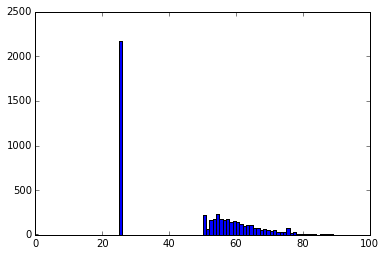

Data shape (522, 942)
Fitting model...
DONE!
Writing topics to results/beer3_neg/beer3_neg_topics.csv
Writing fragments x topics to results/beer3_neg/beer3_neg_all.csv
Writing topic docs to results/beer3_neg/beer3_neg_docs.csv


In [3]:
ms1 = pd.read_csv('input/Beer_3_T10_NEG_ms1.csv', index_col=0)
ms2 = pd.read_csv('input/Beer_3_T10_NEG_ms2.csv', index_col=0)
data, model, topicdf, docdf = run_lda('beer3_neg', 
                         'input/Beer_3_T10_NEG_fragments.csv', 
                         'input/Beer_3_T10_NEG_losses.csv', 
                         'input/Beer_3_T10_NEG_mzdiffs.csv', 
                         n_topics, n_samples)

2. PCA
-------

In [4]:
from sklearn import preprocessing
# df = docdf # topics x documents matrix
df = topicdf.transpose() # topics x words matrix
print df.shape

# normalise and scale the variables
scaled_mat = preprocessing.scale(df, axis=0)
# print scaled_mat.mean(axis=0)
# print scaled_mat.std(axis=0)

(50, 942)


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_mat)
X_r = pca.transform(scaled_mat)

In [6]:
print X_r.shape
print('explained variance by the first two principal components: %s' % str(pca.explained_variance_ratio_))

(50, 2)
explained variance by the first two principal components: [ 0.04874786  0.03868358]


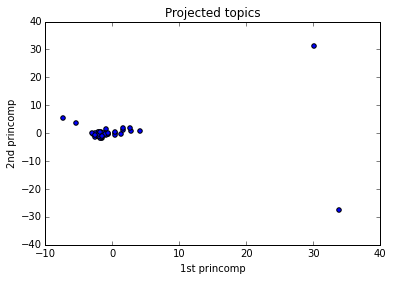

In [7]:
plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.xlabel('1st princomp')
plt.ylabel('2nd princomp')
plt.title('Projected topics')

3. Network
------------

In [8]:
df = topicdf.transpose()
print df.shape # df is the topic x terms matrix

(50, 942)


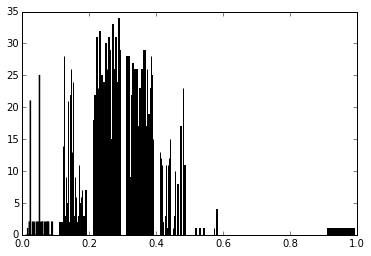

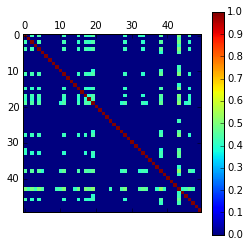

In [9]:
# create adjacency matrix A

# first compute euclidean distance between the topics
from scipy.spatial.distance import cdist
A = cdist(scaled_mat, scaled_mat, 'euclidean')

# crudely convert to similarities
maxval = A.max()
A = 1-(A/maxval)
plt.hist(A)

# set a threshold of 0.3 for the similarity values for the network graph
for i in xrange(A.shape[0]):
    for j in xrange(A.shape[1]):
        if A[i, j] < 0.40:
            A[i, j] = 0

plt.matshow(A)
plt.colorbar()
plt.show()

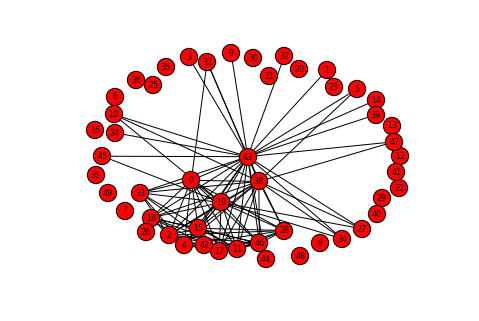

In [10]:
import networkx as nx
from networkx.readwrite import json_graph
dt = [('len', float)]
A = A.view(dt)
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw(G,pos,font_size=8)

4. Topics
-----------

Visualise the document-topic distributions

(522, 50)


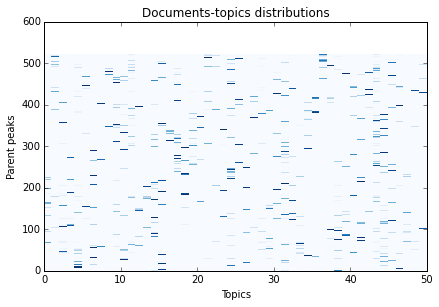

In [11]:
df = docdf.transpose()
print df.shape
plt.pcolor(df, norm=None, cmap='Blues')
plt.tight_layout()
plt.xlabel('Topics')
plt.ylabel('Parent peaks')
plt.title('Documents-topics distributions')
plt.show()

For every topic, check the words inside.

Topic 0

Parent peaks

     peakID	mz		rt		int		prob
1    8185 	205.03554	682.169		2.866e+06	0.677
2    3676 	218.10358	352.724		1.103e+06	0.635
3    3677 	218.10358	398.718		2.610e+05	0.533
4    11355	161.04560	581.576		2.474e+07	0.529
5    3423 	309.11311	344.274		2.889e+05	0.488
6    2217 	421.15276	274.989		3.208e+05	0.488
7    5103 	202.10873	472.398		2.951e+06	0.484
8    5461 	188.09301	502.994		1.357e+06	0.484
9    5106 	202.10872	445.651		1.193e+06	0.484

Fragments

1    fragment_71.05 (0.050)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12832    3676            71.049979  356.793   7455.987793
 15189    8185            71.050064  684.850  19737.183594
 15608   11355            71.049970  577.496  23741.937500
2    fragment_146.08216 (0.049)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12734   3423             146.082211  343.022  12504.211914
 12831   3676             146.082205  356.793  29353.234375
 12839   3677             146.082283  400.900

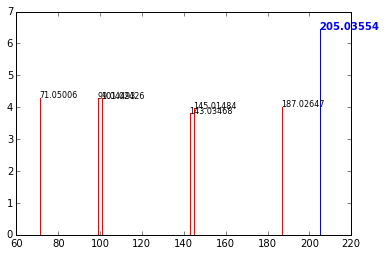

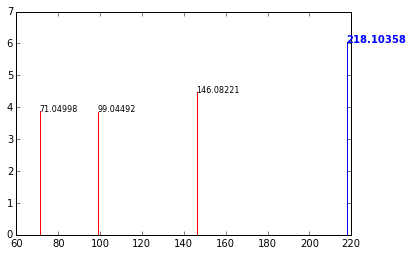

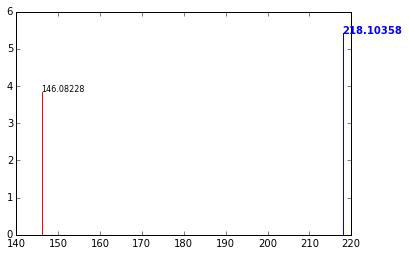

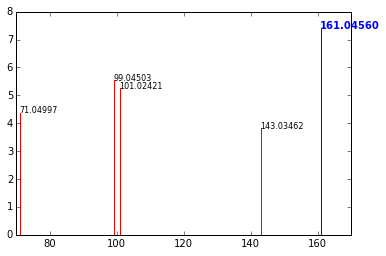

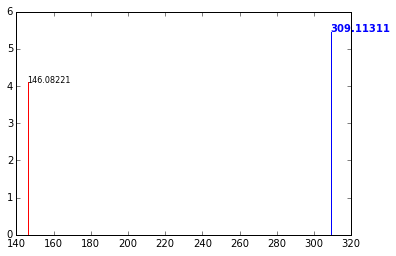

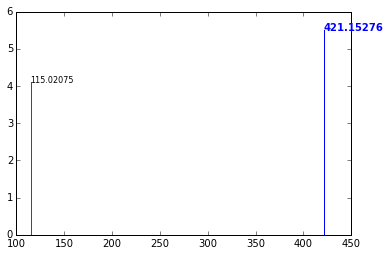

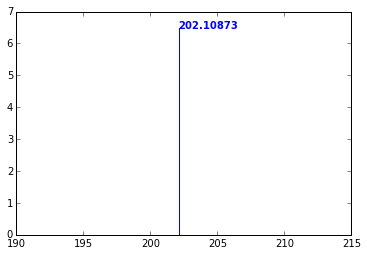

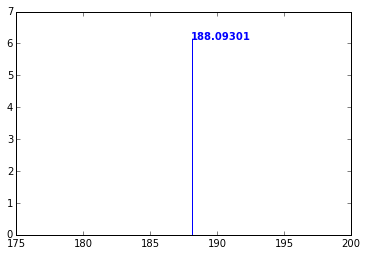

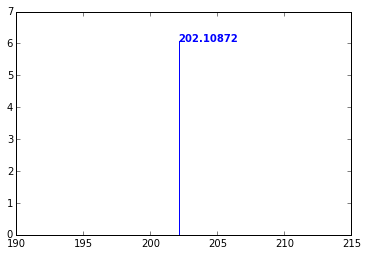

Topic 1

Parent peaks

     peakID	mz		rt		int		prob
1    5719 	467.14128	525.978		5.209e+05	0.749
2    8117 	827.27004	687.693		5.211e+06	0.672
3    7974 	587.18447	678.762		4.259e+05	0.639
4    6866 	239.07752	600.409		1.386e+06	0.619
5    8046 	383.12013	670.471		3.942e+06	0.526
6    6870 	253.09317	589.155		2.992e+06	0.469
7    6608 	323.09885	543.465		5.583e+05	0.448
8    8112 	545.17327	679.619		5.488e+05	0.410
9    8417 	341.10933	667.651		1.300e+07	0.384

Fragments

1    fragment_161.04671 (0.076)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13946   5719             161.046749  524.162    9035.297852
 14385   6608             161.046740  543.740    7539.636230
 14486   6870             161.046823  588.119   12124.812500
 15053   7974             161.046368  677.946   16451.388672
 15110   8046             161.046803  669.088    8212.354492
 15140   8117             161.046579  689.474  377281.375000
 15300   8417             161.046283  662.804   74126.367188
2

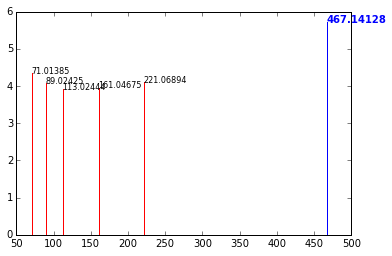

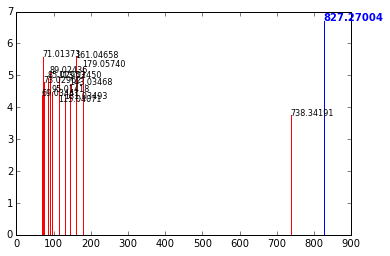

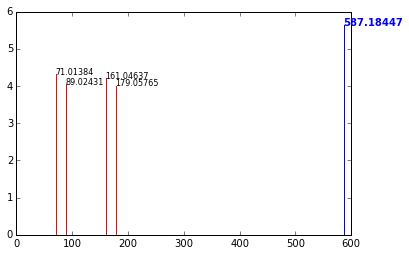

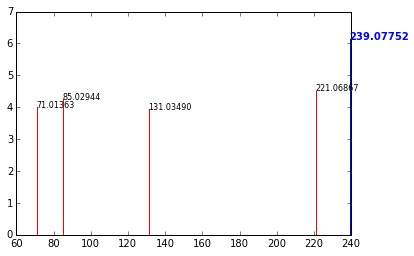

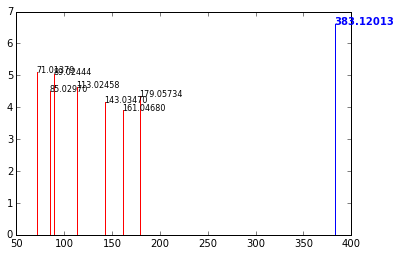

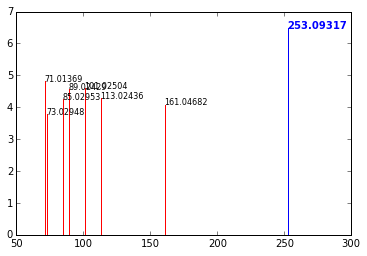

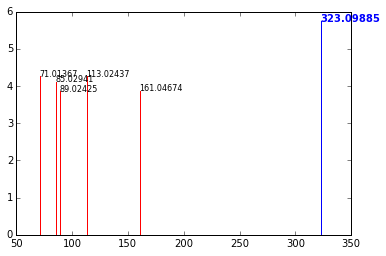

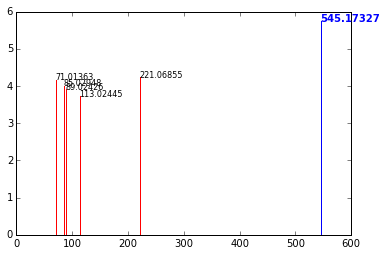

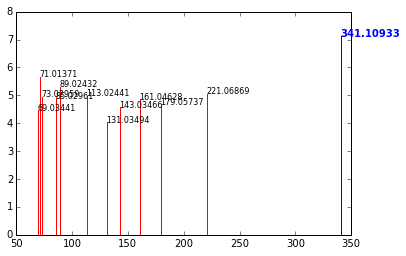

Topic 2

Parent peaks

     peakID	mz		rt		int		prob
1    8139 	180.05962	696.204		3.560e+05	0.955
2    6607 	323.09883	521.692		9.254e+05	0.926
3    9479 	147.02997	502.281		2.355e+06	0.820
4    4388 	197.04573	420.623		8.918e+05	0.628
5    6788 	237.06183	584.111		6.410e+05	0.606
6    2322 	353.14007	249.497		1.512e+06	0.558
7    9484 	147.02993	578.785		1.196e+06	0.530
8    7310 	239.05643	629.359		4.081e+05	0.479
9    6946 	135.02996	557.622		1.906e+07	0.334

Fragments

1    fragment_87.00873 (0.187)
 peakID  MSnParentPeakID  mz         rt       intensity   
 14379   6607             87.008718  527.724  27546.800781
 14442   6788             87.008791  585.435  48989.089844
 14534   6946             87.008674  557.894  33926.480469
 15171   8139             87.008675  697.765   5802.012695
 15417   9479             87.008743  503.401  82978.710938
 15422   9484             87.008591  582.738  24584.171875
2    fragment_89.00354 (0.027)
 peakID  MSnParentPeakID  mz         rt       

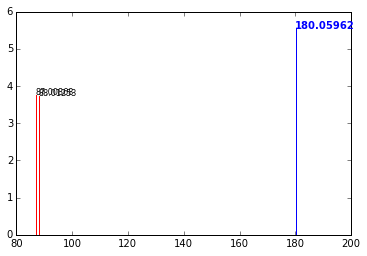

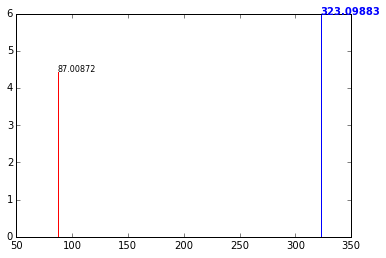

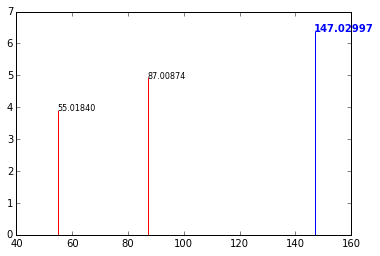

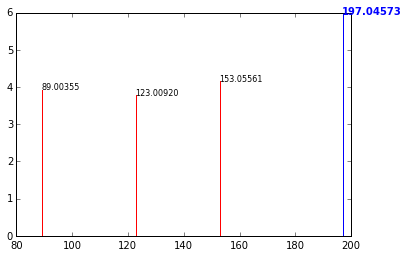

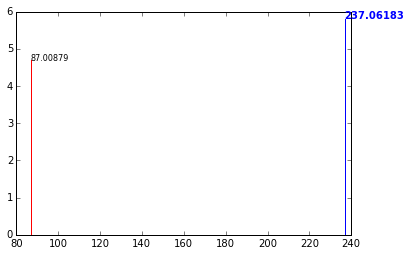

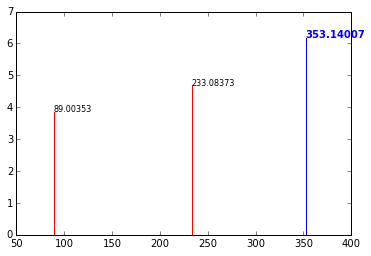

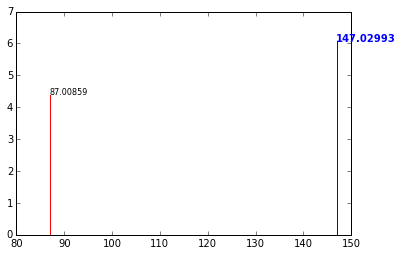

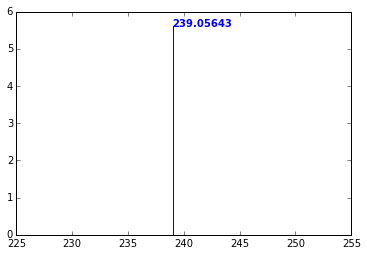

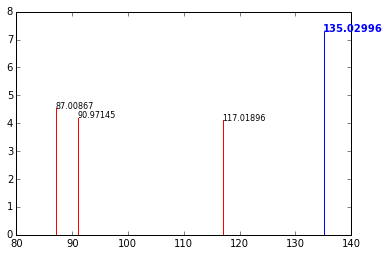

Topic 3

Parent peaks

     peakID	mz		rt		int		prob
1    3387 	243.04473	302.889		4.018e+05	0.957
2    4571 	211.07264	430.363		4.485e+05	0.922
3    4365 	182.04607	332.571		5.872e+05	0.918
4    4363 	182.04606	268.678		1.228e+07	0.851
5    4225 	285.05541	420.623		1.837e+06	0.836
6    3355 	259.07603	300.531		1.148e+06	0.808
7    6204 	232.08289	561.500		2.631e+05	0.579
8    4941 	172.06171	419.048		1.395e+06	0.571
9    3319 	138.05609	268.678		3.401e+05	0.479

Fragments

1    fragment_108.0456 (0.108)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12703   3319             108.045625  267.241    9374.592773
 12716   3387             108.045544  301.349    9566.856445
 13259   4363             108.045638  276.903  197892.515625
 13274   4365             108.045660  338.927   30410.232422
2    fragment_138.0565 (0.041)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13258   4363             138.056461  276.903  282599.375000
 13273   4365             138.05

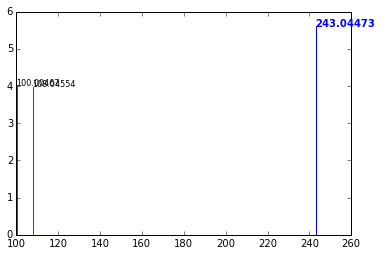

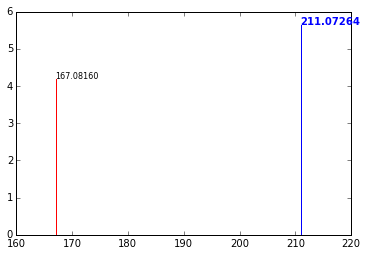

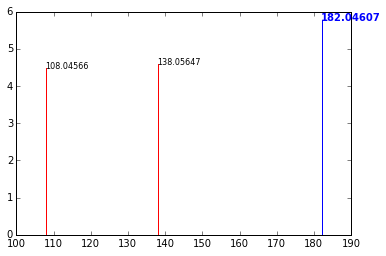

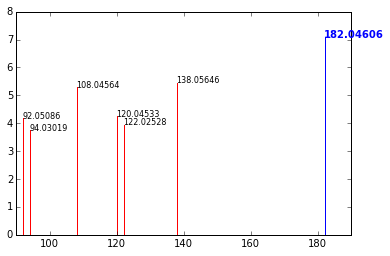

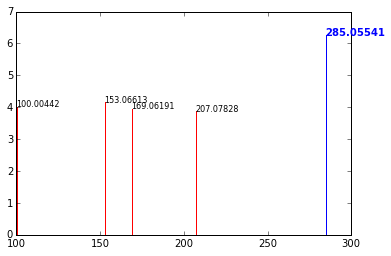

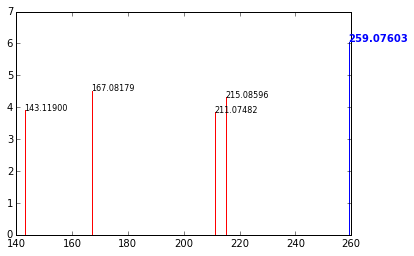

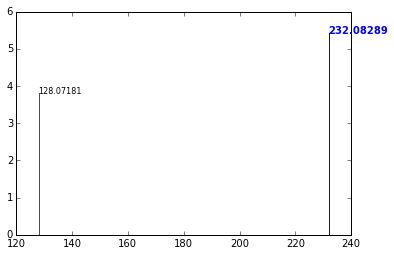

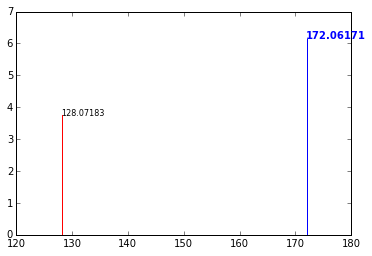

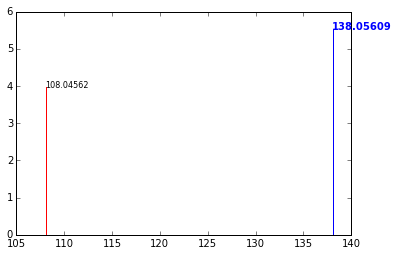

Topic 4

Parent peaks

     peakID	mz		rt		int		prob
1    11013	116.92856	832.774		1.063e+06	0.980
2    11012	116.92856	749.929		8.626e+05	0.980
3    11024	116.92856	524.506		2.894e+06	0.977
4    11014	116.92857	501.667		3.083e+06	0.968
5    7861 	113.02445	638.303		1.687e+06	0.963
6    1581 	385.16642	241.693		4.093e+05	0.922
7    6050 	193.06014	553.420		6.052e+05	0.917
8    4738 	122.02480	417.678		1.340e+07	0.708
9    9626 	129.01940	442.779		2.345e+07	0.530

Fragments

1    fragment_85.02956 (0.581)
 peakID  MSnParentPeakID  mz         rt       intensity    
 11914   1581             85.029583  238.612   15729.688477
 14084   6050             85.029487  551.493    9072.609375
 14941   7861             85.029563  634.739   28193.113281
 15432   9626             85.029513  440.383  621468.625000
2    fragment_99.92583 (0.083)
 peakID  MSnParentPeakID  mz         rt       intensity    
 15498   11012            99.925819  756.098   89891.648438
 15505   11013            99.925825  83

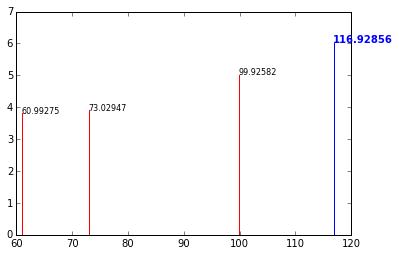

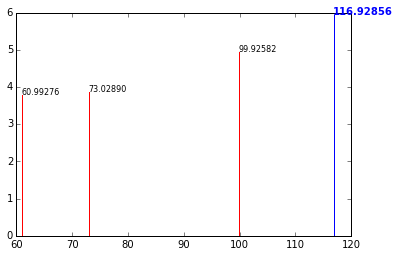

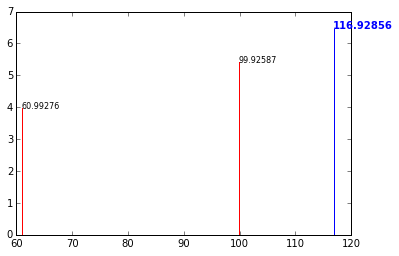

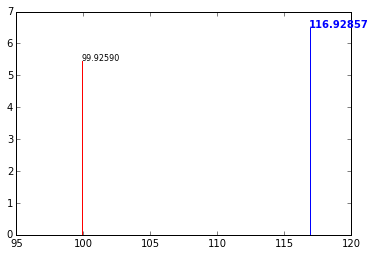

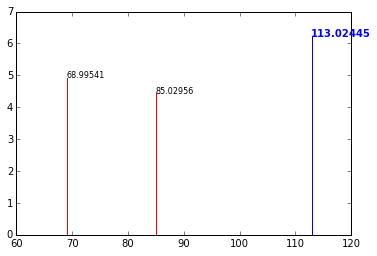

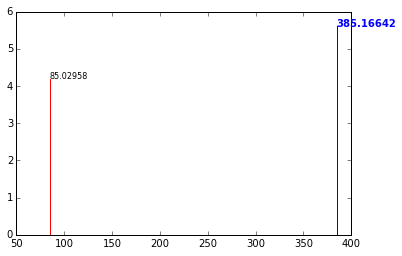

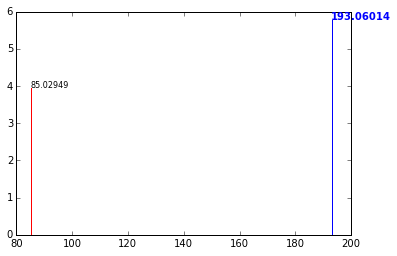

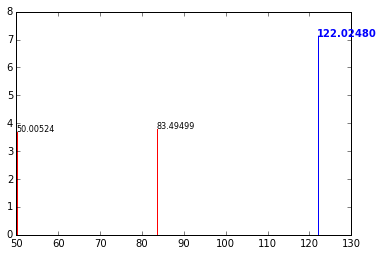

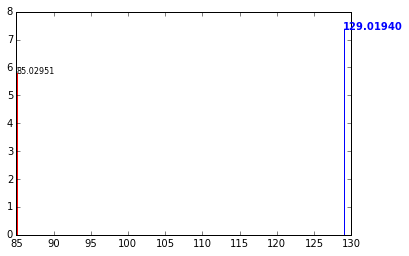

Topic 5

Parent peaks

     peakID	mz		rt		int		prob
1    2659 	196.09244	286.726		1.307e+06	0.912
2    951  	473.21888	210.390		1.142e+06	0.780
3    1222 	431.24476	210.390		4.010e+05	0.565
4    7544 	264.10913	637.298		4.855e+06	0.483
5    2027 	397.18736	232.412		8.158e+05	0.480
6    7617 	426.16256	650.904		4.126e+05	0.195
7    2229 	300.18202	281.658		3.423e+05	0.154
8    1387 	391.21340	208.874		1.666e+06	0.129
9    3074 	347.18685	210.053		1.385e+08	0.094

Fragments

1    fragment_91.01918 (0.172)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11756    951             91.019211  206.437  11412.542969
 11879   1387             91.019164  204.325   9295.739258
 12376   2659             91.019167  283.705   5544.976074
 12544   3074             91.019168  224.328  18928.025391
2    fragment_102.05654 (0.153)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12142   2229             102.056508  282.613   10881.996094
 14799   7544             102.056531  630

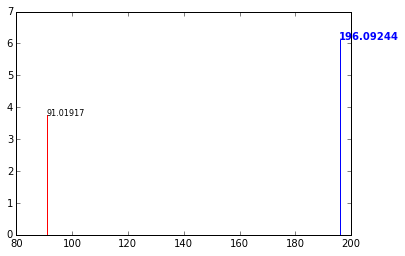

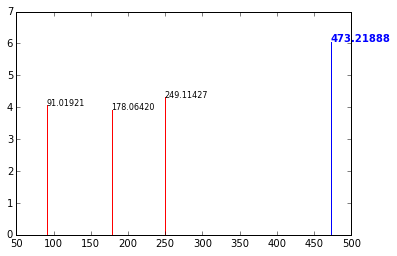

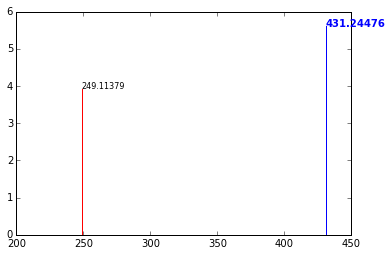

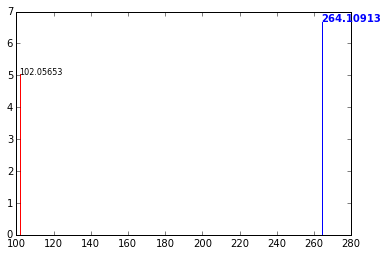

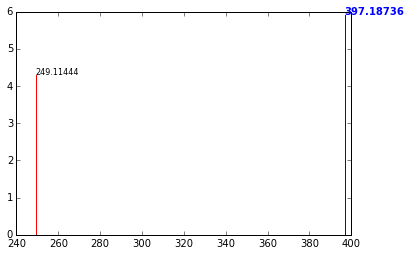

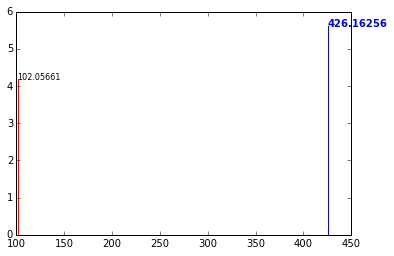

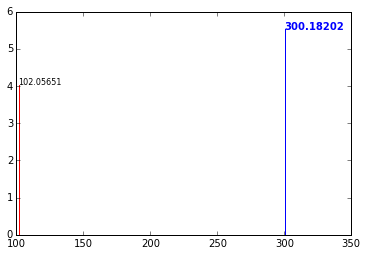

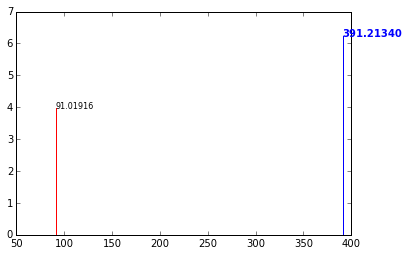

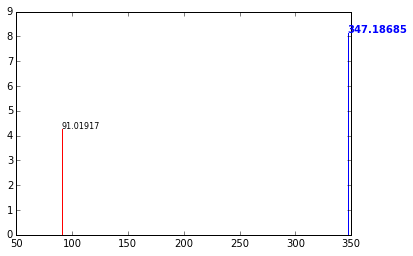

Topic 6

Parent peaks

     peakID	mz		rt		int		prob
1    7009 	134.04725	497.090		6.221e+07	0.980
2    3284 	252.08800	284.597		3.578e+05	0.979
3    6039 	151.02619	536.719		7.243e+06	0.978
4    6537 	301.09201	587.711		3.432e+05	0.977
5    5725 	267.05482	524.506		3.371e+05	0.973
6    7011 	150.04215	589.155		3.315e+07	0.941
7    3302 	224.09311	273.423		2.978e+06	0.837
8    4201 	196.06169	374.686		3.137e+05	0.772
9    4203 	196.06169	357.891		3.833e+05	0.743

Fragments

1    fragment_94.03029 (0.158)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12665   3284             94.030349  284.253  55986.972656
 12687   3302             94.030345  267.106  57586.847656
 13200   4201             94.030300  367.872  40412.140625
 13207   4203             94.030267  351.391  42739.105469
2    fragment_66.03468 (0.091)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12666   3284             66.034705  284.253  11945.446289
 12688   3302             66.034817  267.106  

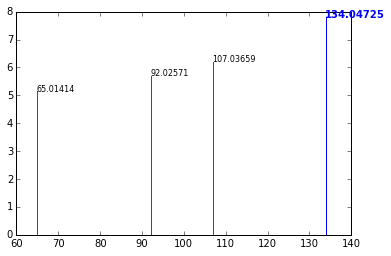

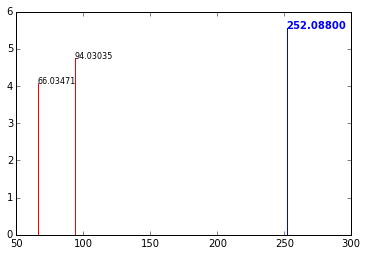

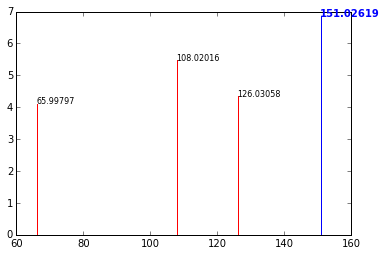

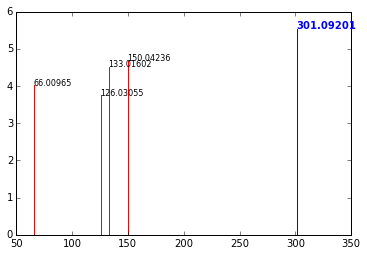

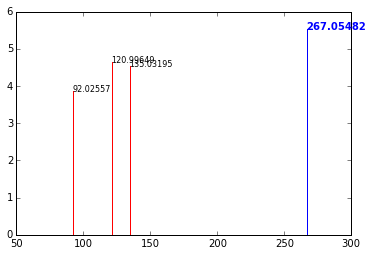

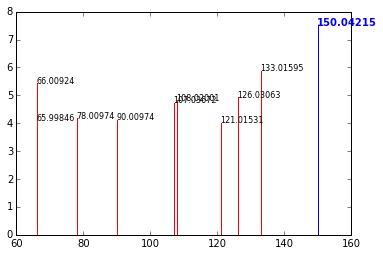

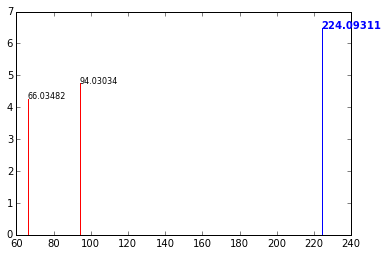

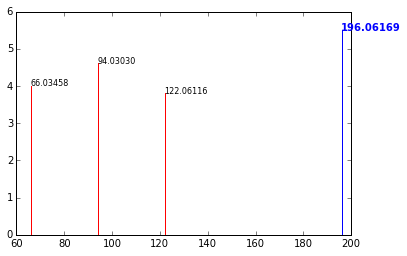

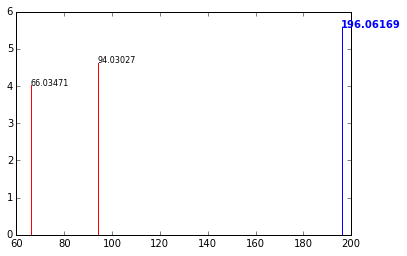

Topic 7

Parent peaks

     peakID	mz		rt		int		prob
1    6420 	353.08837	478.776		2.054e+07	0.954
2    2474 	249.05895	266.588		5.910e+05	0.874
3    4057 	337.09360	417.678		8.308e+06	0.762
4    4597 	257.05647	420.623		9.383e+06	0.759
5    4662 	153.01941	324.899		7.092e+05	0.652
6    5527 	176.04035	481.202		7.941e+06	0.604
7    2384 	335.15069	243.631		1.112e+06	0.449
8    5474 	250.07238	502.994		1.352e+06	0.007
9    3908 	233.10461	419.048		1.446e+06	0.005

Fragments

1    fragment_109.02994 (0.031)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12220   2384             109.029918  240.481   6497.075195
 13009   4057             109.029925  416.840  23407.017578
 13367   4597             109.029923  416.929   9591.912109
 13377   4662             109.029957  311.992  27706.917969
 13807   5527             109.029897  474.623   5504.486328
 14237   6420             109.030033  476.659  63793.332031
2    fragment_67.01856 (0.023)
 peakID  MSnParentPeakID  mz         r

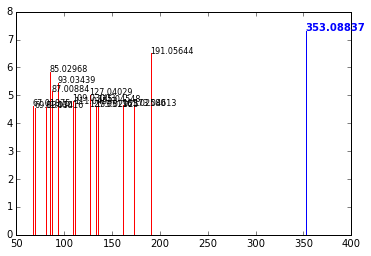

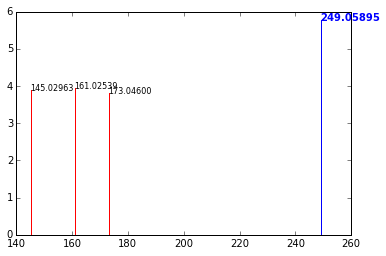

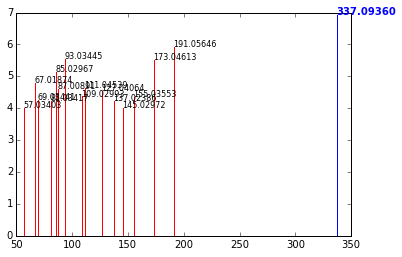

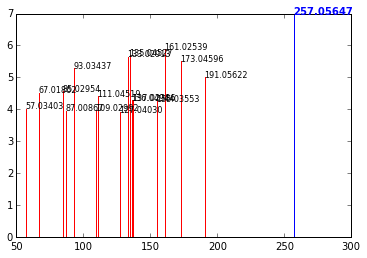

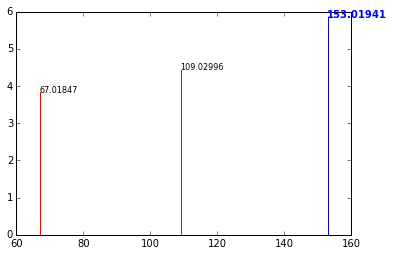

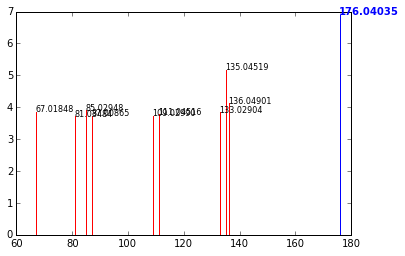

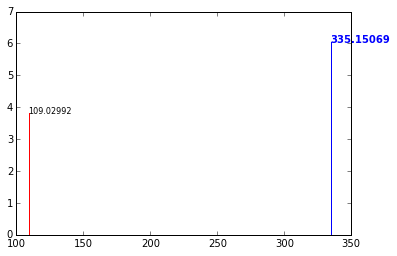

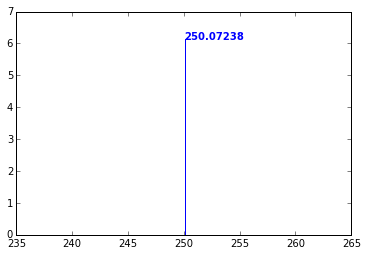

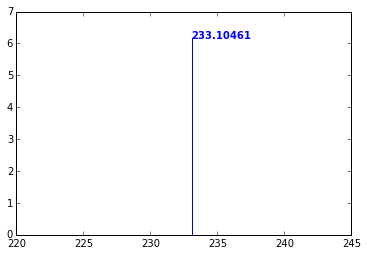

Topic 8

Parent peaks

     peakID	mz		rt		int		prob
1    2319 	331.19215	208.874		1.073e+07	0.906
2    1838 	317.13998	231.522		7.250e+05	0.801
3    5694 	454.19384	509.683		1.536e+06	0.766
4    6654 	442.15727	589.155		4.448e+05	0.608
5    5332 	488.17812	494.988		9.275e+05	0.535
6    2278 	317.17631	210.053		1.983e+07	0.522
7    6932 	478.16848	600.919		3.738e+05	0.284
8    1398 	351.14560	233.439		5.676e+05	0.003
9    11534	207.08757	589.768		4.295e+05	0.002

Fragments

1    fragment_65.00311 (0.028)
 peakID  MSnParentPeakID  mz         rt       intensity    
 11976   1838             65.003234  213.525  206389.703125
 12166   2278             65.003168  202.521   15003.108398
 12181   2319             65.003040  202.382    6958.587891
2    fragment_248.10579 (0.020)
 peakID  MSnParentPeakID  mz          rt       intensity    
 11973   1838             248.106307  213.525  302750.312500
 12163   2278             248.105271  202.521   20245.408203
3    fragment_180.04311 (0.019)
 pe

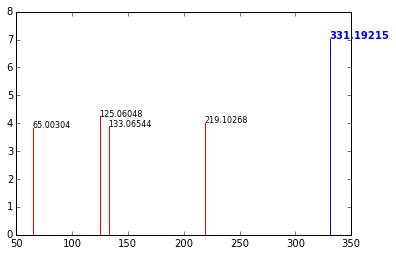

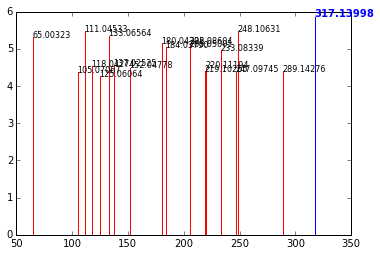

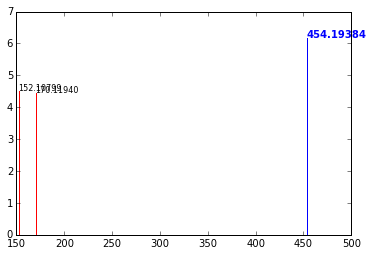

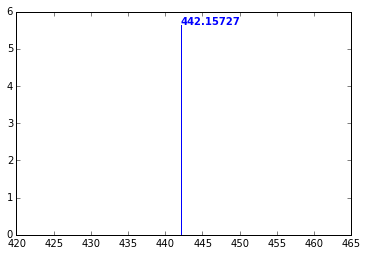

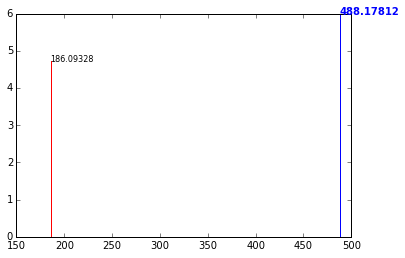

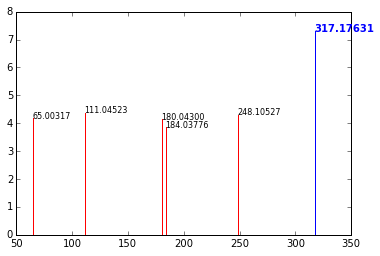

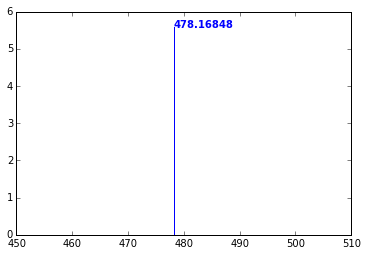

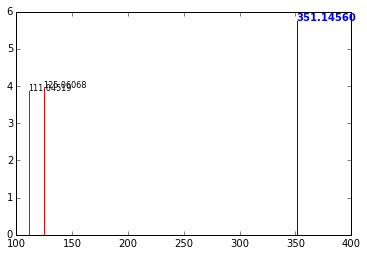

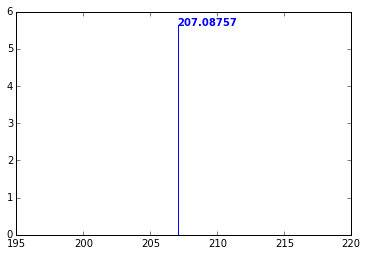

Topic 9

Parent peaks

     peakID	mz		rt		int		prob
1    1260 	487.23459	210.053		1.002e+06	0.960
2    1876 	409.18751	239.581		8.602e+05	0.960
3    828  	319.19200	215.776		3.748e+05	0.958
4    2026 	395.20806	260.629		3.503e+05	0.951
5    2779 	285.13471	243.631		1.280e+06	0.906
6    6964 	226.04889	607.405		4.110e+05	0.528
7    6432 	349.04180	582.329		3.257e+05	0.513
8    2384 	335.15069	243.631		1.112e+06	0.509
9    6437 	366.99468	583.220		4.739e+05	0.507

Fragments

1    fragment_125.06066 (0.182)
 peakID  MSnParentPeakID  mz          rt       intensity   
 11740    828             125.060892  217.204  14548.337891
 11814   1260             125.060837  205.738  17810.583984
 12008   1876             125.060982  243.333  30208.267578
 12039   2026             125.060651  259.877   9278.716797
 12219   2384             125.060258  240.481  18278.183594
 12427   2779             125.060560  239.372  16904.710938
2    fragment_171.00671 (0.120)
 peakID  MSnParentPeakID  mz         

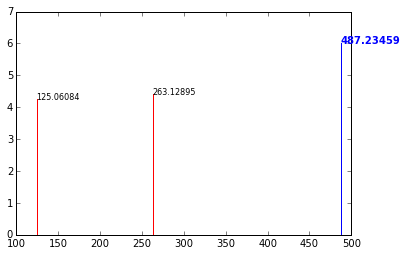

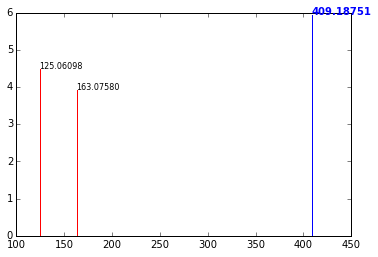

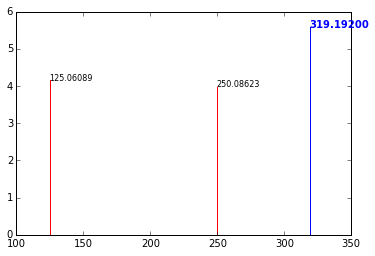

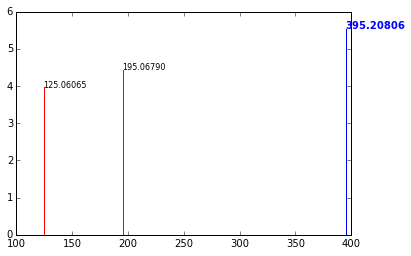

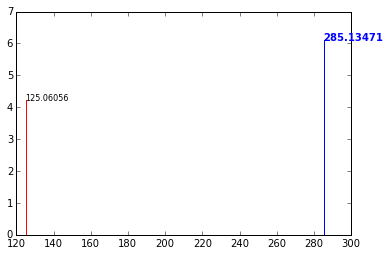

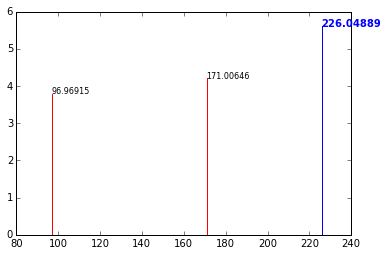

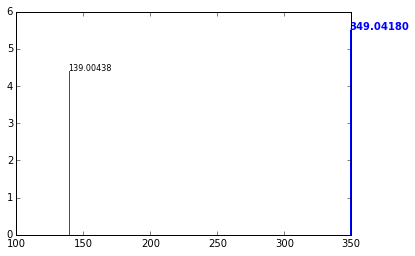

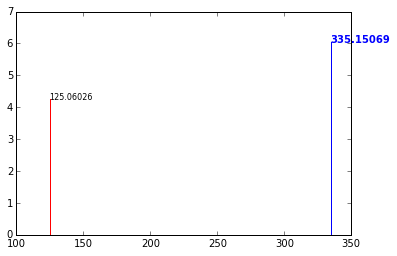

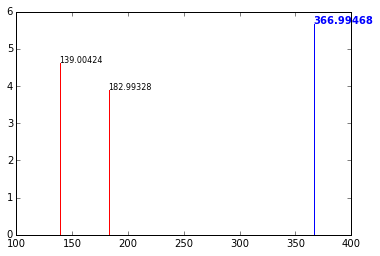

Topic 10

Parent peaks

     peakID	mz		rt		int		prob
1    1565 	303.12427	233.439		4.896e+05	0.959
2    2131 	321.13490	228.651		1.404e+06	0.927
3    2132 	321.13494	256.488		6.062e+05	0.921
4    1824 	269.10338	246.885		3.711e+05	0.920
5    3944 	357.11978	417.678		7.275e+06	0.777
6    11178	133.05066	414.189		1.357e+08	0.486
7    1357 	447.23936	214.911		3.436e+05	0.468
8    5562 	147.06636	419.048		1.301e+07	0.439
9    1222 	431.24476	210.390		4.010e+05	0.401

Fragments

1    fragment_111.04523 (0.257)
 peakID  MSnParentPeakID  mz          rt       intensity    
 11807   1222             111.045198  209.980   12248.718750
 11855   1357             111.045160  213.804   11302.913086
 11913   1565             111.045123  214.839   12393.040039
 11952   1824             111.045295  244.769   11555.155273
 12116   2131             111.045402  226.466   34527.750000
 12120   2132             111.045065  253.417   14295.567383
 12920   3944             111.045354  417.031  261727.062500


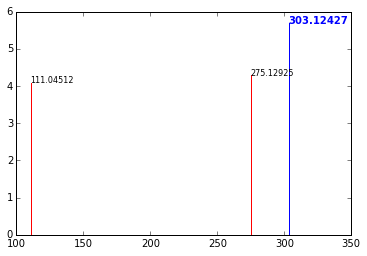

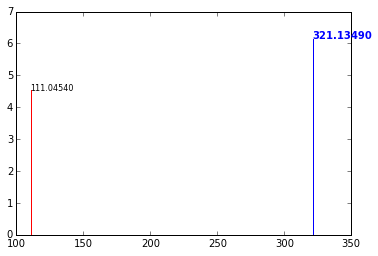

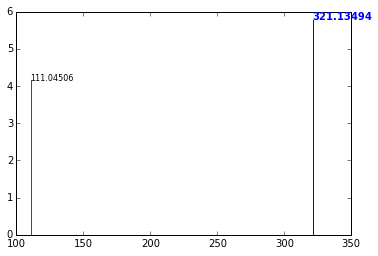

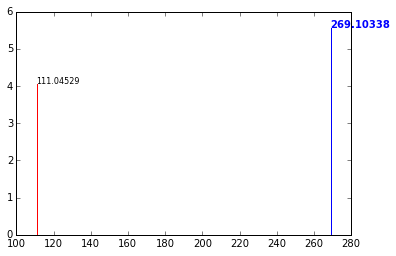

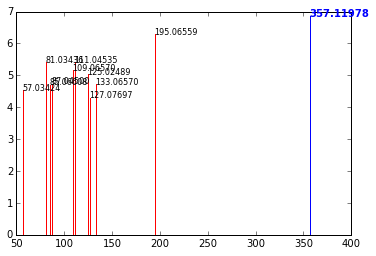

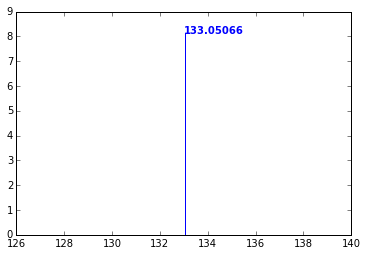

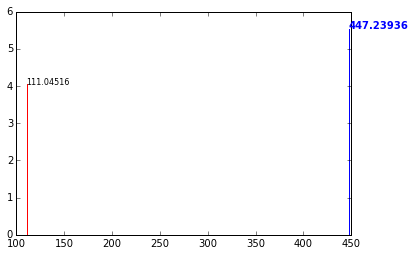

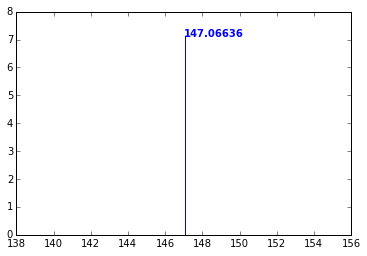

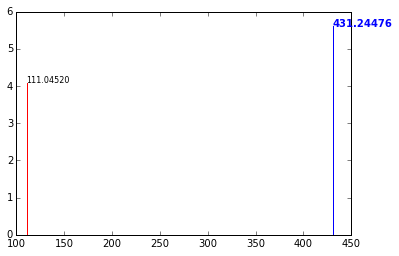

Topic 11

Parent peaks

     peakID	mz		rt		int		prob
1    5461 	188.09301	502.994		1.357e+06	0.484
2    6007 	158.08232	534.588		1.221e+06	0.482
3    11521	207.08758	375.779		4.380e+05	0.479
4    2166 	207.08759	267.672		4.238e+05	0.478
5    2786 	391.20952	293.483		5.891e+05	0.467
6    5514 	341.12065	507.012		6.122e+05	0.464
7    7710 	473.15178	650.904		3.193e+05	0.462
8    5836 	413.16720	516.323		6.533e+05	0.460
9    11522	207.08758	395.756		5.842e+05	0.413

Fragments

1    fragment_101.02417 (0.530)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12129    2166            101.024069  254.170   5645.356445
 13972    5836            101.024117  526.254  11955.849609
 14863    7710            101.024084  652.614   5148.889648
 15666   11521            101.024081  379.476   8003.354492
 15673   11522            101.024100  396.481   6753.625977
2    fragment_116.07152 (0.072)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12436   2786             116.07148

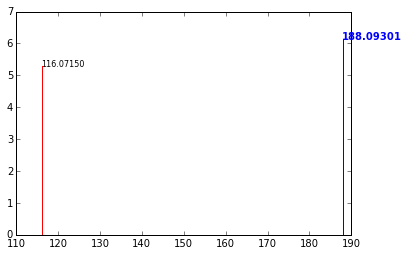

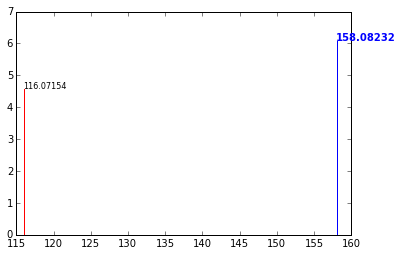

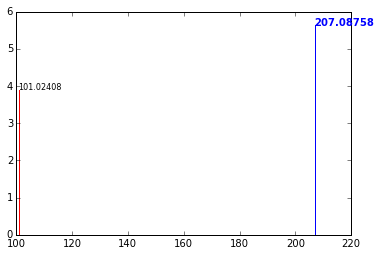

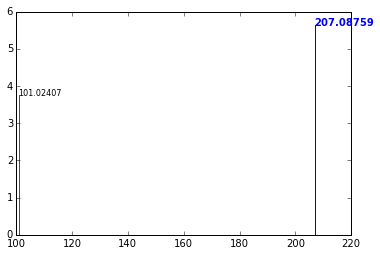

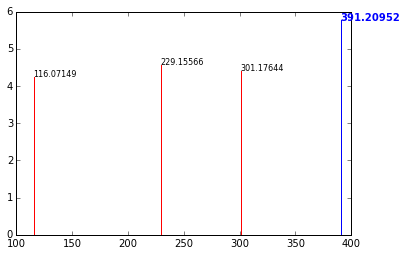

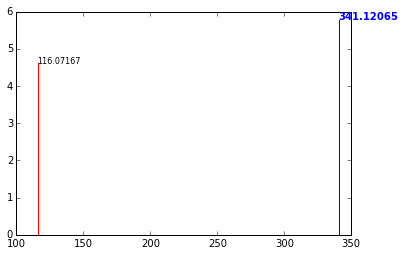

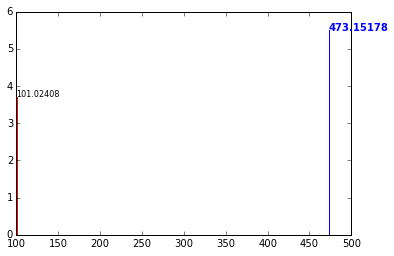

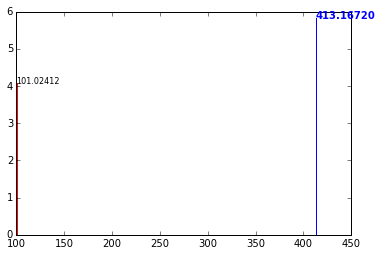

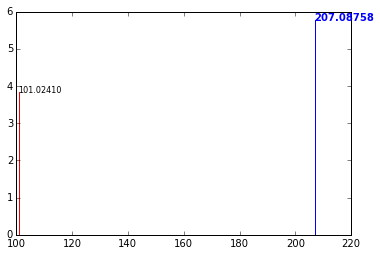

Topic 12

Parent peaks

     peakID	mz		rt		int		prob
1    3076 	347.18688	288.718		4.538e+05	0.983
2    4166 	195.06642	398.718		2.459e+05	0.921
3    2455 	195.03004	252.379		6.578e+05	0.831
4    5420 	185.05688	493.424		2.014e+06	0.733
5    3767 	198.07738	300.531		7.071e+05	0.689
6    4276 	236.05669	422.249		5.798e+05	0.546
7    5025 	156.03037	467.971		1.919e+06	0.505
8    4865 	195.03345	440.112		3.079e+05	0.496
9    6242 	202.07234	508.526		4.750e+05	0.482

Fragments

1    fragment_84.04546 (0.119)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12860   3767             84.045381  298.811  19522.324219
 13577   5025             84.045524  474.487  43172.300781
 13683   5420             84.045378  495.396   5316.631348
2    fragment_114.93663 (0.090)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12261   2455             114.936581  251.134   6615.309570
 13189   4166             114.936583  401.444  13397.054688
 13485   4865             114.936571  438

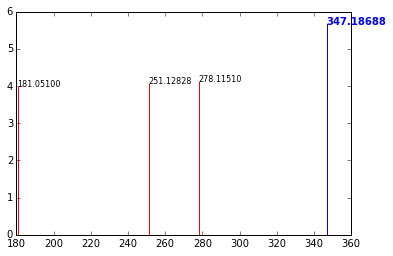

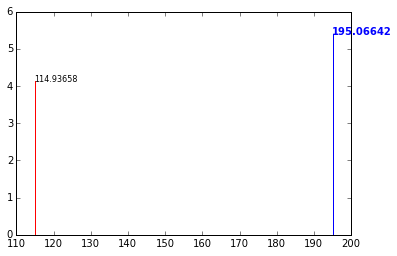

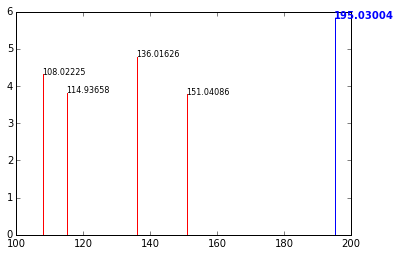

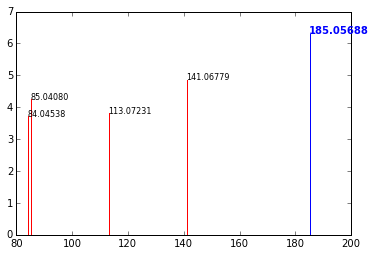

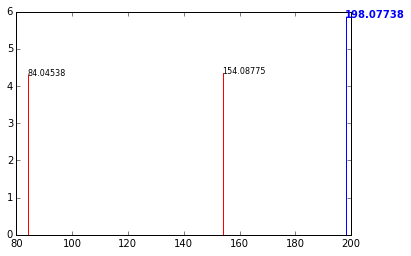

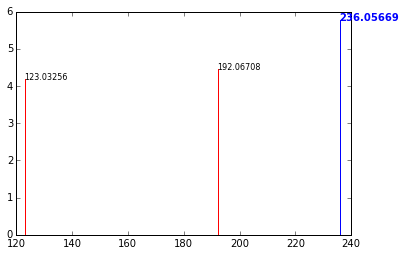

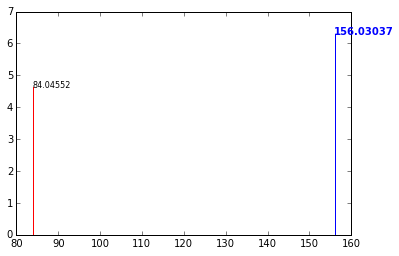

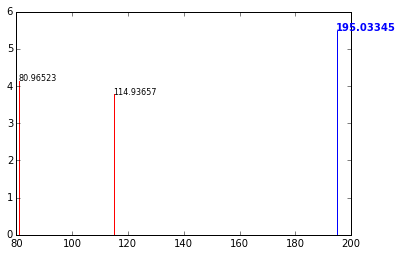

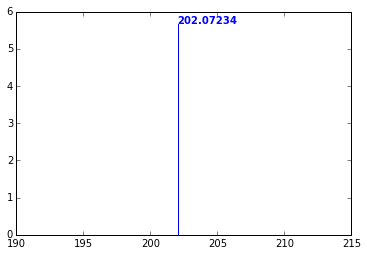

Topic 13

Parent peaks

     peakID	mz		rt		int		prob
1    4850 	125.03565	402.643		1.987e+06	0.921
2    2696 	427.19797	241.693		8.048e+05	0.917
3    4847 	125.03565	381.047		1.351e+06	0.917
4    4142 	222.07743	422.249		3.363e+05	0.917
5    1759 	295.15544	238.684		5.335e+05	0.579
6    860  	287.09622	219.826		5.487e+05	0.541
7    1220 	415.24971	204.537		2.052e+06	0.532
8    11521	207.08758	375.779		4.380e+05	0.479
9    11483	207.08758	321.806		4.518e+05	0.478

Fragments

1    fragment_96.96019 (0.094)
 peakID  MSnParentPeakID  mz         rt       intensity    
 11752    860             96.960168  219.481  201523.453125
 13480   4847             96.960104  377.361    8363.025391
 13481   4850             96.960289  393.373   13131.761719
2    fragment_311.14833 (0.035)
Empty DataFrame
Columns: [peakID, MSnParentPeakID, mz, rt, intensity]
Index: []
3    fragment_310.14126 (0.031)
Empty DataFrame
Columns: [peakID, MSnParentPeakID, mz, rt, intensity]
Index: []
4    fragment_226.08456 (

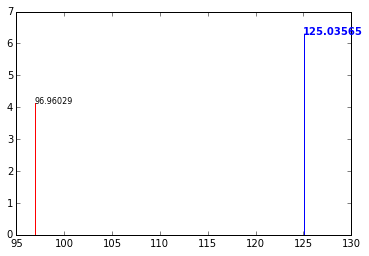

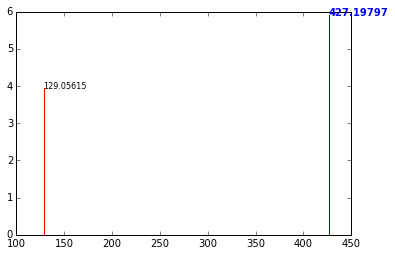

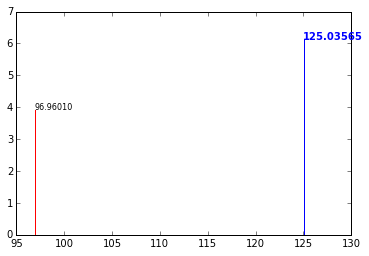

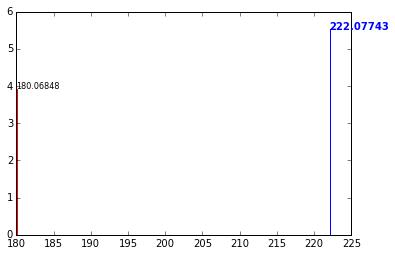

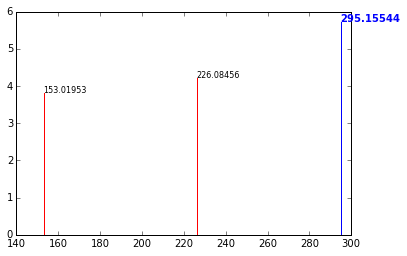

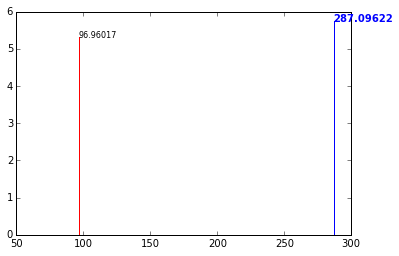

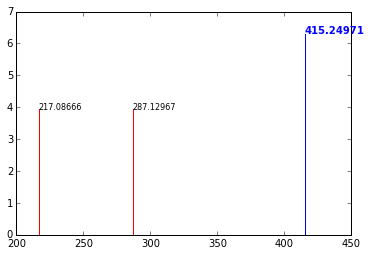

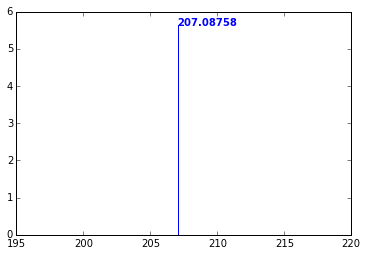

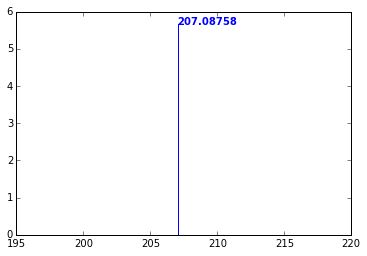

Topic 14

Parent peaks

     peakID	mz		rt		int		prob
1    5462 	188.09299	420.623		2.441e+06	0.992
2    2362 	255.16050	255.897		1.095e+05	0.959
3    11498	207.08755	554.039		4.489e+05	0.958
4    3084 	173.11836	290.502		2.453e+06	0.955
5    7046 	227.07745	613.799		3.263e+05	0.752
6    4937 	172.06171	453.316		7.946e+05	0.681
7    2520 	413.18246	251.618		4.351e+05	0.655
8    4526 	218.10358	436.899		1.350e+06	0.483
9    959  	274.14870	225.948		4.277e+05	0.480

Fragments

1    fragment_58.02941 (0.091)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13505   4937             58.029287  458.389   5770.504883
 13739   5462             58.029511  418.975  28460.031250
2    fragment_142.12401 (0.066)
 peakID  MSnParentPeakID  mz          rt       intensity  
 12203   2362             142.124019  262.691  9698.154297
3    fragment_142.08713 (0.041)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13738   5462             142.087147  418.975  59322.835938
4    fragm

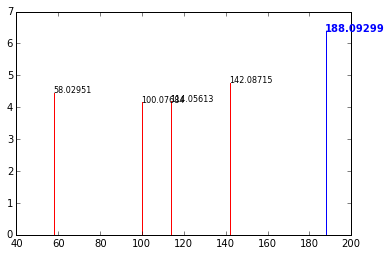

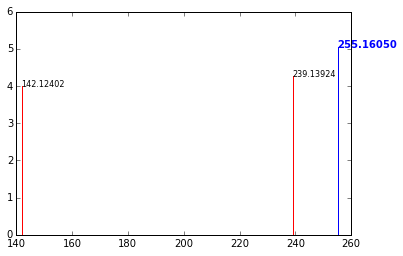

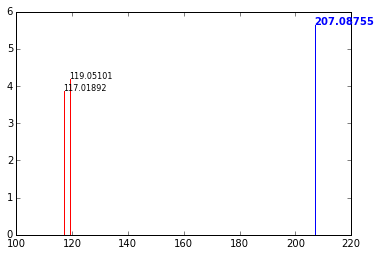

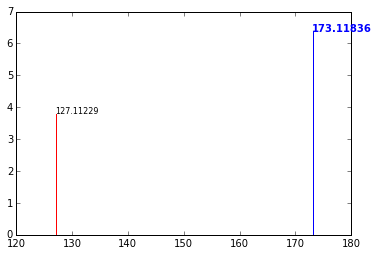

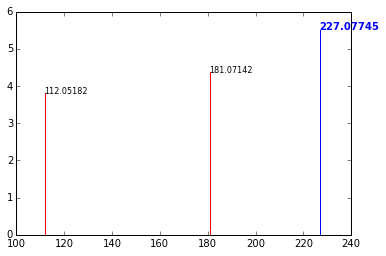

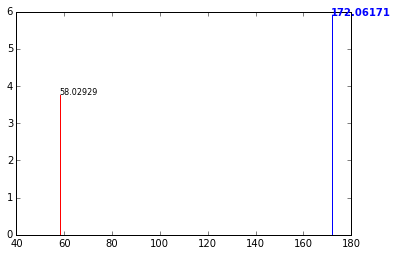

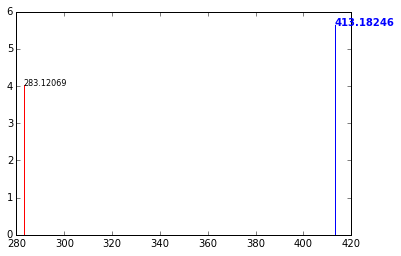

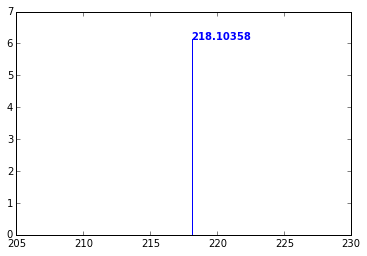

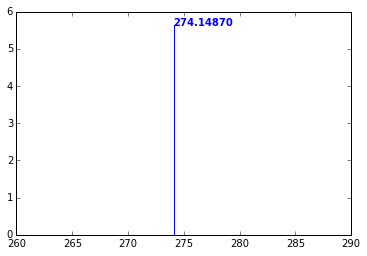

Topic 15

Parent peaks

     peakID	mz		rt		int		prob
1    7597 	214.04886	639.538		1.185e+07	0.975
2    6346 	125.00092	558.105		6.077e+06	0.972
3    7025 	197.02220	607.405		1.403e+06	0.966
4    6742 	300.04943	596.136		3.830e+05	0.935
5    7578 	140.01193	645.102		2.627e+05	0.929
6    6989 	111.02000	463.830		9.847e+07	0.925
7    6965 	230.01989	607.405		4.914e+05	0.873
8    7463 	556.16607	639.538		1.005e+06	0.805
9    6969 	242.08025	605.805		7.842e+05	0.792

Fragments

1    fragment_78.959 (0.374)
 peakID  MSnParentPeakID  mz         rt       intensity     
 14154   6346             78.959287  558.376  1302335.500000
 14431   6742             78.959331  595.450   116532.835938
 14569   6965             78.958774  606.590    73504.710938
 14579   6969             78.959384  602.430    86110.148438
 14628   7025             78.958664  613.542    21666.496094
 14773   7463             78.958821  636.089   224961.593750
 14812   7578             78.958742  643.814    42816.332031
 14

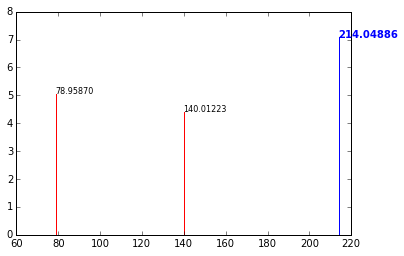

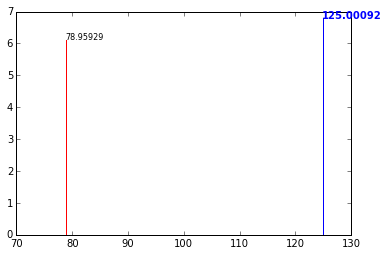

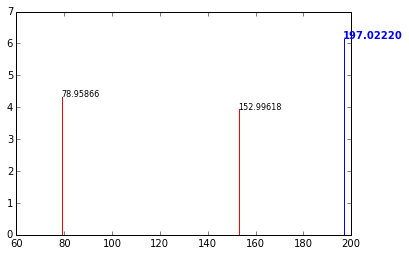

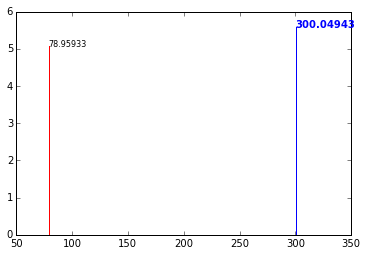

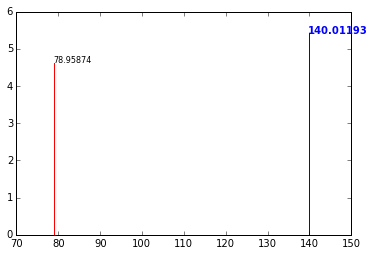

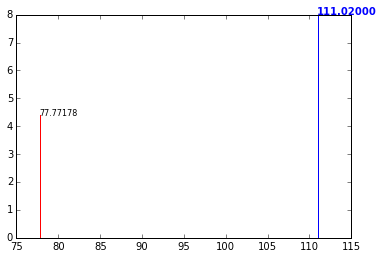

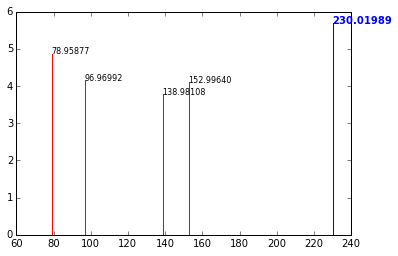

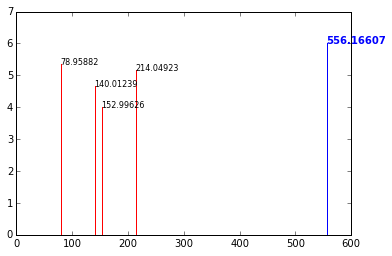

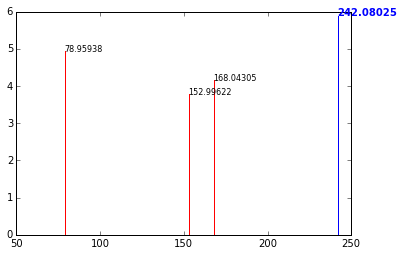

Topic 16

Parent peaks

     peakID	mz		rt		int		prob
1    4828 	623.16340	460.973		5.768e+05	0.984
2    4121 	477.10453	425.497		7.296e+05	0.939
3    5737 	463.08916	516.323		8.175e+05	0.860
4    3157 	329.23386	284.597		5.121e+05	0.487
5    8347 	307.15164	712.054		4.458e+05	0.483
6    6028 	304.06989	537.334		7.044e+05	0.479
7    2229 	300.18202	281.658		3.423e+05	0.447
8    2483 	306.17159	235.225		6.877e+06	0.368
9    3601 	224.05671	306.799		2.749e+05	0.212

Fragments

1    fragment_271.02589 (0.073)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12636   3157             271.025803  280.582   8844.364258
 13120   4121             271.025852  424.823  27786.578125
 13963   5737             271.025853  511.603  29414.240234
 14066   6028             271.026058  532.606   8971.167969
2    fragment_243.02982 (0.057)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13119   4121             243.029398  424.823  35683.417969
 13457   4828             243.030009

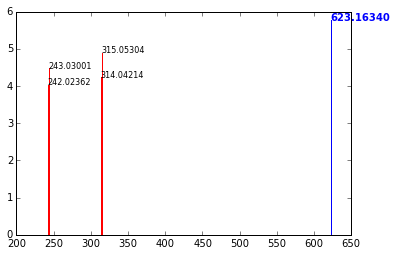

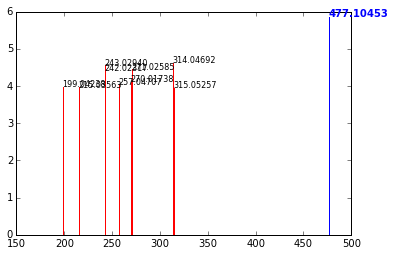

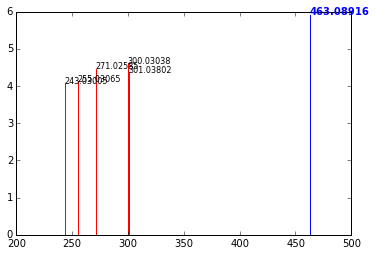

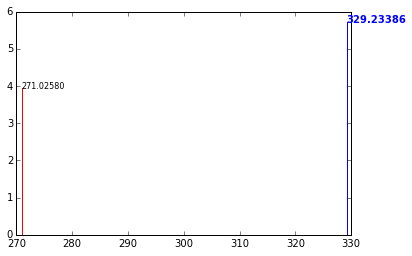

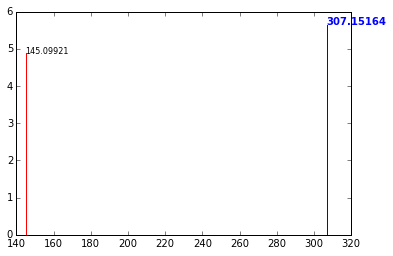

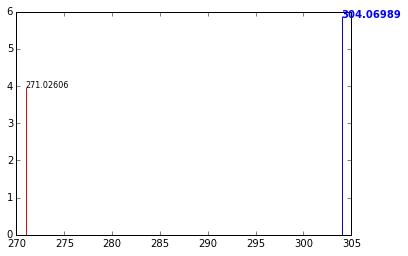

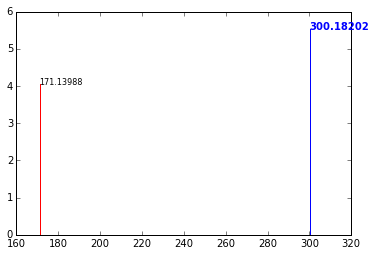

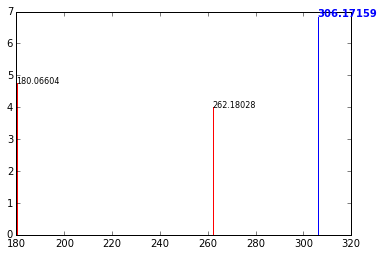

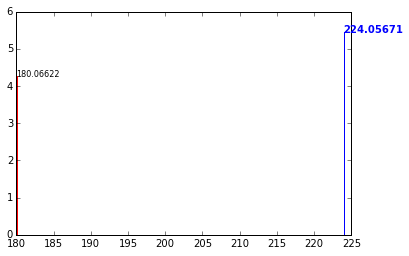

Topic 17

Parent peaks

     peakID	mz		rt		int		prob
1    7219 	260.98043	624.749		3.575e+05	0.975
2    1316 	258.17132	234.473		3.558e+05	0.959
3    3432 	172.09806	276.275		1.168e+06	0.931
4    2768 	357.21501	291.858		5.552e+05	0.920
5    6740 	293.09956	592.497		3.108e+06	0.747
6    2568 	401.24105	283.296		3.662e+05	0.745
7    7322 	260.08903	633.101		3.070e+05	0.641
8    1394 	228.16071	233.439		1.099e+06	0.613
9    3271 	284.12553	308.802		3.788e+05	0.483

Fragments

1    fragment_74.02448 (0.197)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11828   1316             74.024475  233.094  17276.578125
 11883   1394             74.024483  229.200  54771.734375
 12368   2568             74.024390  281.450  10640.511719
 12653   3271             74.024450  306.727  10889.770508
 12741   3432             74.024552  274.422  64703.183594
2    fragment_129.10367 (0.061)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12367   2568             129.103706  281.4

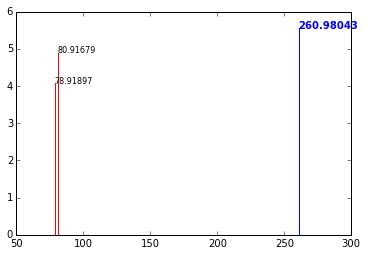

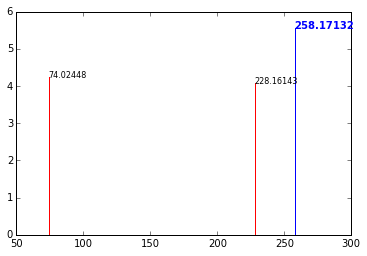

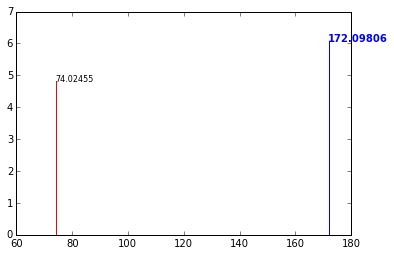

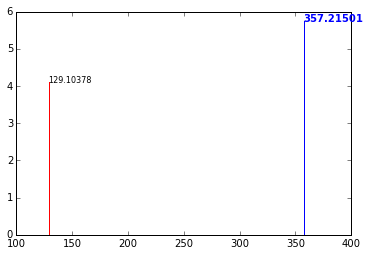

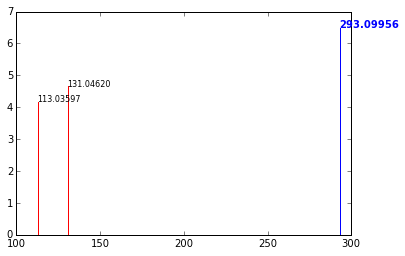

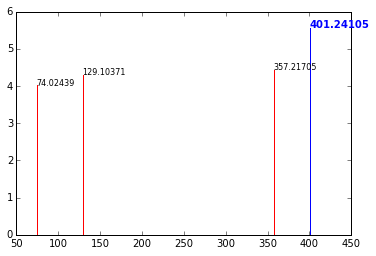

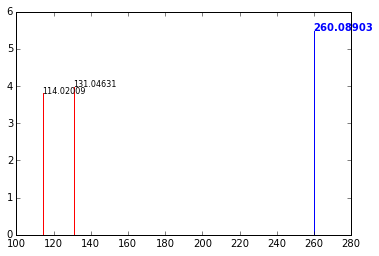

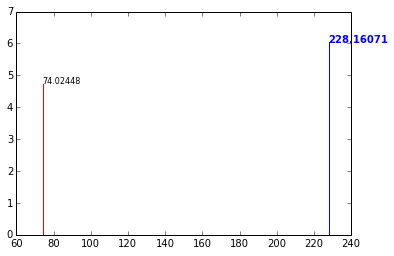

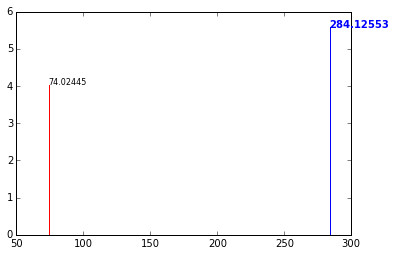

Topic 18

Parent peaks

     peakID	mz		rt		int		prob
1    4017 	210.07743	397.429		5.150e+05	0.989
2    4019 	210.07744	354.227		3.474e+05	0.989
3    3312 	272.09319	264.268		4.424e+06	0.982
4    5510 	253.11970	507.012		4.915e+05	0.977
5    4352 	241.08333	402.643		5.334e+05	0.965
6    4351 	241.08334	374.686		3.254e+05	0.963
7    4014 	210.07745	416.287		4.110e+06	0.916
8    4461 	210.08862	439.090		5.384e+05	0.914
9    3782 	259.10900	414.189		7.311e+05	0.759

Fragments

1    fragment_124.04034 (0.129)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12696   3312             124.040276  274.180   98202.367188
 12868   3782             124.040376  415.483    8962.953125
 12940   4014             124.040315  417.327  353274.781250
 12950   4017             124.040478  394.812   59783.554688
 12957   4019             124.040368  358.298   33122.929688
 13788   5510             124.040228  504.436   20969.480469
2    fragment_66.03468 (0.099)
 peakID  MSnParentPeakID  mz  

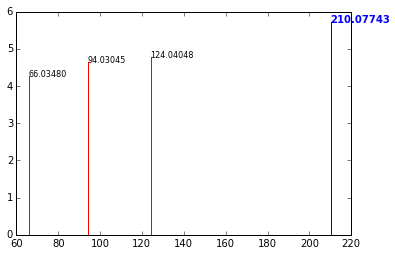

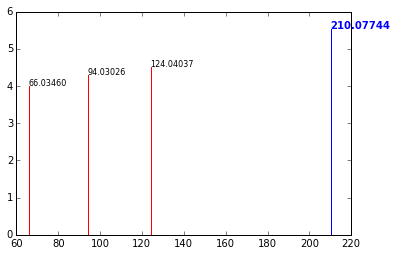

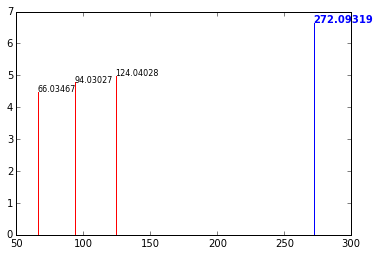

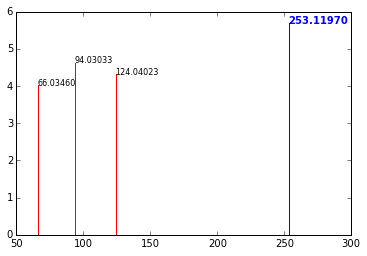

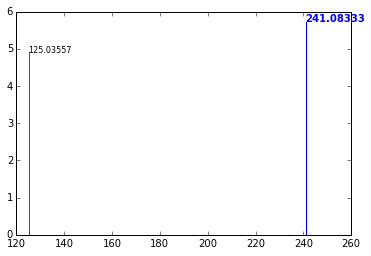

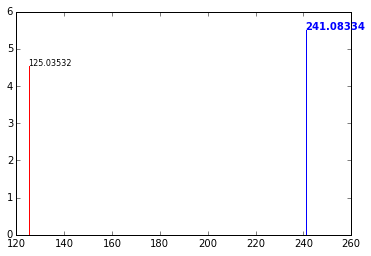

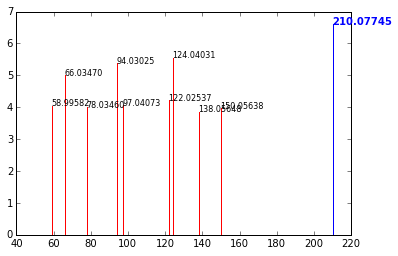

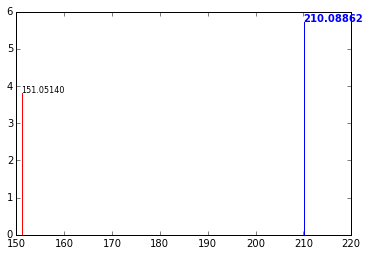

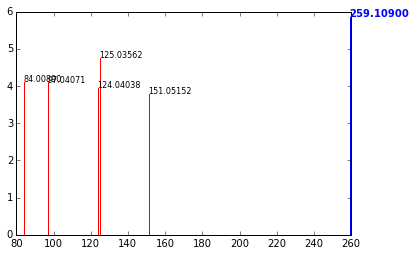

Topic 19

Parent peaks

     peakID	mz		rt		int		prob
1    5384 	292.14068	472.398		1.082e+07	0.645
2    5386 	292.14066	446.610		4.364e+06	0.642
3    5604 	278.12476	502.994		5.037e+06	0.617
4    7544 	264.10913	637.298		4.855e+06	0.483
5    8347 	307.15164	712.054		4.458e+05	0.483
6    7032 	250.09348	594.129		3.126e+06	0.481
7    8543 	307.15167	793.085		8.931e+05	0.386
8    2786 	391.20952	293.483		5.891e+05	0.369
9    6414 	276.10909	546.084		2.964e+06	0.349

Fragments

1    fragment_172.09804 (0.030)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13672   5384             172.098076  471.516  34837.289062
 13678   5386             172.097996  440.522   7557.832520
2    fragment_202.10775 (0.027)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13671   5384             202.107747  471.516  39113.484375
 13676   5386             202.107583  440.522  16879.210938
3    fragment_153.03019 (0.016)
Empty DataFrame
Columns: [peakID, MSnParentPeakID, mz, rt, inten

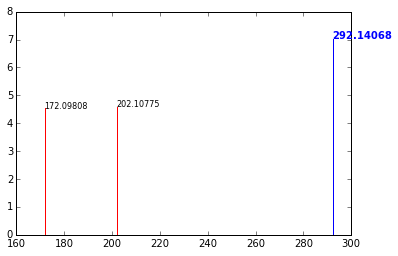

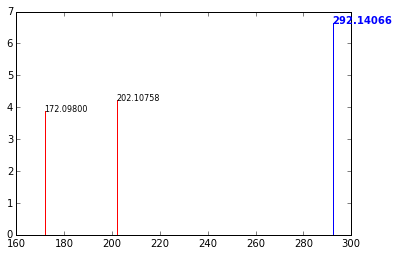

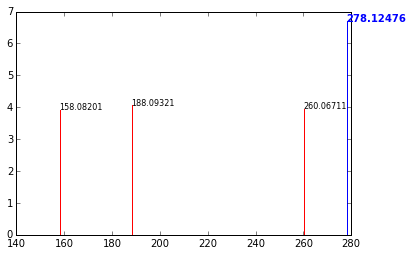

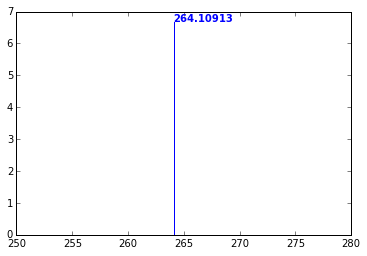

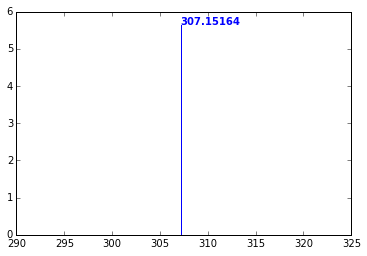

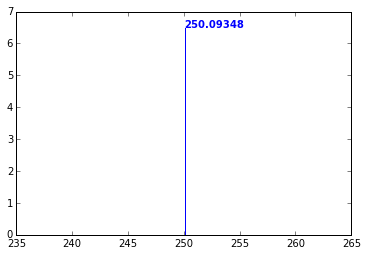

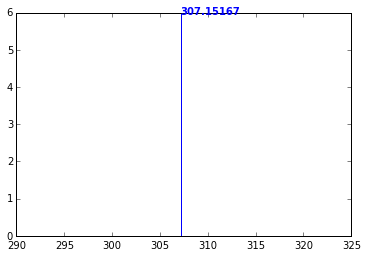

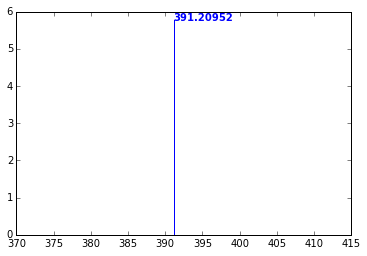

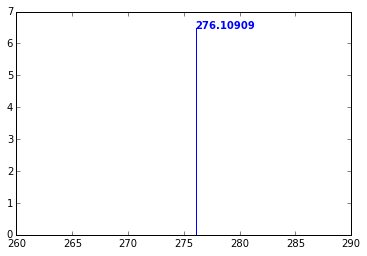

Topic 20

Parent peaks

     peakID	mz		rt		int		prob
1    3685 	329.23395	411.715		1.049e+06	0.963
2    1367 	313.23904	231.522		5.472e+05	0.767
3    7078 	203.05384	613.799		1.986e+06	0.558
4    7310 	239.05643	629.359		4.081e+05	0.479
5    3157 	329.23386	284.597		5.121e+05	0.469
6    4597 	257.05647	420.623		9.383e+06	0.240
7    5025 	156.03037	467.971		1.919e+06	0.003
8    11534	207.08757	589.768		4.295e+05	0.002
9    8186 	515.16263	694.063		5.200e+05	0.002

Fragments

1    fragment_211.13591 (0.074)
 peakID  MSnParentPeakID  mz          rt       intensity  
 12637   3157             211.135843  280.582  6329.984375
 12849   3685             211.135966  406.286  6258.893066
2    fragment_229.14544 (0.053)
 peakID  MSnParentPeakID  mz         rt       intensity  
 12848   3685             229.14553  406.286  6566.985352
3    fragment_179.03479 (0.052)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13349   4597             179.034847  416.929  276240.375000
 14726   

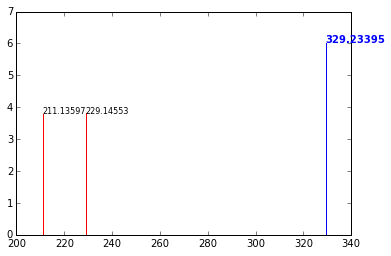

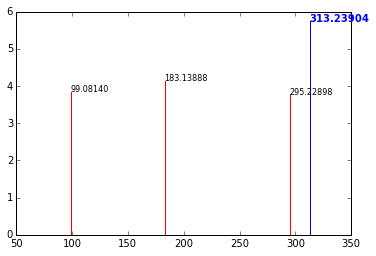

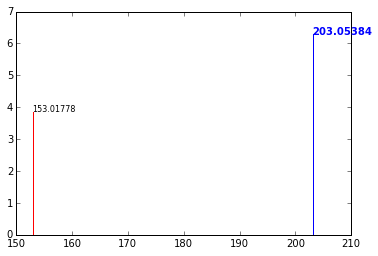

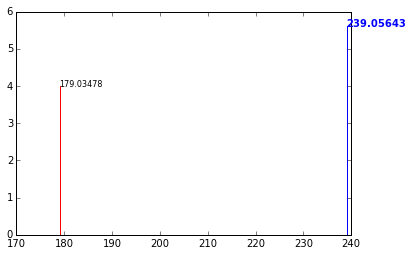

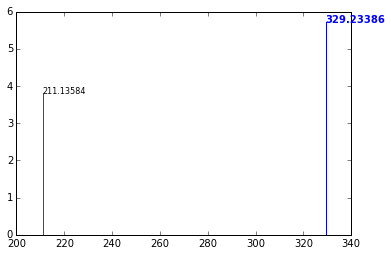

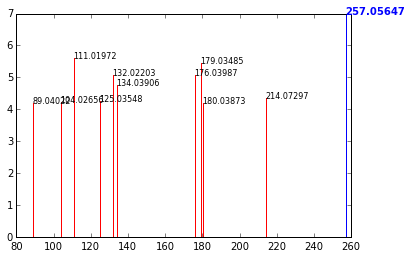

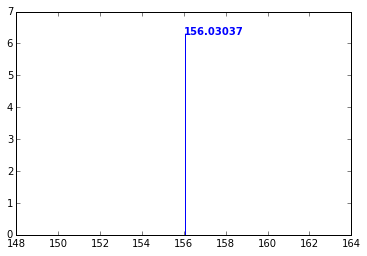

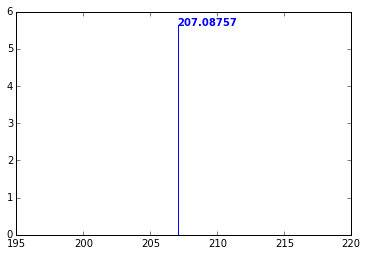

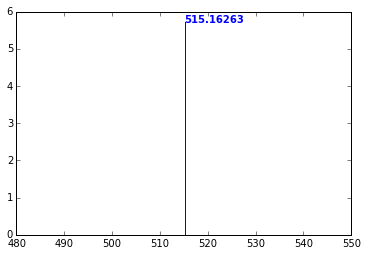

Topic 21

Parent peaks

     peakID	mz		rt		int		prob
1    8332 	899.29165	709.759		1.551e+06	0.978
2    7913 	687.19883	680.107		3.593e+05	0.798
3    8266 	737.23814	700.513		1.979e+06	0.596
4    8337 	980.31828	710.686		1.501e+06	0.578
5    7928 	281.08809	667.651		9.599e+05	0.483
6    8128 	503.16258	667.651		2.646e+07	0.422
7    7459 	357.10450	627.463		1.505e+06	0.339
8    7590 	415.14631	632.487		5.512e+05	0.337
9    8081 	353.10956	686.215		8.895e+05	0.324

Fragments

1    fragment_119.03506 (0.095)
 peakID  MSnParentPeakID  mz          rt       intensity    
 14815   7590             119.035041  649.799    7376.563965
 15003   7928             119.035095  670.399    5941.415039
 15164   8128             119.035007  670.750  247689.562500
2    fragment_221.06619 (0.055)
 peakID  MSnParentPeakID  mz          rt       intensity    
 14998   7928             221.066138  670.399   25831.105469
 15162   8128             221.065710  670.750  392172.031250
 15231   8266             221

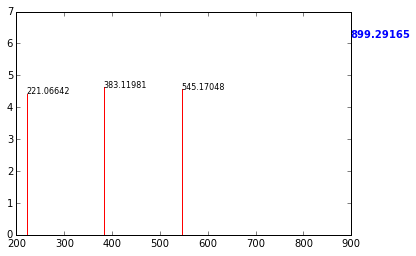

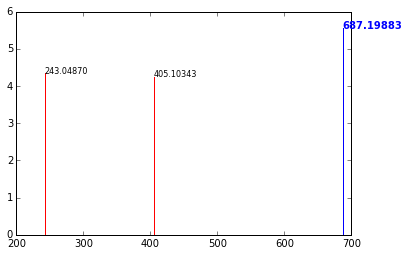

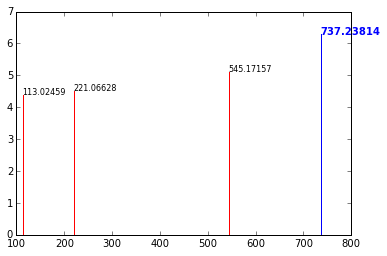

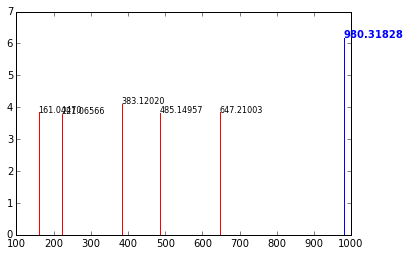

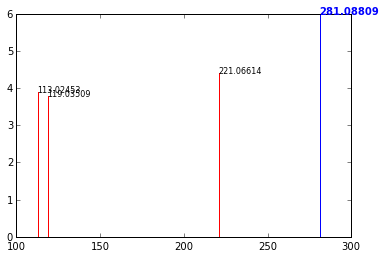

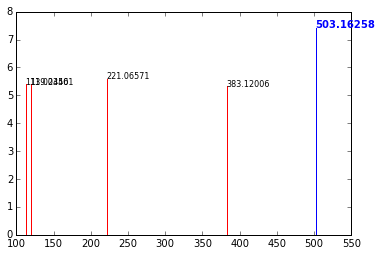

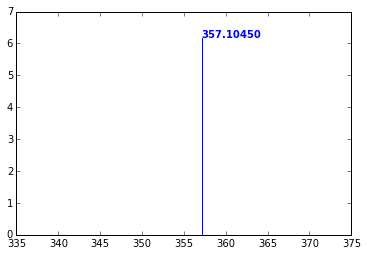

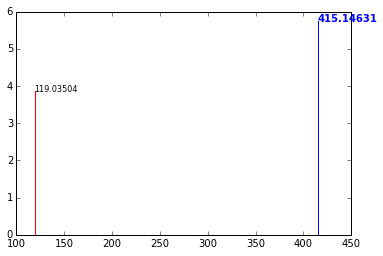

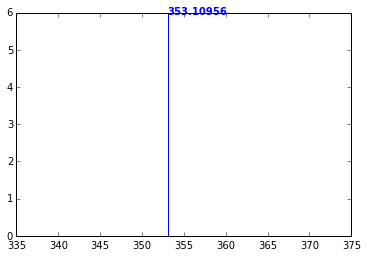

Topic 22

Parent peaks

     peakID	mz		rt		int		prob
1    8417 	341.10933	667.651		1.300e+07	0.503
2    2369 	297.13471	280.792		4.090e+05	0.458
3    6913 	221.06684	573.948		4.378e+05	0.416
4    7022 	191.01986	578.169		4.428e+06	0.398
5    8940 	179.05624	558.105		3.078e+07	0.386
6    7765 	223.04619	656.079		2.160e+06	0.344
7    11354	161.04564	468.855		6.508e+06	0.312
8    8128 	503.16258	667.651		2.646e+07	0.289
9    8202 	989.32341	693.447		2.771e+06	0.196

Fragments

1    fragment_55.01843 (0.054)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12217    2369            55.018386  277.995   6774.705078
 14624    7022            55.018576  577.610  15464.234375
 15169    8128            55.018424  670.750  61947.210938
 15308    8417            55.018408  662.804  23609.574219
 15357    8940            55.018391  562.250  20616.019531
 15599   11354            55.018401  467.354  13570.420898
2    fragment_57.03411 (0.033)
 peakID  MSnParentPeakID  mz         rt      

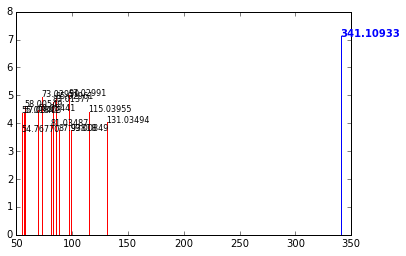

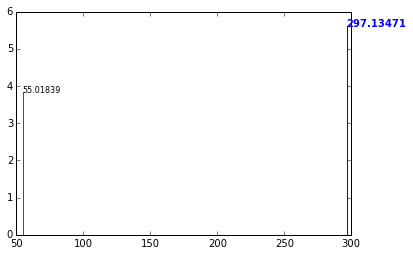

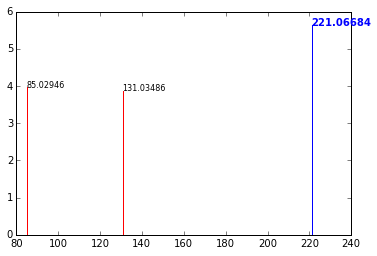

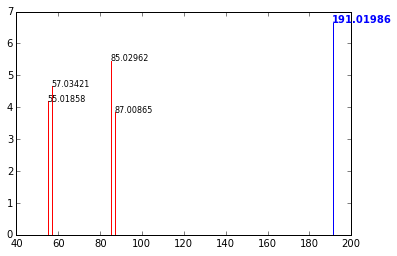

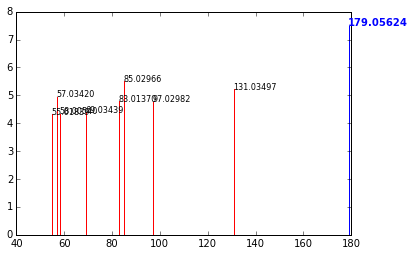

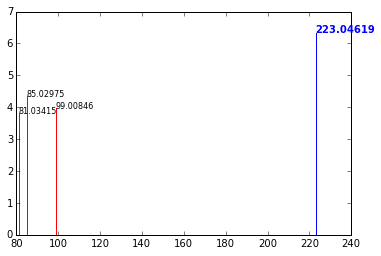

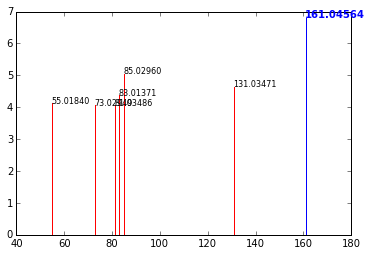

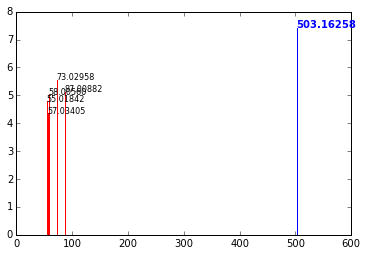

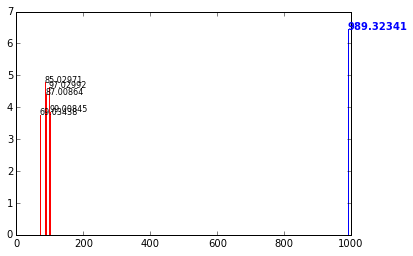

Topic 23

Parent peaks

     peakID	mz		rt		int		prob
1    1110 	334.17474	211.569		1.133e+06	0.985
2    1365 	308.19858	243.056		4.148e+05	0.984
3    5838 	152.02955	536.719		3.428e+05	0.956
4    6583 	215.00219	585.025		2.536e+05	0.917
5    7707 	189.00420	646.644		4.099e+05	0.761
6    7706 	189.00426	660.532		1.390e+06	0.754
7    11337	160.07686	348.371		1.156e+07	0.690
8    6386 	316.11541	573.948		8.138e+05	0.646
9    3136 	371.09897	300.531		1.050e+06	0.528

Fragments

1    fragment_154.06233 (0.072)
 peakID  MSnParentPeakID  mz          rt       intensity   
 11859   1365             154.062230  243.558  21806.025391
 14178   6386             154.062347  569.688  81068.078125
2    fragment_93.04614 (0.064)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11860   1365             93.046175  243.558   9773.847656
 14179   6386             93.046103  569.688  23133.750000
3    fragment_110.07274 (0.049)
 peakID  MSnParentPeakID  mz          rt       intensity   
 11858  

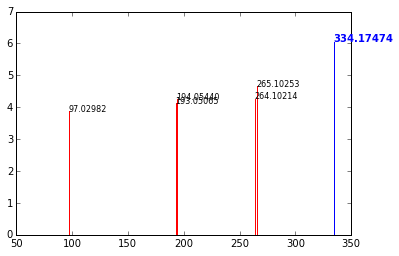

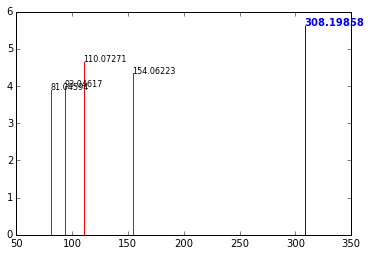

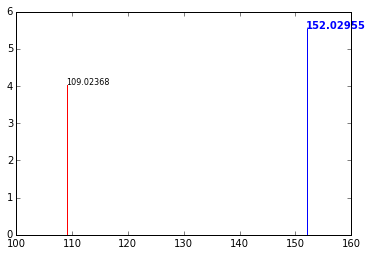

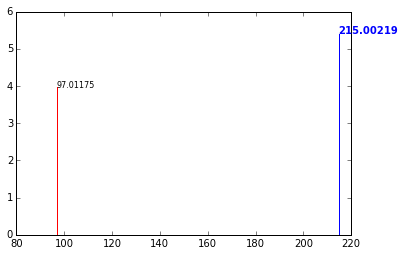

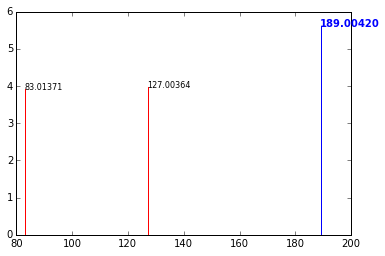

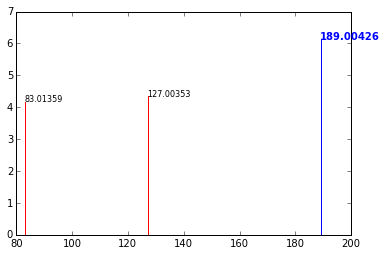

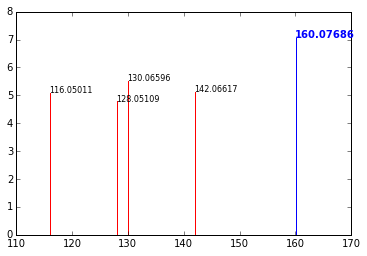

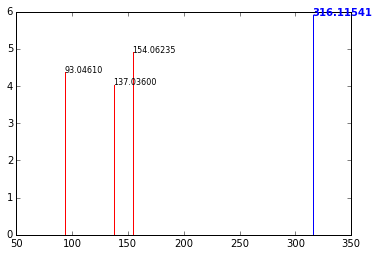

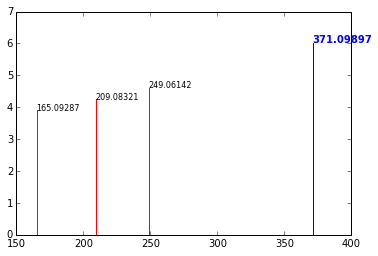

Topic 24

Parent peaks

     peakID	mz		rt		int		prob
1    2811 	243.12392	280.792		3.192e+05	0.960
2    5555 	306.05847	502.994		1.323e+06	0.936
3    5617 	432.13651	516.801		2.043e+06	0.936
4    8970 	235.95386	738.220		2.558e+05	0.930
5    10093	117.01926	618.957		3.196e+08	0.738
6    7572 	475.13113	645.920		6.343e+05	0.733
7    7273 	244.06750	613.799		1.954e+06	0.552
8    2076 	244.15566	241.693		1.144e+06	0.526
9    5514 	341.12065	507.012		6.122e+05	0.501

Fragments

1    fragment_61.98795 (0.225)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13794   5514             61.987999  504.299   91131.929688
 13861   5555             61.987930  499.680  134288.328125
 13925   5617             61.987936  508.454  155257.843750
 14722   7273             61.987812  611.826  295852.125000
 15402   8970             61.987928  741.654   53829.367188
2    fragment_115.00333 (0.096)
 peakID  MSnParentPeakID  mz          rt      intensity   
 14806   7572             115.003359  

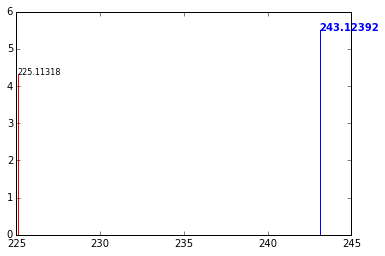

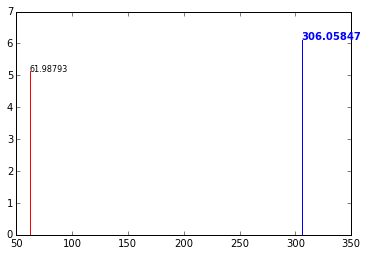

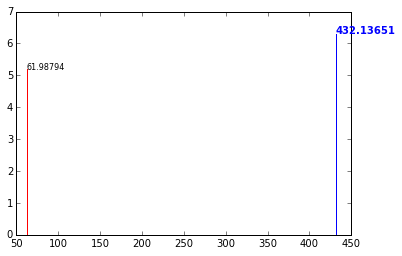

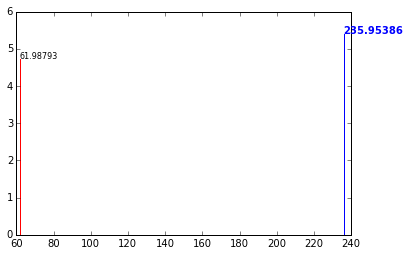

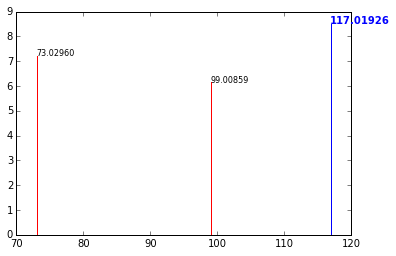

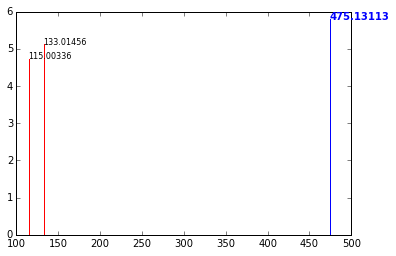

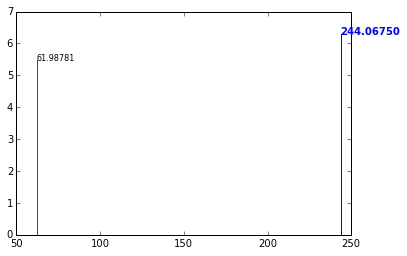

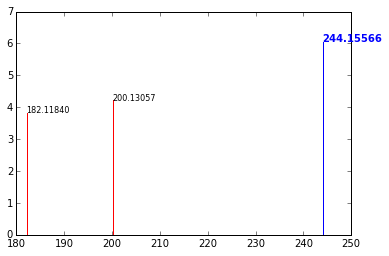

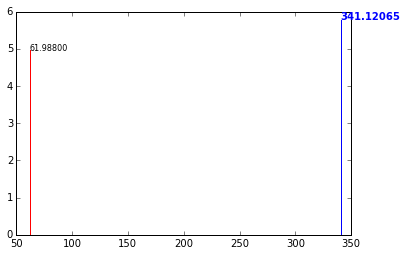

Topic 25

Parent peaks

     peakID	mz		rt		int		prob
1    2801 	279.12406	224.053		2.327e+06	0.951
2    657  	745.39578	205.273		4.608e+05	0.928
3    2878 	365.19755	252.728		8.040e+05	0.923
4    2507 	377.19741	211.569		2.920e+07	0.885
5    2877 	365.19745	212.744		4.816e+06	0.860
6    2872 	251.12922	216.438		3.538e+06	0.853
7    1792 	351.18189	221.797		1.982e+06	0.713
8    2687 	393.19254	286.726		1.387e+06	0.629
9    1398 	351.14560	233.439		5.676e+05	0.416

Fragments

1    fragment_125.06066 (0.059)
 peakID  MSnParentPeakID  mz          rt       intensity    
 11685    657             125.060695  205.062   16633.345703
 11889   1398             125.060682  231.038    9138.442383
 12315   2507             125.060795  218.451  193238.171875
 12397   2687             125.060599  282.474   13088.191406
 12440   2801             125.060608  229.958   15422.146484
 12461   2872             125.060458  212.254   19043.228516
 12475   2877             125.060836  221.170   38068.257812


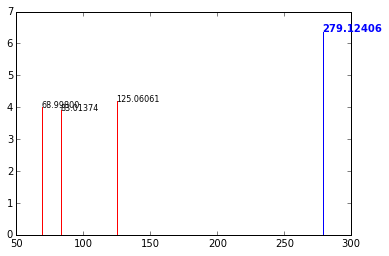

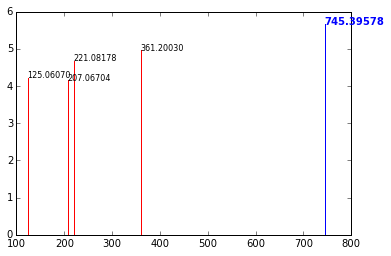

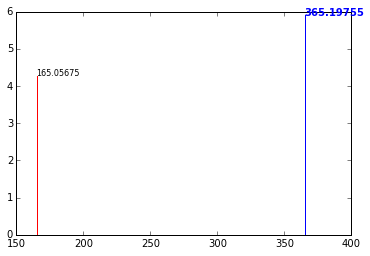

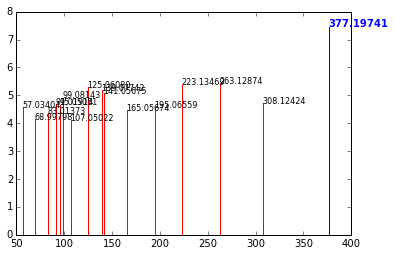

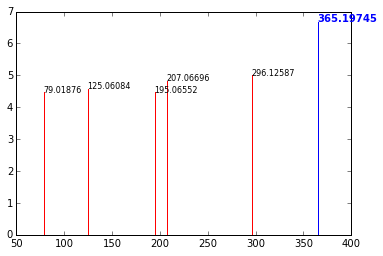

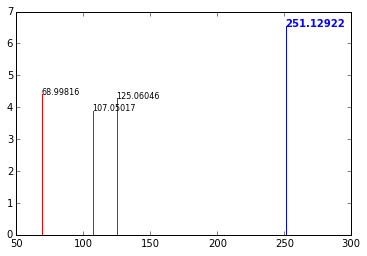

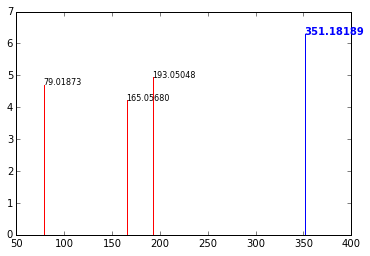

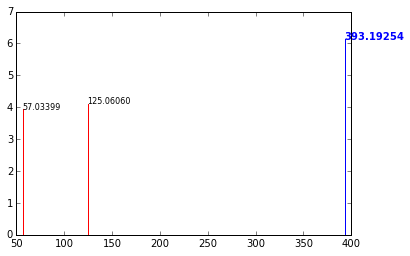

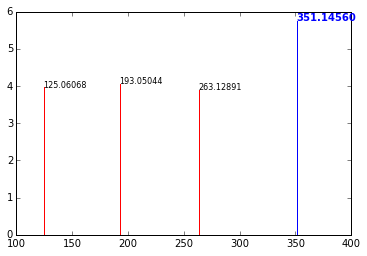

Topic 26

Parent peaks

     peakID	mz		rt		int		prob
1    5254 	155.00994	496.016		7.976e+05	0.963
2    1957 	220.09815	287.206		2.495e+05	0.955
3    10049	128.03529	486.522		3.895e+08	0.728
4    4162 	195.06640	275.746		4.322e+05	0.655
5    7947 	566.15873	672.227		2.287e+06	0.486
6    4832 	163.04024	457.707		3.068e+05	0.480
7    7022 	191.01986	578.169		4.428e+06	0.449
8    7017 	174.04087	597.768		9.417e+05	0.423
9    6469 	246.04438	561.500		8.725e+05	0.415

Fragments

1    fragment_168.06763 (0.055)
 peakID  MSnParentPeakID  mz         rt       intensity  
 14303   6469             168.06775  557.411  6054.025391
2    fragment_77.71067 (0.036)
 peakID  MSnParentPeakID  mz         rt       intensity  
 15447   10049            77.710673  486.794  156033.6875
3    fragment_84.9225 (0.036)
 peakID  MSnParentPeakID  mz         rt       intensity    
 15448   10049            84.922505  486.794  134875.171875
4    fragment_111.01973 (0.032)
 peakID  MSnParentPeakID  mz          rt   

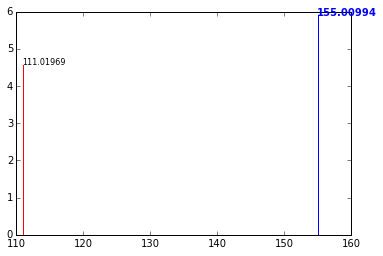

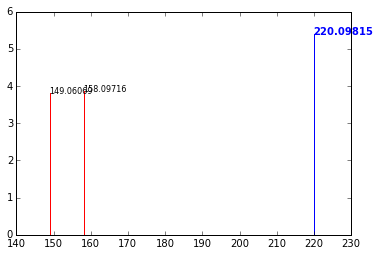

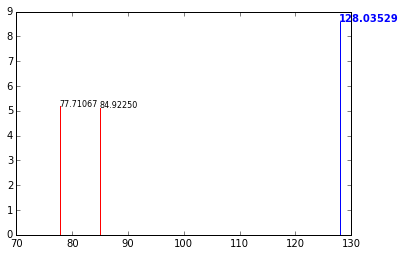

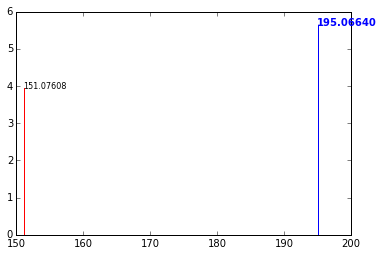

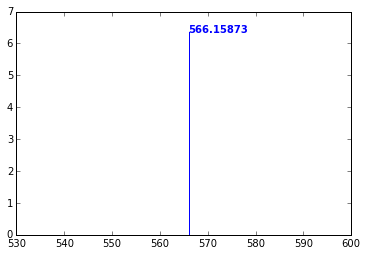

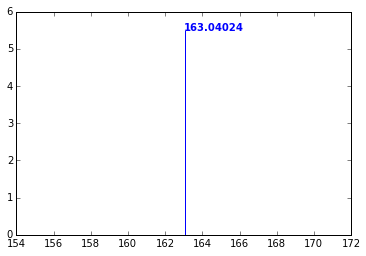

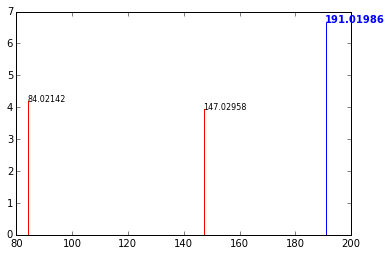

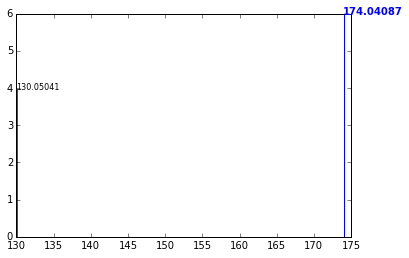

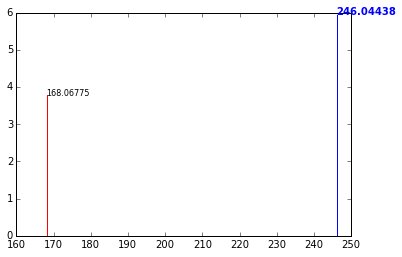

Topic 27

Parent peaks

     peakID	mz		rt		int		prob
1    4032 	356.09924	422.249		1.297e+06	0.914
2    6071 	315.09394	558.853		3.928e+05	0.815
3    5090 	297.11952	468.855		8.339e+05	0.716
4    6418 	345.10430	558.105		2.921e+05	0.675
5    6195 	371.12007	554.039		1.797e+06	0.520
6    7875 	263.07753	662.528		5.891e+05	0.479
7    6432 	349.04180	582.329		3.257e+05	0.446
8    6018 	412.14673	550.538		4.435e+05	0.441
9    7459 	357.10450	627.463		1.505e+06	0.339

Fragments

1    fragment_75.00852 (0.243)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13588   5090             75.008549  466.146  16782.214844
 14095   6071             75.008433  558.032  10367.153320
 14227   6418             75.008591  557.550  23363.117188
 14768   7459             75.008656  631.613  34648.136719
2    fragment_135.03044 (0.081)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13586   5090             135.030307  466.146  53357.441406
 14057   6018             135.030631  548.

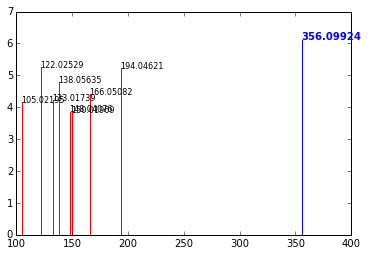

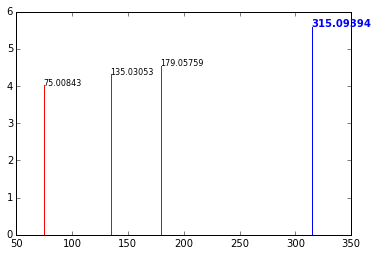

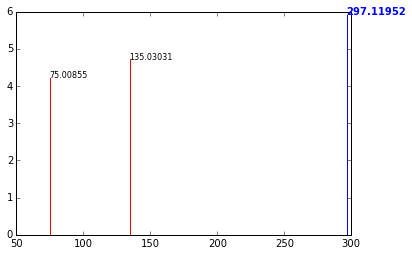

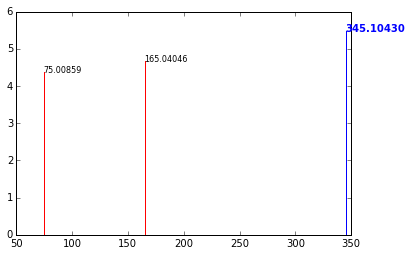

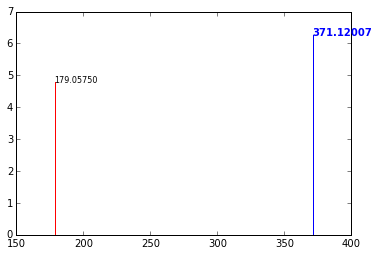

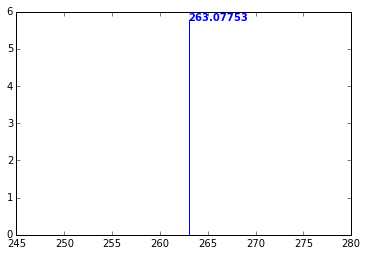

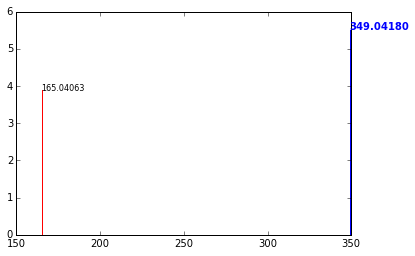

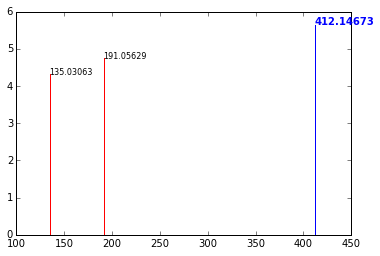

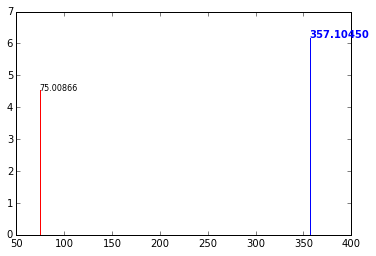

Topic 28

Parent peaks

     peakID	mz		rt		int		prob
1    5100 	311.13528	478.776		8.294e+05	0.926
2    1361 	231.16040	241.693		2.979e+05	0.921
3    7271 	182.07510	613.799		4.751e+06	0.733
4    5699 	183.08750	516.801		1.929e+07	0.663
5    8412 	335.15790	711.463		3.730e+05	0.654
6    7627 	181.07185	613.799		7.437e+07	0.596
7    4895 	323.13519	446.132		6.587e+05	0.397
8    5561 	147.06635	337.489		1.637e+06	0.309
9    7888 	405.10190	662.528		6.904e+05	0.291

Fragments

1    fragment_59.01349 (0.439)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11856   1361             59.013613  240.618  15317.261719
 13495   4895             59.013418  448.119   7745.763184
 13593   5100             59.013526  470.153  25549.914062
 13878   5561             59.013430  334.112   6779.640625
 13937   5699             59.013562  510.920  15516.832031
 14705   7271             59.013566  611.413  11019.788086
 14835   7627             59.013418  603.235   8055.715332
2    fragment_89.

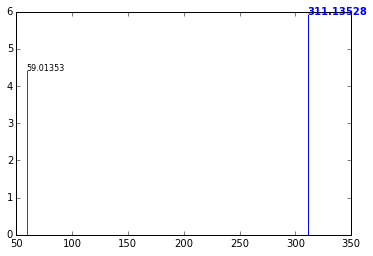

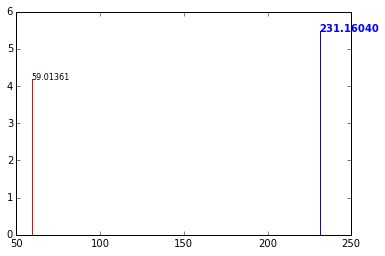

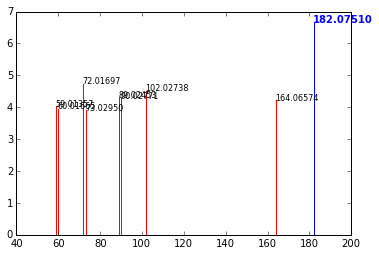

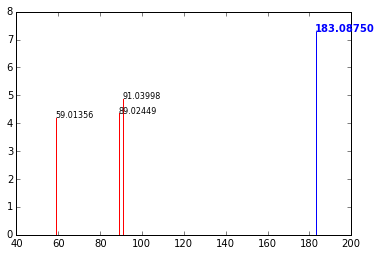

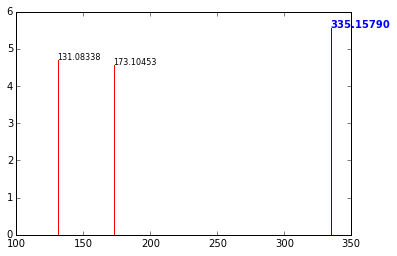

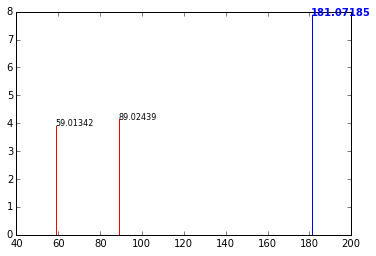

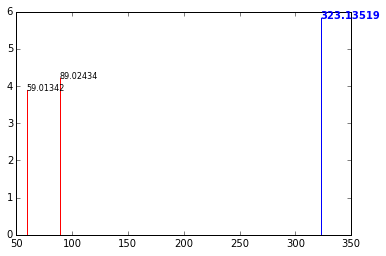

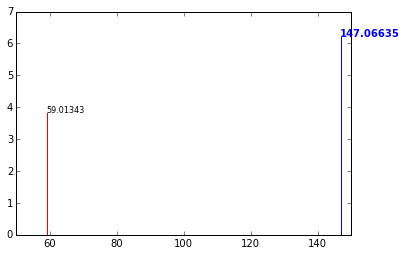

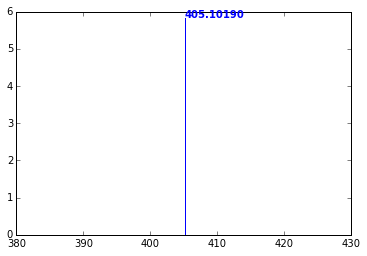

Topic 29

Parent peaks

     peakID	mz		rt		int		prob
1    3807 	213.03420	324.471		3.753e+05	0.978
2    4160 	195.06642	324.899		6.141e+05	0.971
3    4163 	195.06643	357.135		3.587e+05	0.721
4    4161 	195.06643	416.287		6.237e+06	0.660
5    7449 	148.03326	619.982		6.929e+06	0.568
6    2493 	339.12432	244.220		2.743e+05	0.555
7    4959 	167.03508	456.203		1.104e+06	0.537
8    6374 	230.06721	547.862		1.012e+06	0.280
9    6804 	223.02843	597.768		3.035e+05	0.249

Fragments

1    fragment_121.02919 (0.099)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13154   4160             121.028926  320.626   10000.372070
 13162   4161             121.029374  418.049  108062.328125
 13183   4163             121.029218  352.103    6143.244141
2    fragment_136.05249 (0.034)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13161   4161             136.052544  418.049  115092.062500
 13184   4163             136.052440  352.103    5172.822754
3    fragment_123.04539 (0.03

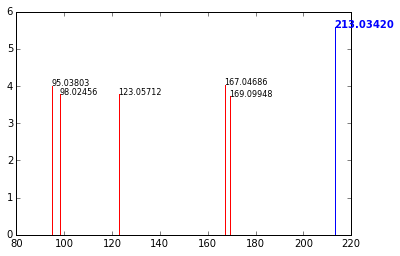

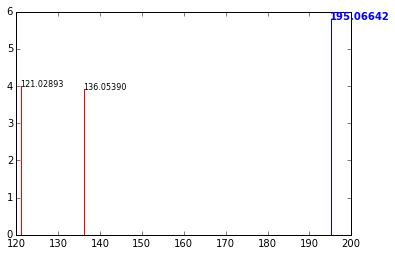

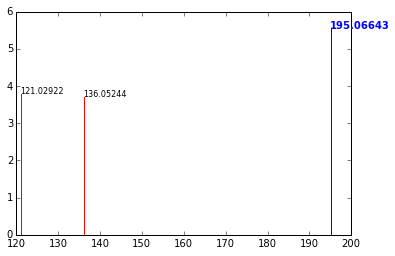

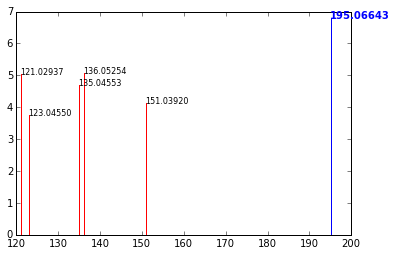

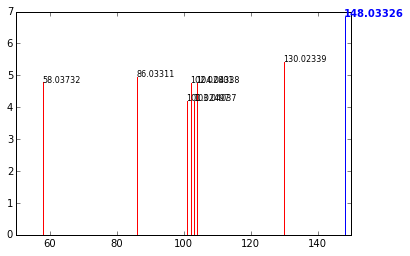

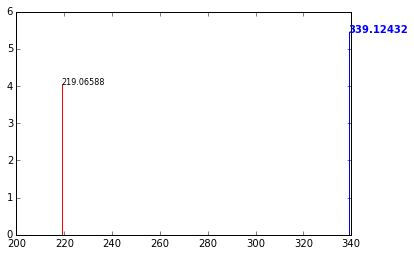

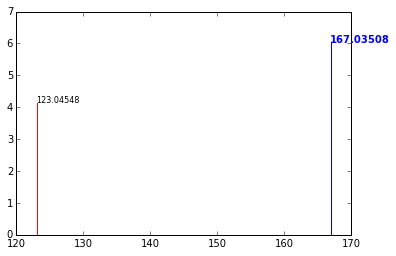

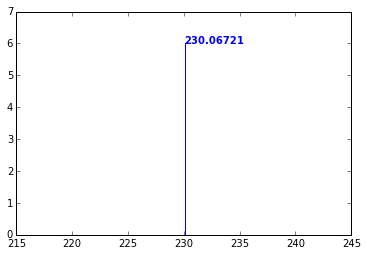

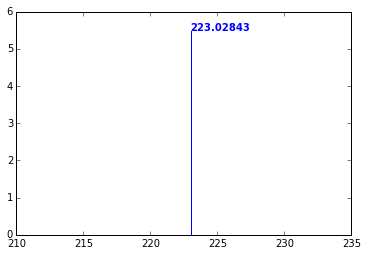

Topic 30

Parent peaks

     peakID	mz		rt		int		prob
1    6392 	257.07823	571.674		1.048e+06	0.983
2    5205 	263.09005	493.424		1.241e+06	0.974
3    5280 	380.15684	478.776		3.402e+06	0.970
4    4907 	403.13632	468.855		6.766e+05	0.963
5    6802 	218.06715	572.706		4.199e+05	0.957
6    5279 	372.10542	497.090		8.796e+05	0.936
7    5153 	279.06008	486.522		1.805e+06	0.932
8    1433 	299.19809	239.581		1.282e+06	0.833
9    5323 	293.11491	498.244		4.730e+05	0.733

Fragments

1    fragment_128.03605 (0.274)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13496   4907             128.035985  469.879  163620.687500
 13629   5153             128.035877  478.433   70276.515625
 13633   5205             128.036174  490.727  100907.804688
 13639   5279             128.036045  494.365  160841.671875
 13640   5280             128.036038  479.051  728401.500000
 13645   5323             128.036090  495.671   16521.656250
 14215   6392             128.036013  575.993   30581.138672


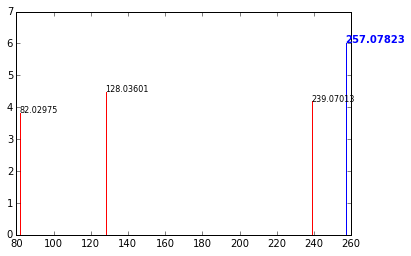

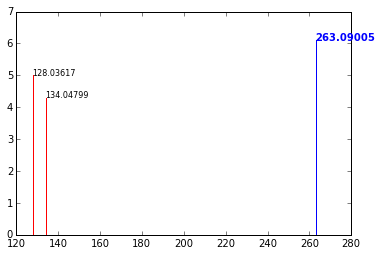

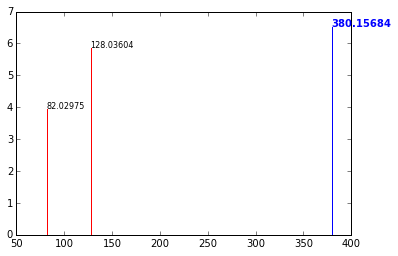

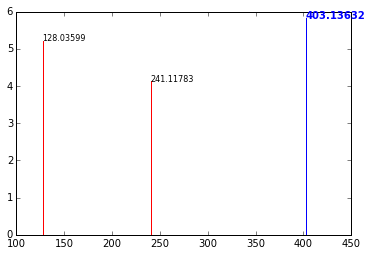

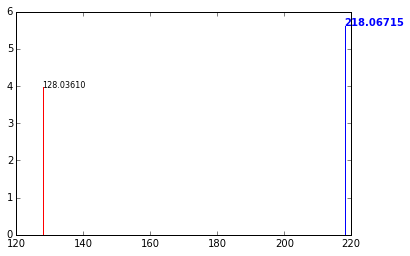

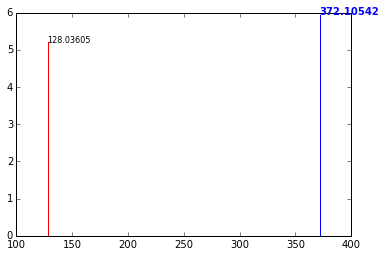

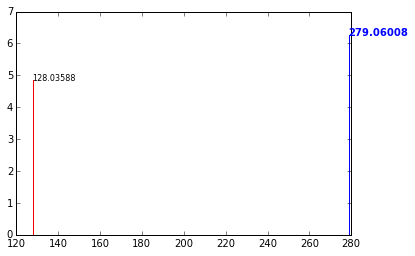

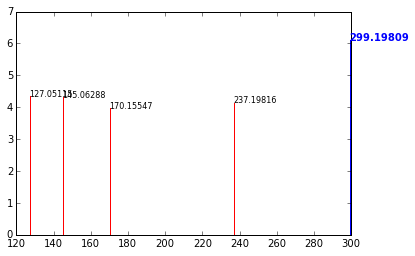

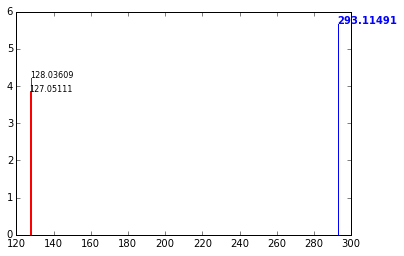

Topic 31

Parent peaks

     peakID	mz		rt		int		prob
1    5134 	225.08836	335.661		4.196e+06	0.987
2    3115 	324.15702	300.531		9.116e+05	0.981
3    6441 	154.04862	578.785		6.807e+05	0.929
4    5358 	265.04455	501.050		3.113e+05	0.914
5    8186 	515.16263	694.063		5.200e+05	0.912
6    2487 	319.13371	286.726		4.143e+05	0.841
7    3592 	190.05457	395.756		4.081e+05	0.765
8    3277 	372.15702	293.483		3.996e+06	0.620
9    3908 	233.10461	419.048		1.446e+06	0.614

Fragments

1    fragment_82.02981 (0.180)
 peakID  MSnParentPeakID  mz         rt       intensity    
 12576   3115             82.029750  298.539    7751.294434
 12661   3277             82.029756  288.100   12287.326172
 13599   5134             82.029940  348.162  138570.375000
2    fragment_114.05604 (0.103)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12573   3115             114.055970  298.539  36293.593750
 13601   5134             114.055847  348.162   7214.732422
 14255   6441             114.056042 

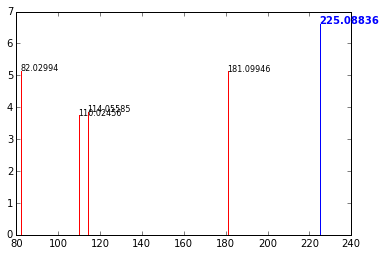

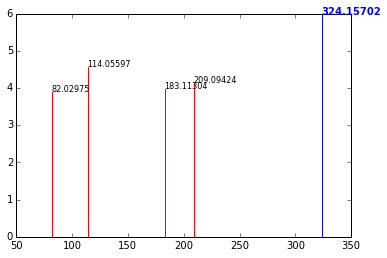

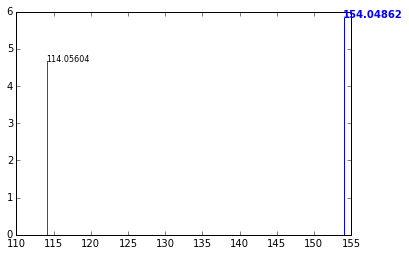

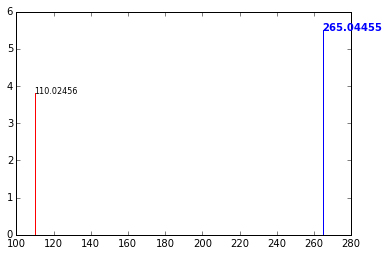

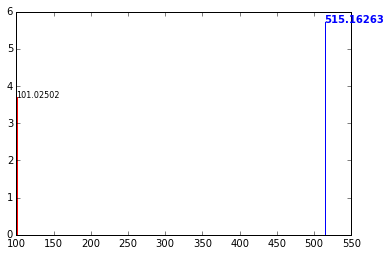

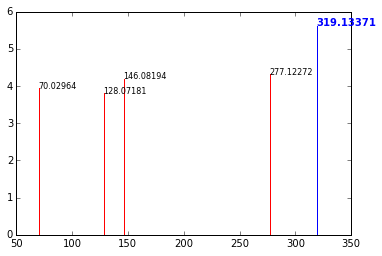

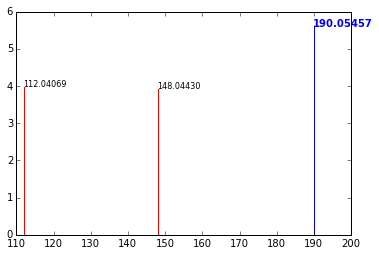

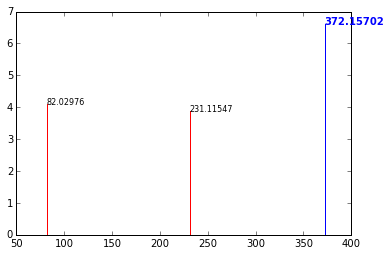

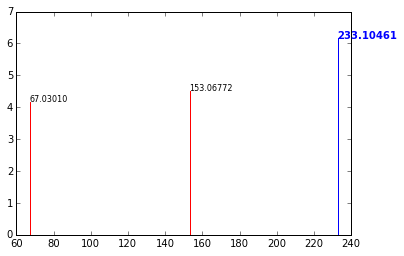

Topic 32

Parent peaks

     peakID	mz		rt		int		prob
1    3860 	187.02497	409.914		2.497e+05	0.922
2    6578 	205.03553	564.181		1.902e+06	0.902
3    1387 	391.21340	208.874		1.666e+06	0.857
4    6454 	219.05121	524.506		2.930e+06	0.842
5    8885 	191.01988	708.033		5.977e+07	0.774
6    4787 	175.06127	284.597		3.090e+05	0.556
7    6437 	366.99468	583.220		4.739e+05	0.404
8    6788 	237.06183	584.111		6.410e+05	0.371
9    7765 	223.04619	656.079		2.160e+06	0.338

Fragments

1    fragment_111.00859 (0.116)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12905   3860             111.009034  407.625   15420.739258
 14277   6454             111.008561  524.779  165750.812500
 14330   6578             111.008600  562.840  115041.781250
 15333   8885             111.008615  715.821  205988.484375
2    fragment_129.02 (0.067)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13406   4787             129.020007  286.654  14034.104492
 14283   6454             129.0197

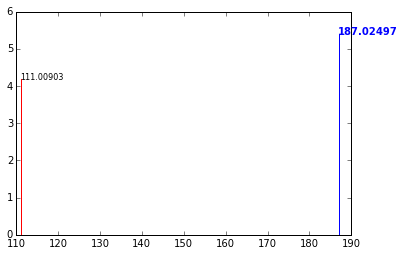

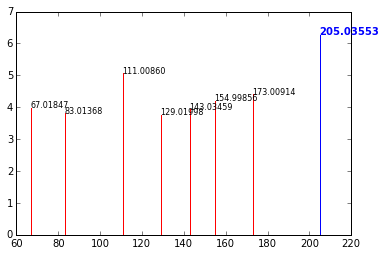

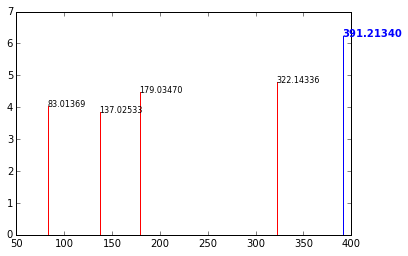

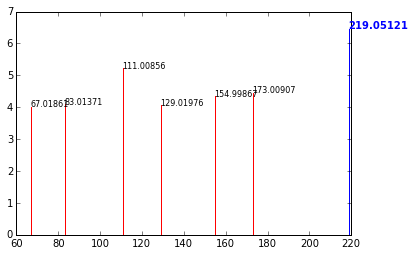

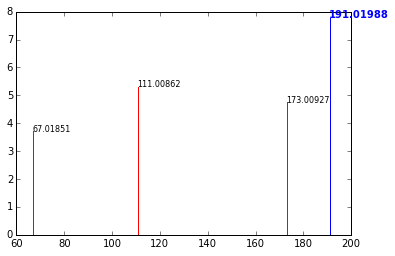

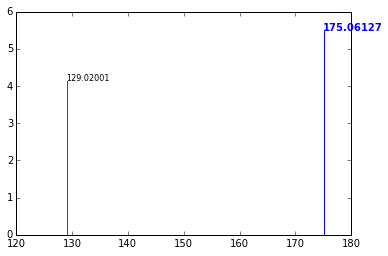

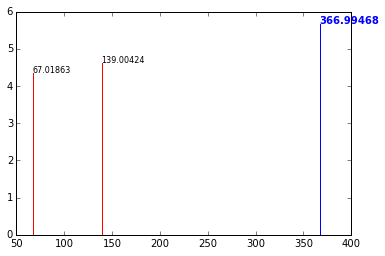

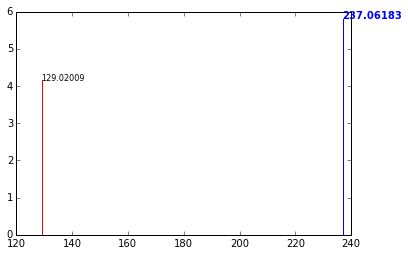

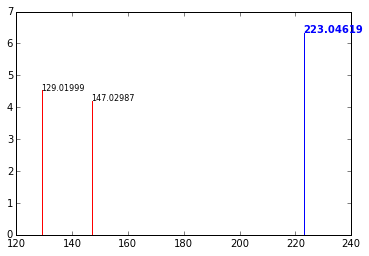

Topic 33

Parent peaks

     peakID	mz		rt		int		prob
1    4139 	204.06676	420.623		3.780e+06	0.907
2    5448 	159.02998	422.249		1.515e+06	0.900
3    7472 	159.02996	607.405		2.879e+06	0.821
4    6804 	223.02843	597.768		3.035e+05	0.529
5    5591 	146.04594	498.244		7.777e+06	0.490
6    7972 	187.02496	686.215		7.243e+05	0.480
7    3024 	227.12919	247.636		5.997e+05	0.479
8    4705 	187.06133	286.726		3.099e+05	0.479
9    4633 	206.04599	448.326		1.106e+06	0.345

Fragments

1    fragment_57.03411 (0.061)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13704   5448             57.034002  420.088   8958.100586
 13914   5591             57.034093  502.648  19992.927734
2    fragment_97.02986 (0.043)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13703   5448             97.029844  420.088  85015.601562
 14779   7472             97.029901  615.843  13557.051758
3    fragment_69.03444 (0.033)
 peakID  MSnParentPeakID  mz         rt       intensity  
 13705   5448  

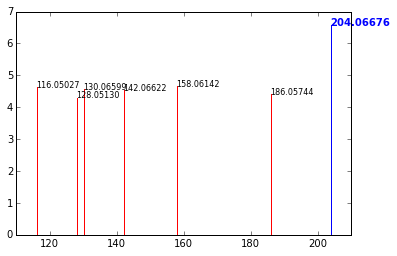

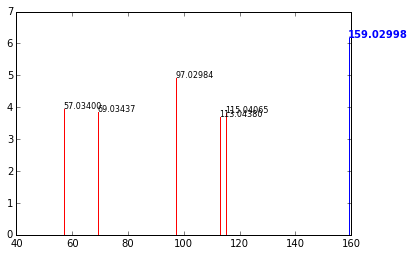

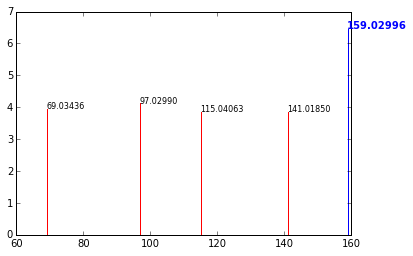

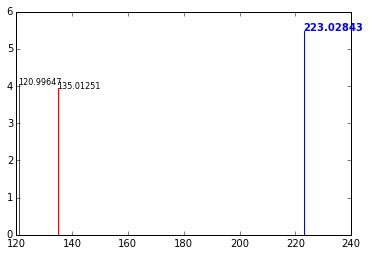

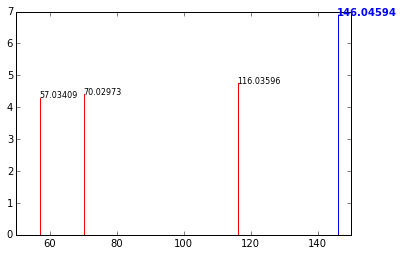

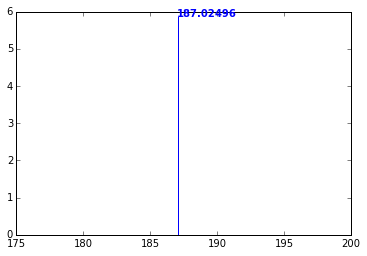

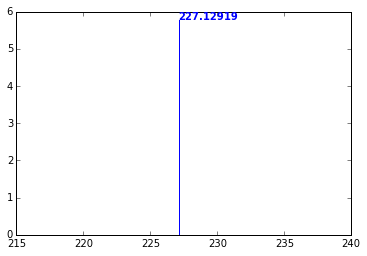

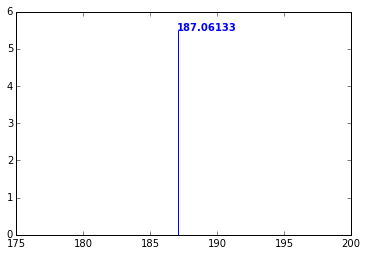

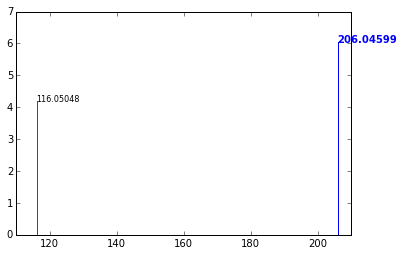

Topic 34

Parent peaks

     peakID	mz		rt		int		prob
1    11198	137.06080	375.779		1.823e+07	0.990
2    11197	137.06081	306.799		9.562e+06	0.990
3    5298 	271.08275	498.244		3.052e+05	0.929
4    4795 	179.03511	423.864		1.342e+07	0.841
5    3074 	347.18685	210.053		1.385e+08	0.762
6    5978 	342.11993	536.719		1.476e+06	0.644
7    4985 	181.05081	456.818		1.551e+07	0.612
8    1424 	381.19269	221.797		6.911e+05	0.574
9    3609 	271.06149	284.597		7.864e+05	0.501

Fragments

1    fragment_119.0499 (0.248)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12818    3609            119.049778  280.051   36513.046875
 13548    4985            119.049886  459.618  222791.500000
 14025    5978            119.049843  531.991   15661.065430
 15534   11197            119.049861  301.693  109169.093750
2    fragment_107.05022 (0.084)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12545    3074            107.050172  224.328   8118.051758
 13412    4795            107.05

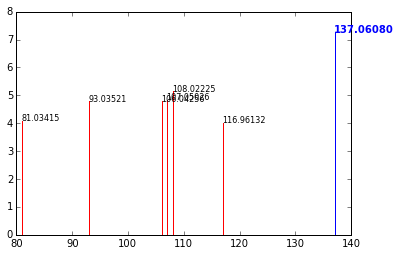

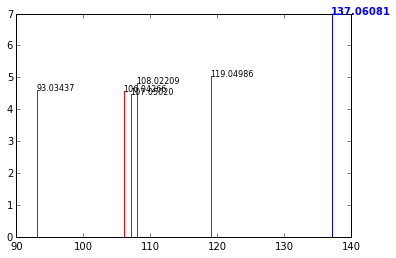

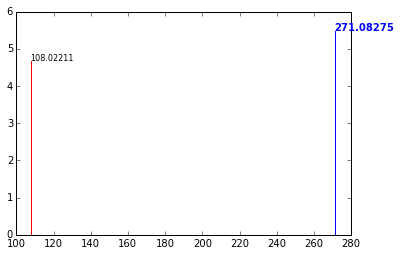

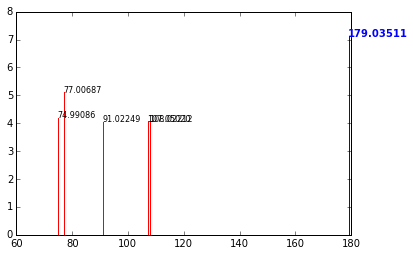

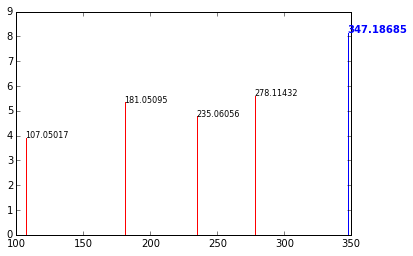

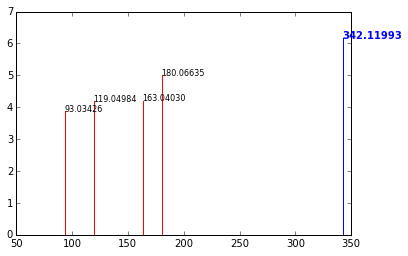

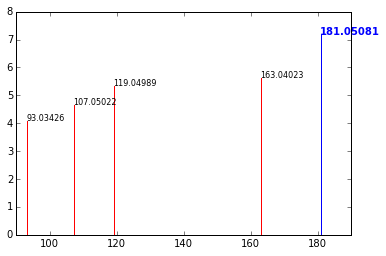

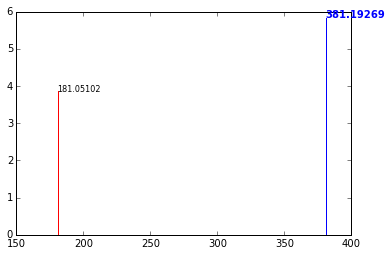

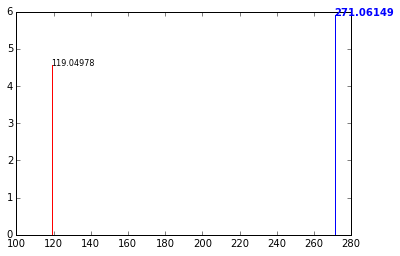

Topic 35

Parent peaks

     peakID	mz		rt		int		prob
1    4061 	337.09358	342.475		4.817e+05	0.935
2    4062 	337.09353	397.429		4.907e+05	0.879
3    4059 	337.09361	323.376		6.008e+05	0.851
4    3578 	367.10397	394.131		3.455e+05	0.740
5    3577 	367.10392	291.858		4.065e+06	0.674
6    3580 	367.10397	350.396		3.331e+05	0.665
7    3792 	338.17291	414.667		7.709e+05	0.595
8    6459 	499.16752	576.307		6.883e+05	0.584
9    6052 	383.12018	553.420		1.234e+06	0.539

Fragments

1    fragment_93.03432 (0.115)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12782   3577             93.034260  285.761  56617.609375
 12793   3578             93.034284  393.919   7089.252441
 12801   3580             93.034334  352.513  12456.376953
 13021   4059             93.034187  325.923  13156.026367
 13047   4062             93.034523  394.059  22020.087891
 14295   6459             93.034279  573.601  36910.003906
2    fragment_191.05634 (0.101)
 peakID  MSnParentPeakID  mz          rt    

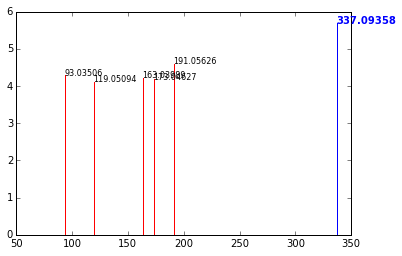

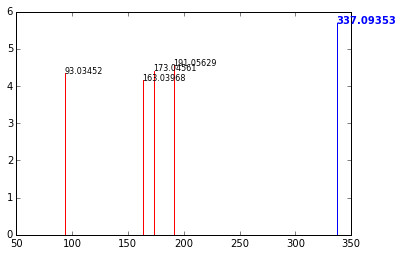

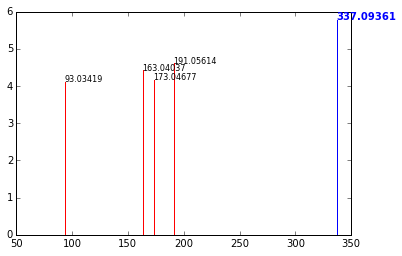

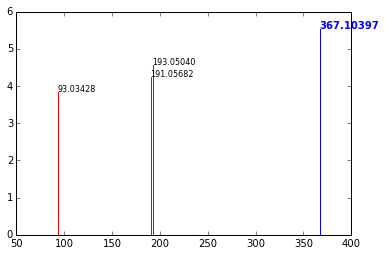

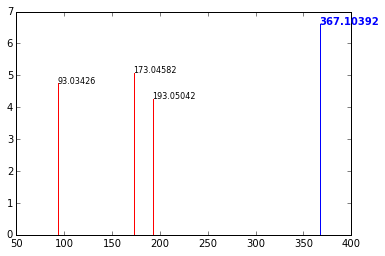

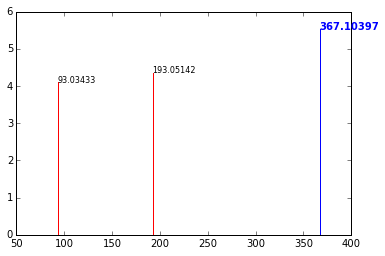

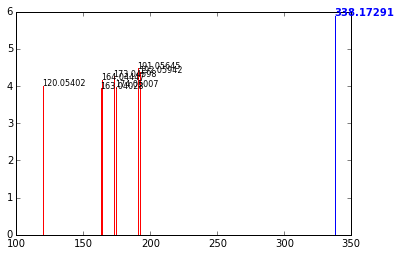

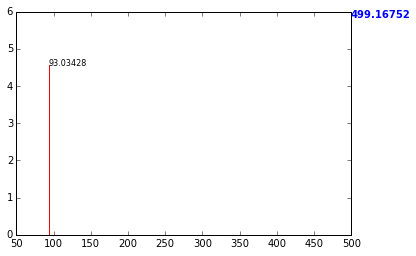

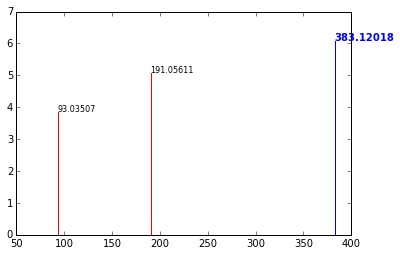

Topic 36

Parent peaks

     peakID	mz		rt		int		prob
1    7934 	763.19369	675.484		1.017e+06	0.810
2    8279 	656.21126	697.223		1.284e+06	0.736
3    7816 	1007.33420	666.796		2.221e+06	0.728
4    7935 	763.19375	657.412		6.875e+05	0.638
5    7664 	357.00004	656.079		6.019e+05	0.551
6    8027 	425.13093	667.651		3.882e+06	0.541
7    7900 	601.14012	663.257		8.326e+06	0.506
8    7960 	728.21236	680.107		1.228e+06	0.484
9    7847 	539.13972	669.854		3.332e+05	0.467

Fragments

1    fragment_97.02986 (0.087)
 peakID  MSnParentPeakID  mz         rt       intensity   
 14905   7816             97.029928  672.661  92372.460938
 14985   7900             97.030028  664.741  28118.832031
 15018   7934             97.029833  671.737   6053.963867
 15091   8027             97.029931  667.928  25984.937500
 15235   8279             97.029808  705.834  16755.919922
2    fragment_383.12068 (0.054)
 peakID  MSnParentPeakID  mz          rt       intensity    
 14903   7816             383.120896  672

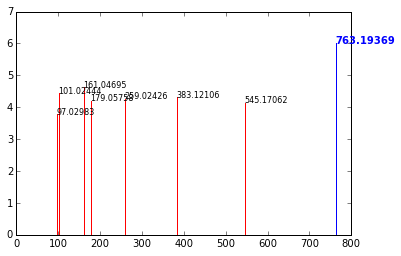

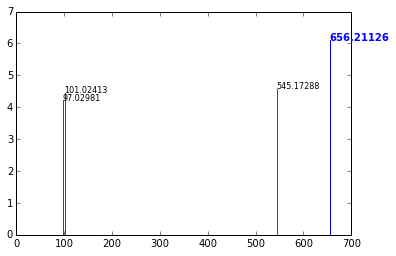

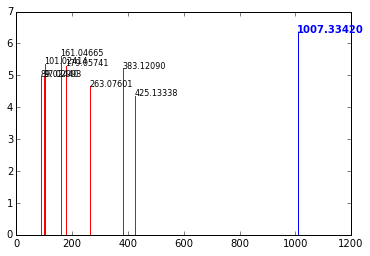

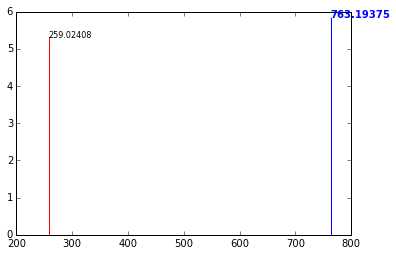

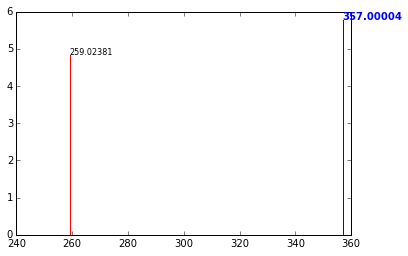

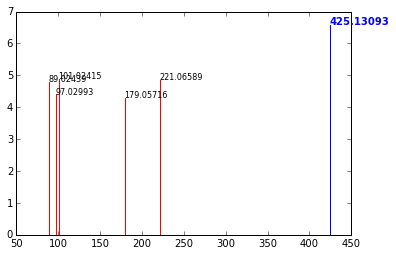

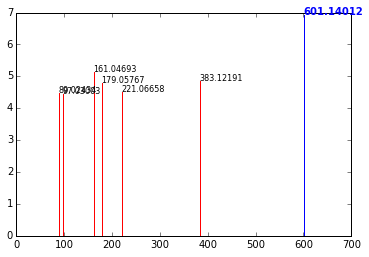

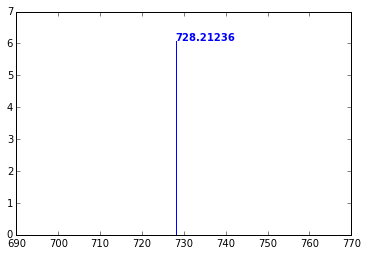

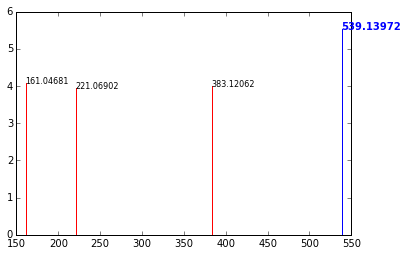

Topic 37

Parent peaks

     peakID	mz		rt		int		prob
1    2161 	538.25704	262.899		6.293e+05	0.980
2    10937	116.07171	532.814		8.372e+06	0.933
3    6991 	111.02000	416.287		2.326e+06	0.920
4    3042 	379.17691	295.703		1.328e+06	0.614
5    4323 	515.12044	420.623		1.047e+06	0.575
6    3024 	227.12919	247.636		5.997e+05	0.479
7    3609 	271.06149	284.597		7.864e+05	0.461
8    2632 	262.11372	294.098		5.473e+05	0.405
9    6459 	499.16752	576.307		6.883e+05	0.355

Fragments

1    fragment_134.03738 (0.176)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12123   2161             134.037625  258.484  39231.847656
 13246   4323             134.037362  426.454  10564.241211
2    fragment_67.01856 (0.118)
 peakID  MSnParentPeakID  mz         rt       intensity   
 14296   6459             67.018494  573.601   5626.244629
 14595   6991             67.018587  421.162  11956.364258
3    fragment_65.00311 (0.103)
 peakID  MSnParentPeakID  mz        rt       intensity   
 12819   36

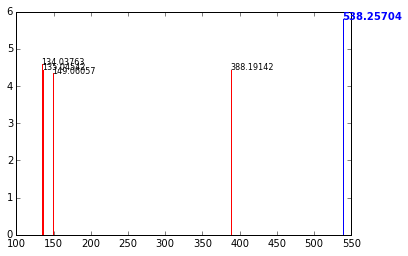

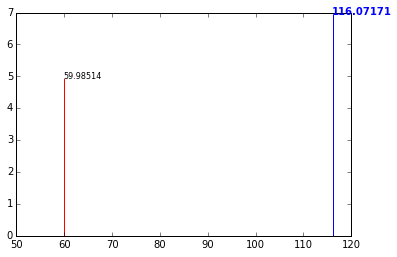

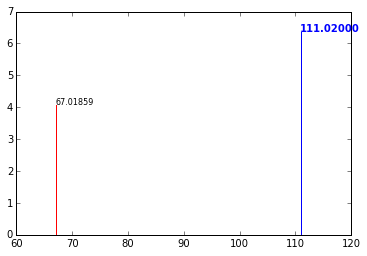

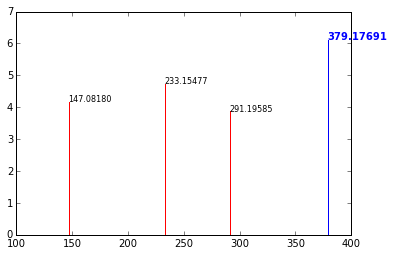

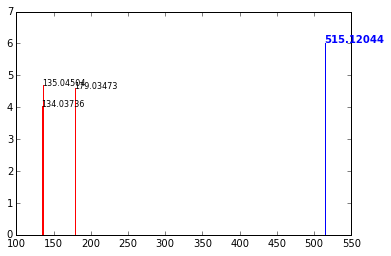

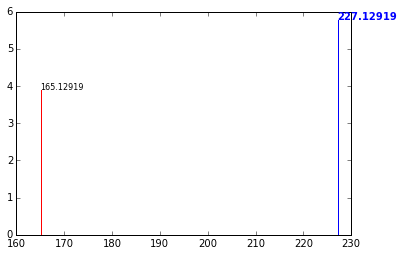

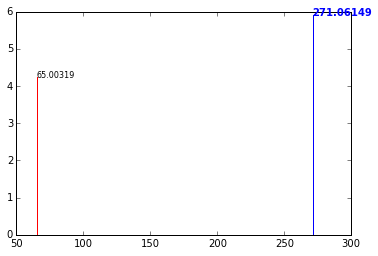

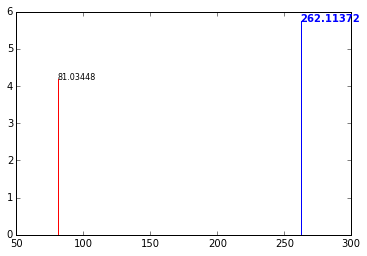

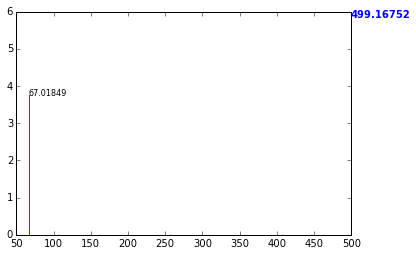

Topic 38

Parent peaks

     peakID	mz		rt		int		prob
1    7221 	275.12517	621.187		1.911e+06	0.967
2    11177	133.05069	325.377		2.158e+06	0.927
3    5559 	147.06635	294.098		2.765e+07	0.926
4    3260 	175.09768	264.268		5.949e+05	0.920
5    4301 	165.05576	335.661		1.533e+06	0.842
6    4300 	165.05578	413.165		6.879e+06	0.713
7    5546 	102.05606	419.048		1.271e+07	0.679
8    6601 	280.10406	558.105		2.040e+06	0.563
9    5561 	147.06635	337.489		1.637e+06	0.467

Fragments

1    fragment_72.9929 (0.510)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12651    3260            72.992996  262.076  12516.780273
 13236    4301            72.992952  333.406  20342.855469
 13862    5559            72.992966  286.997  29040.929688
 13877    5561            72.992996  334.112  50771.089844
 15526   11177            72.992904  322.741  34833.886719
2    fragment_147.04491 (0.057)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13232   4300             147.04483  414.460

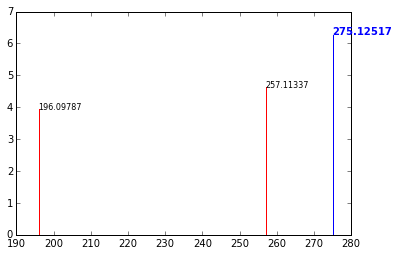

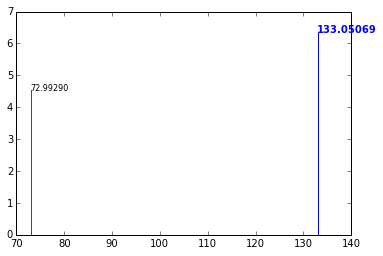

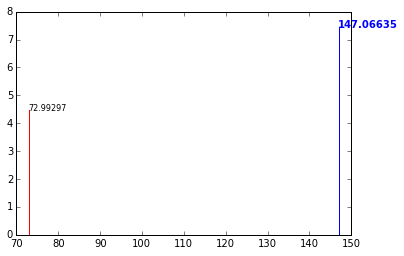

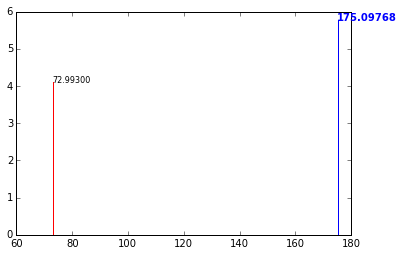

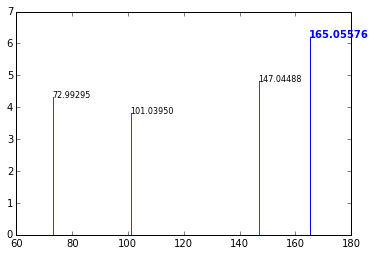

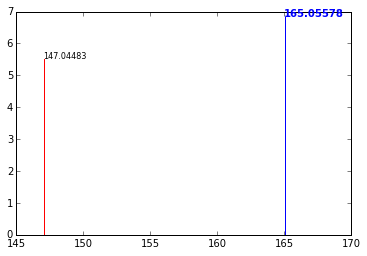

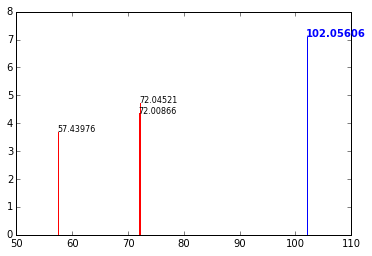

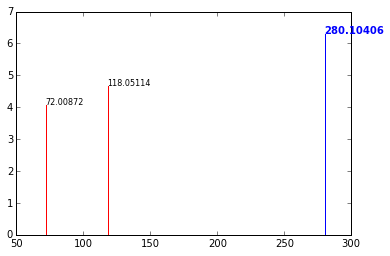

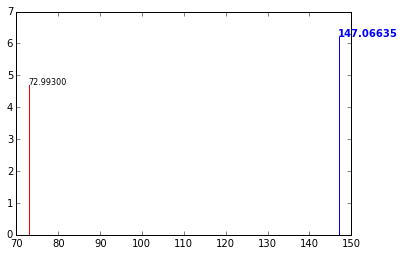

Topic 39

Parent peaks

     peakID	mz		rt		int		prob
1    4535 	447.09405	444.012		1.120e+06	0.982
2    3229 	212.03895	293.483		7.215e+05	0.962
3    5529 	188.05660	436.899		2.590e+06	0.881
4    11377	172.95799	780.879		1.132e+06	0.807
5    11380	172.95799	902.510		7.349e+05	0.712
6    11376	172.95800	927.720		6.925e+05	0.711
7    7526 	174.01257	627.463		1.097e+06	0.542
8    4839 	190.01814	449.212		2.056e+06	0.482
9    6953 	186.04093	599.386		5.622e+05	0.480

Fragments

1    fragment_154.94772 (0.074)
 peakID  MSnParentPeakID  mz          rt       intensity    
 15616   11376            154.947920  925.693  127439.015625
 15619   11377            154.947433  772.497  229280.609375
 15622   11380            154.947935  910.427  111899.343750
2    fragment_76.9698 (0.060)
 peakID  MSnParentPeakID  mz         rt       intensity   
 15617   11376            76.969614  925.693  14405.204102
 15620   11377            76.970210  772.497  29474.919922
 15623   11380            76.969706  

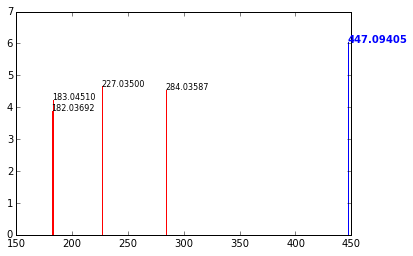

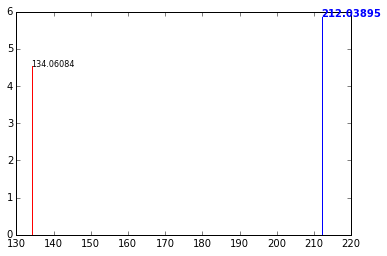

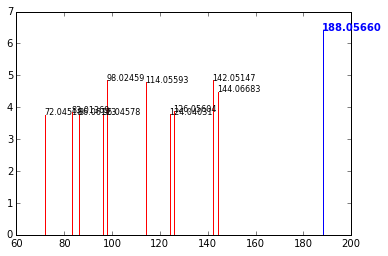

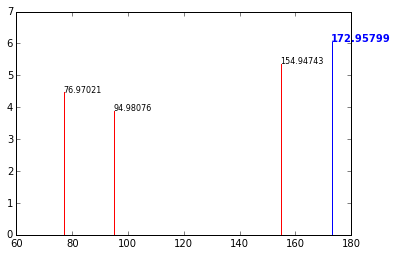

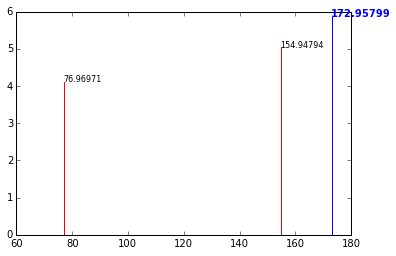

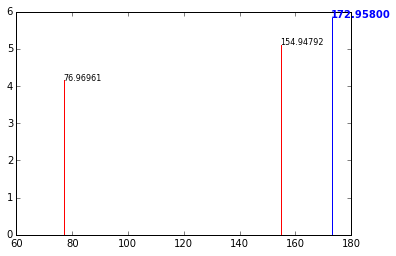

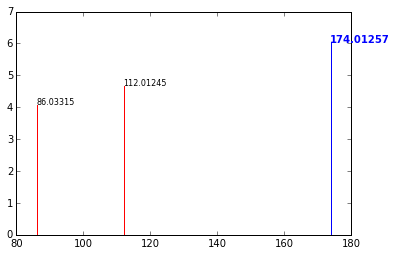

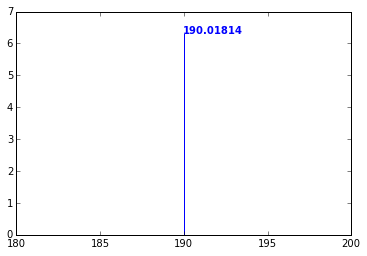

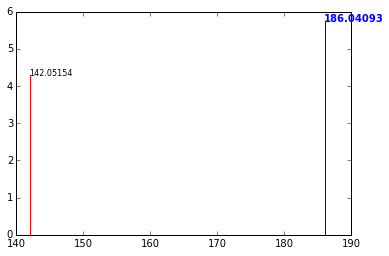

Topic 40

Parent peaks

     peakID	mz		rt		int		prob
1    2108 	262.07576	276.630		4.525e+05	0.648
2    9478 	147.02987	619.982		1.220e+08	0.621
3    4082 	395.15630	311.151		4.991e+06	0.573
4    4083 	395.15640	420.623		4.044e+06	0.556
5    5441 	105.05572	467.971		1.376e+06	0.474
6    4085 	395.15646	357.135		3.843e+05	0.444
7    8337 	980.31828	710.686		1.501e+06	0.415
8    7945 	332.10430	678.762		8.605e+05	0.329
9    6195 	371.12007	554.039		1.797e+06	0.315

Fragments

1    fragment_57.03411 (0.090)
 peakID  MSnParentPeakID  mz         rt       intensity    
 12098   2108             57.034104  275.399   11165.790039
 13075   4082             57.034082  312.773  277328.218750
 13097   4083             57.034227  418.588  152130.156250
 13116   4085             57.034020  359.402   11052.303711
 13700   5441             57.034036  460.442    5814.570312
 15412   9478             57.034167  615.708  911994.500000
2    fragment_85.02956 (0.063)
 peakID  MSnParentPeakID  mz         r

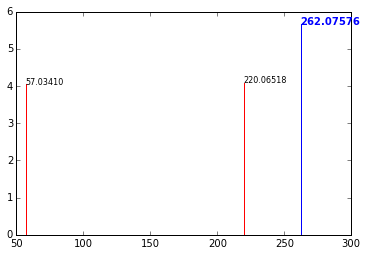

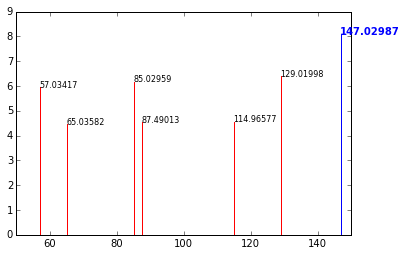

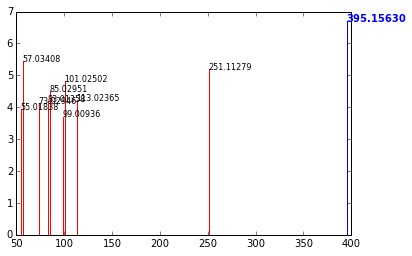

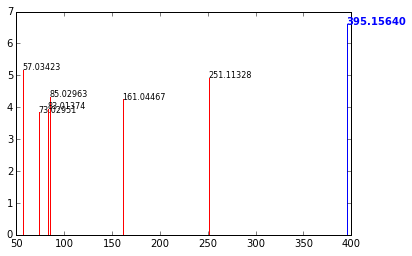

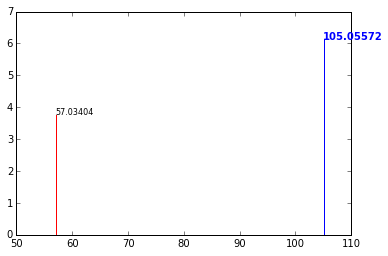

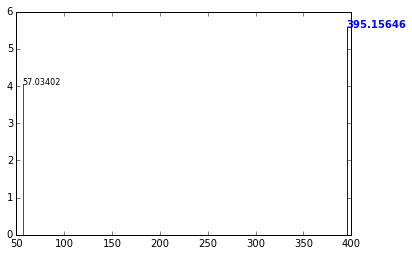

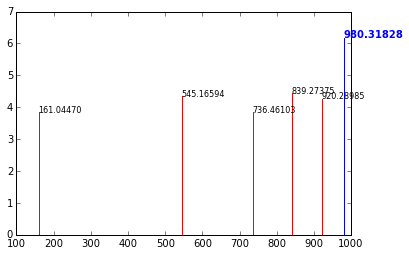

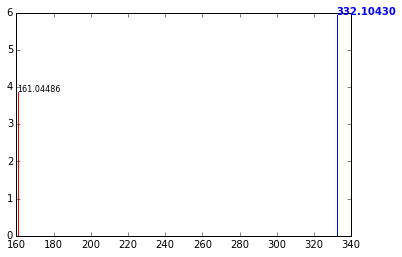

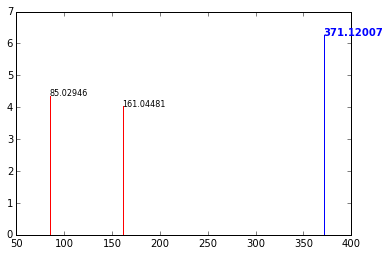

Topic 41

Parent peaks

     peakID	mz		rt		int		prob
1    6681 	172.02421	589.155		8.309e+05	0.960
2    5549 	164.07186	501.050		1.908e+06	0.957
3    8809 	145.09830	923.030		4.600e+05	0.921
4    4807 	326.12511	375.163		6.039e+05	0.800
5    4808 	326.12514	397.429		3.767e+05	0.747
6    4806 	326.12515	358.371		9.400e+05	0.681
7    4585 	236.09313	357.135		2.506e+05	0.636
8    4584 	236.09313	448.326		7.881e+05	0.562
9    4805 	326.12514	447.365		3.897e+06	0.558

Fragments

1    fragment_164.07173 (0.153)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13330   4584             164.071809  433.218   31583.542969
 13337   4585             164.071570  359.127   17486.306641
 13418   4805             164.071717  452.974  412631.093750
 13426   4806             164.071558  359.884  134927.125000
 13437   4807             164.071714  375.572   96100.703125
 13446   4808             164.071870  392.894   43520.445312
2    fragment_147.04491 (0.086)
 peakID  MSnParentPeakID  mz 

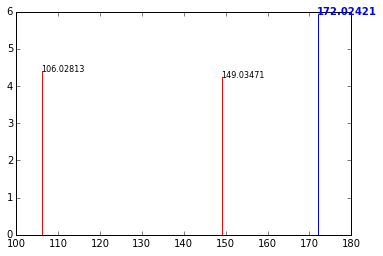

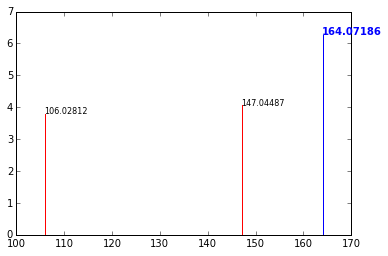

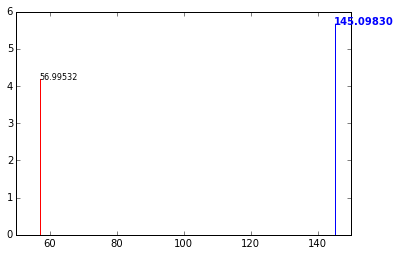

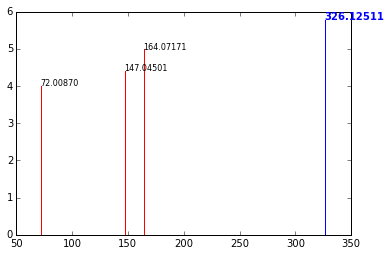

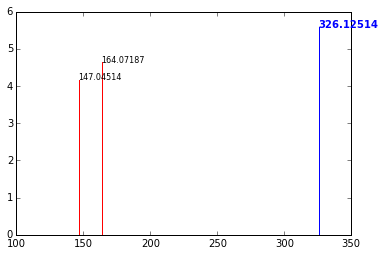

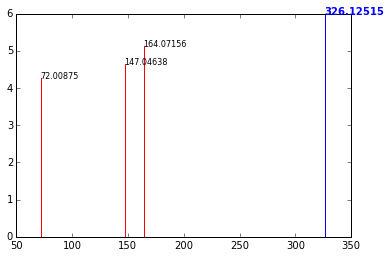

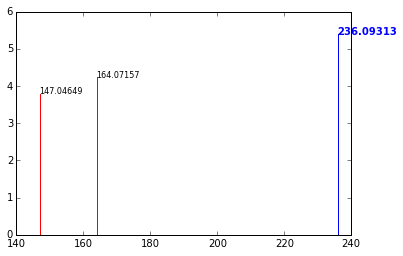

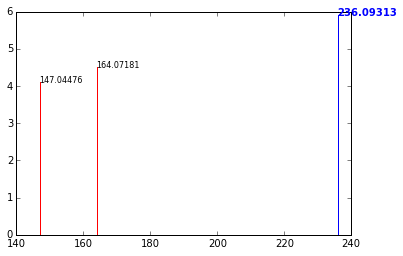

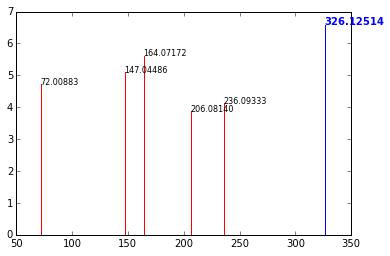

Topic 42

Parent peaks

     peakID	mz		rt		int		prob
1    5893 	390.01414	541.830		1.294e+06	0.987
2    5437 	378.05043	502.994		3.065e+05	0.967
3    6388 	452.14175	568.782		2.869e+06	0.822
4    7617 	426.16256	650.904		4.126e+05	0.789
5    5427 	245.07815	505.055		6.006e+05	0.710
6    5608 	190.96556	516.323		4.531e+05	0.645
7    9253 	194.90600	748.238		1.233e+06	0.593
8    6800 	194.90598	571.674		8.415e+05	0.385
9    1792 	351.18189	221.797		1.982e+06	0.181

Fragments

1    fragment_115.92108 (0.063)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13694   5437             115.920920  504.714  24910.980469
 13923   5608             115.921297  515.426  58187.753906
 14004   5893             115.920876  539.489  52695.039062
2    fragment_116.92903 (0.058)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13695   5437             116.928925  504.714  13708.023438
 14006   5893             116.929091  539.489  18109.255859
 14447   6800             116.928958

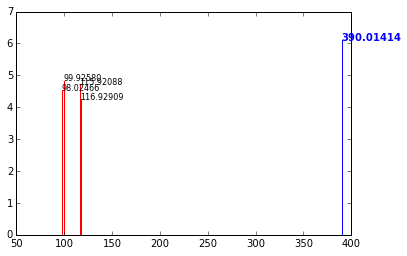

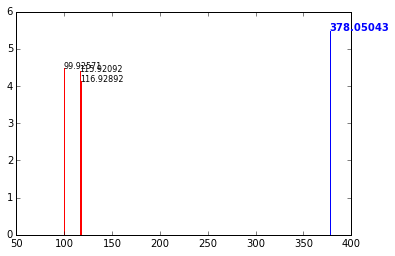

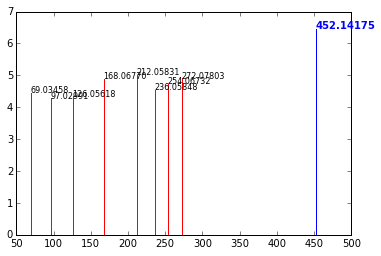

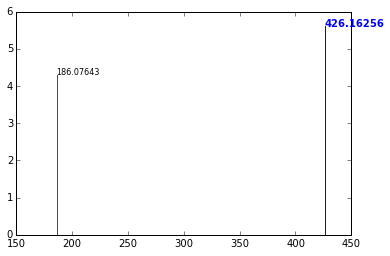

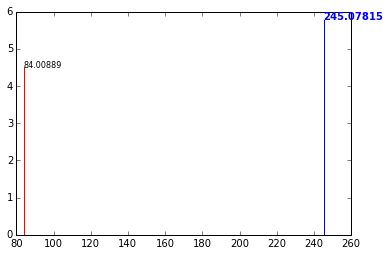

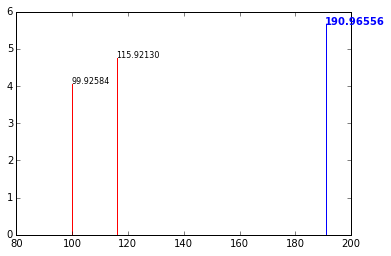

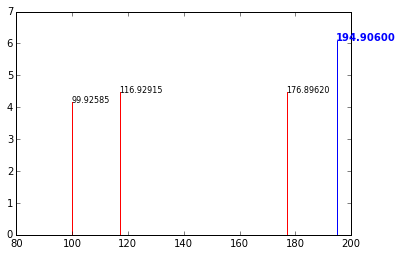

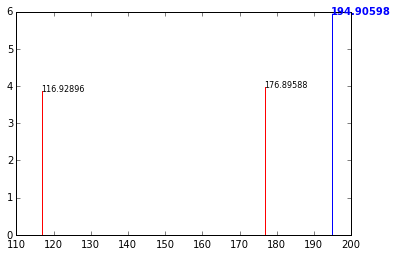

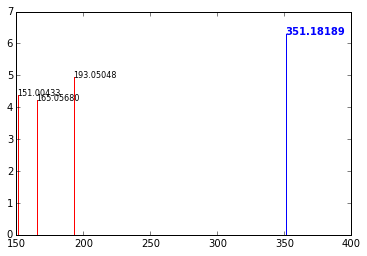

Topic 43

Parent peaks

     peakID	mz		rt		int		prob
1    8418 	341.10942	710.686		3.057e+05	0.918
2    3726 	249.13464	300.531		6.263e+05	0.918
3    8143 	434.13600	690.692		6.824e+05	0.917
4    3683 	323.13535	348.371		3.663e+05	0.917
5    7988 	272.08289	678.762		9.452e+05	0.916
6    11534	207.08757	589.768		4.295e+05	0.912
7    6603 	297.11941	577.148		6.689e+05	0.617
8    6932 	478.16848	600.919		3.738e+05	0.583
9    4895 	323.13519	446.132		6.587e+05	0.582

Fragments

1    fragment_71.01372 (0.744)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12842    3683            71.013633  345.367   9059.209961
 12851    3726            71.013594  300.397   9988.508789
 13494    4895            71.013584  448.119  12322.251953
 14358    6603            71.013634  574.357  11208.699219
 15065    7988            71.013664  684.987   7371.049316
 15179    8143            71.013639  699.187   8340.216797
 15314    8418            71.013638  711.319  10142.625977
 15678   11534   

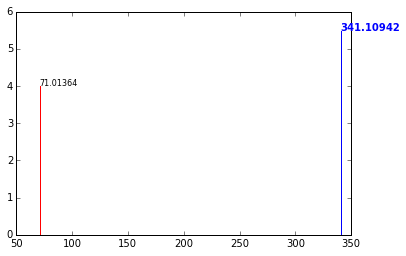

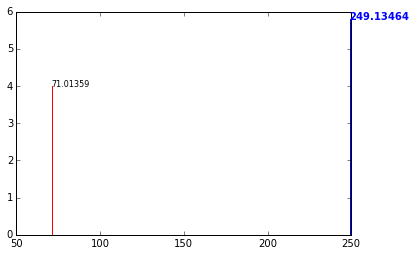

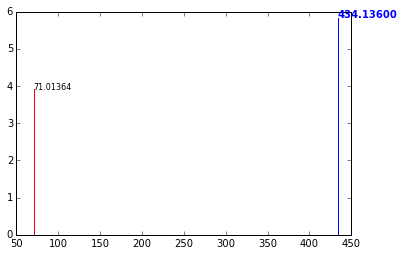

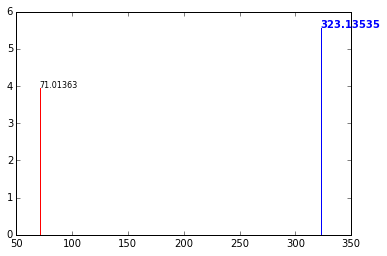

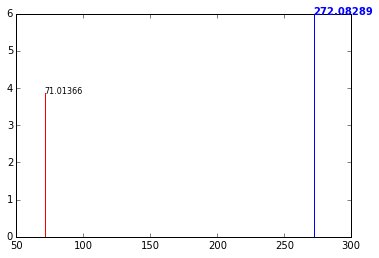

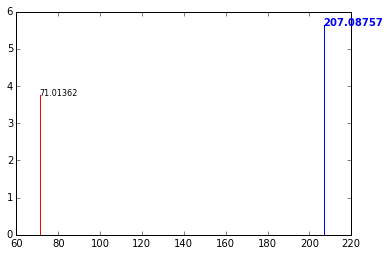

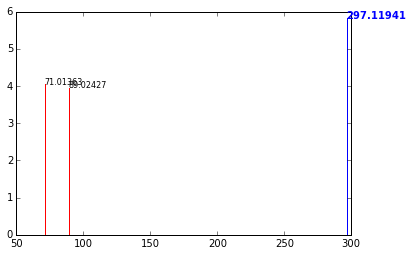

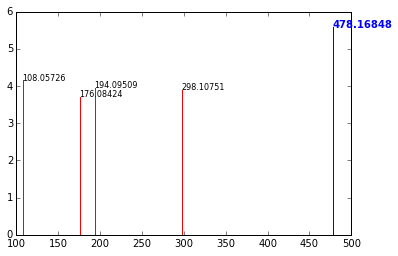

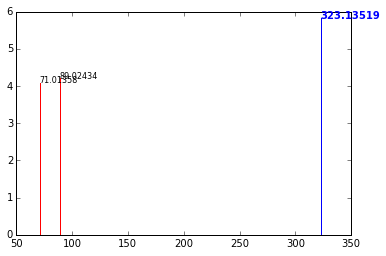

Topic 44

Parent peaks

     peakID	mz		rt		int		prob
1    6267 	157.05069	397.429		6.532e+05	0.961
2    2086 	333.17145	211.569		4.697e+06	0.943
3    737  	311.16926	210.053		1.370e+06	0.936
4    1609 	260.11420	249.497		4.429e+05	0.810
5    722  	339.20039	208.874		7.570e+05	0.728
6    727  	297.15326	210.390		4.782e+05	0.653
7    787  	325.18493	208.874		1.308e+06	0.650
8    9631 	129.01940	532.814		4.052e+06	0.483
9    4002 	137.02440	280.261		3.809e+05	0.483

Fragments

1    fragment_183.0121 (0.058)
 peakID  MSnParentPeakID  mz          rt       intensity    
 11714   722              183.012136  205.596  122228.890625
 11723   727              183.012064  209.840   93264.812500
 11730   737              183.012151  206.295  134850.687500
 11731   787              183.012035  205.201  121374.921875
2    fragment_79.95759 (0.049)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11716   722              79.957704  205.596  22159.341797
 11725   727              79.957534

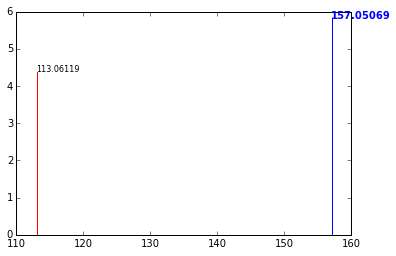

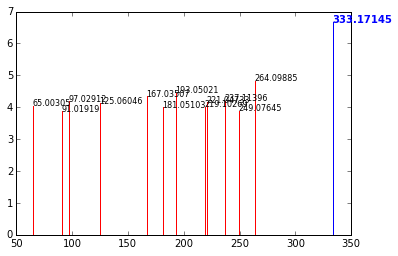

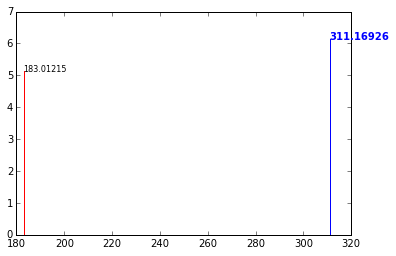

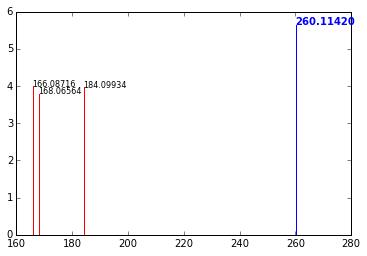

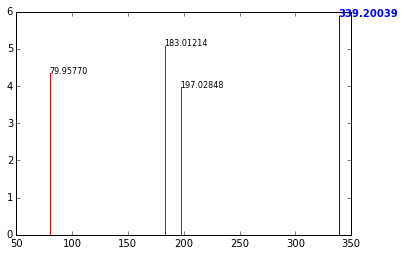

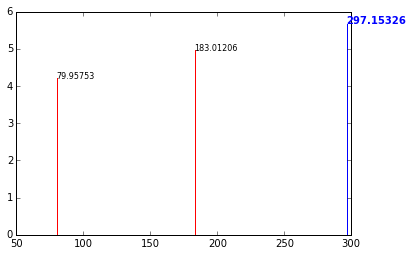

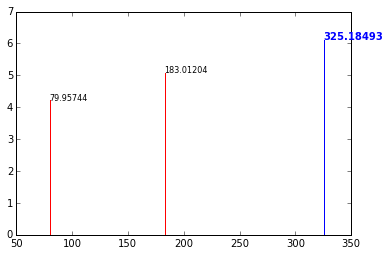

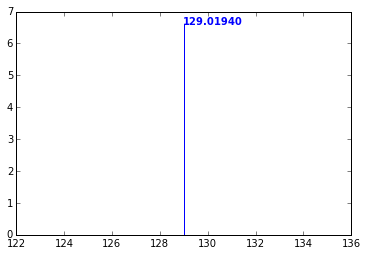

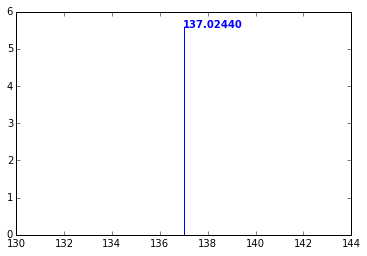

Topic 45

Parent peaks

     peakID	mz		rt		int		prob
1    2046 	242.17653	227.783		1.548e+06	0.930
2    3143 	186.11371	260.193		1.602e+06	0.929
3    654  	433.26008	210.053		3.576e+05	0.921
4    683  	401.23401	205.273		3.341e+05	0.918
5    2984 	298.14126	298.943		1.463e+06	0.838
6    5474 	250.07238	502.994		1.352e+06	0.803
7    3114 	323.07776	293.483		3.366e+05	0.744
8    4997 	585.28881	468.855		3.288e+05	0.728
9    2746 	312.15708	295.703		1.023e+06	0.706

Fragments

1    fragment_88.04079 (0.295)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12047   2046             88.040858  223.981  56610.273438
 12415   2746             88.040800  295.170  96930.429688
 12488   2984             88.040680  297.854  12966.128906
 12622   3143             88.040783  255.690  47347.273438
 13742   5474             88.040795  510.092  27537.632812
2    fragment_130.08697 (0.266)
 peakID  MSnParentPeakID  mz          rt       intensity    
 12417   2746             130.087078  295.

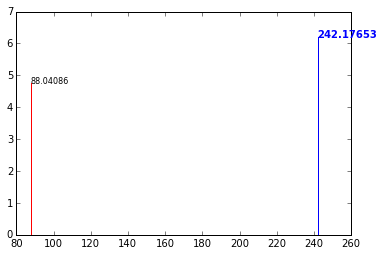

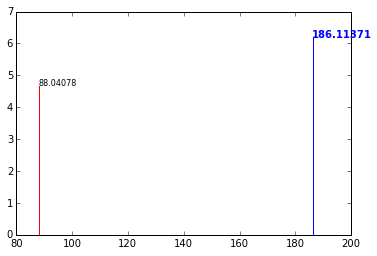

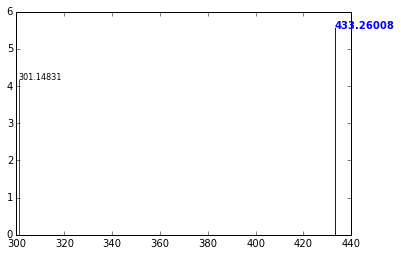

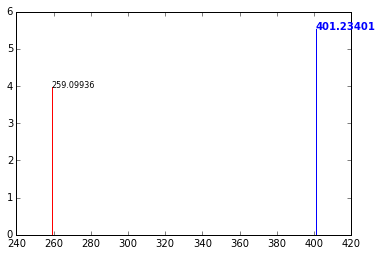

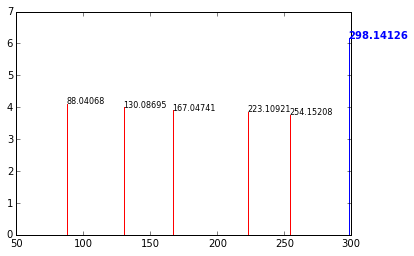

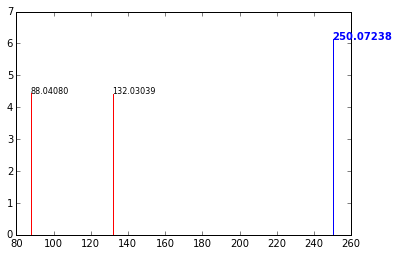

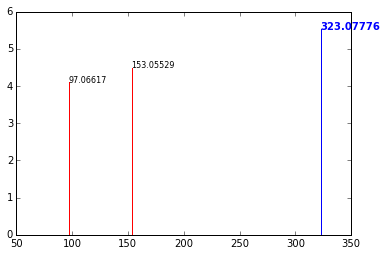

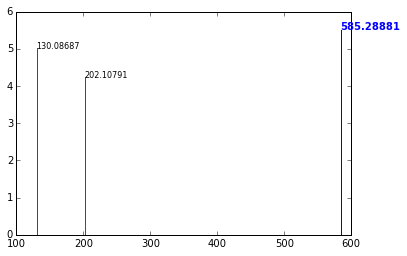

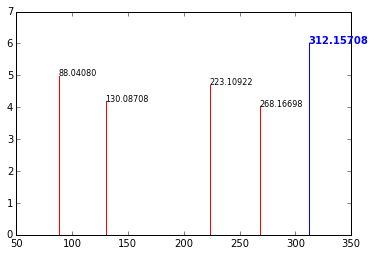

Topic 46

Parent peaks

     peakID	mz		rt		int		prob
1    10912	115.07639	281.658		5.259e+07	0.920
2    4031 	351.13026	419.048		2.932e+06	0.911
3    3442 	351.13026	311.582		1.618e+06	0.829
4    4085 	395.15646	357.135		3.843e+05	0.531
5    8565 	169.01437	751.872		7.776e+05	0.481
6    7972 	187.02496	686.215		7.243e+05	0.480
7    5504 	215.05642	502.281		1.135e+06	0.405
8    2632 	262.11372	294.098		5.473e+05	0.384
9    4083 	395.15640	420.623		4.044e+06	0.312

Fragments

1    fragment_125.02487 (0.154)
 peakID  MSnParentPeakID  mz          rt       intensity   
 12748   3442             125.025096  311.857  13266.864258
 12970   4031             125.024763  417.606  19861.929688
 13100   4083             125.024825  418.588  39182.898438
 15047   7972             125.024569  682.851  15958.686523
 15326   8565             125.024824  746.604  26543.052734
2    fragment_99.04505 (0.132)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12375   2632             99.044888  2

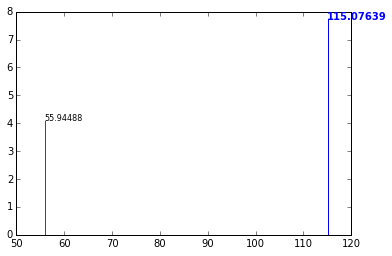

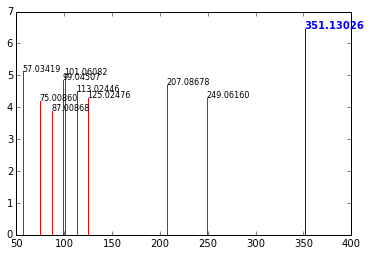

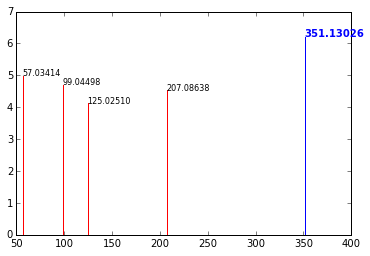

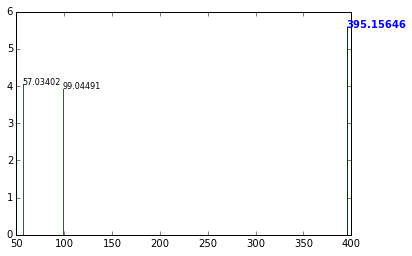

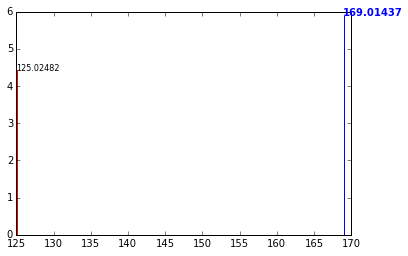

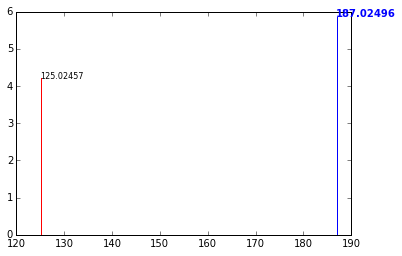

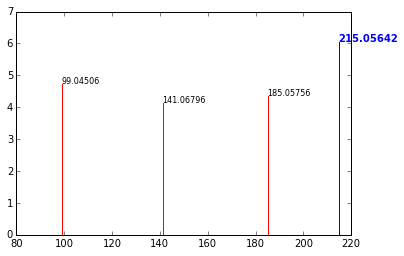

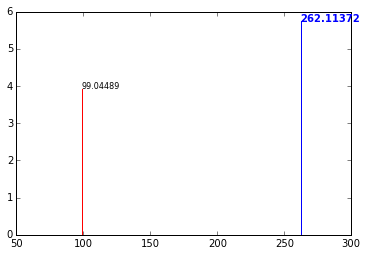

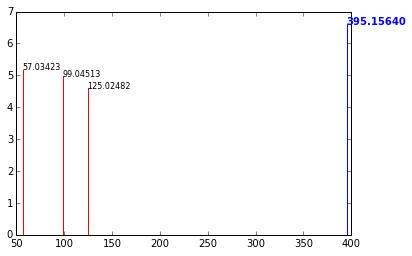

Topic 47

Parent peaks

     peakID	mz		rt		int		prob
1    2686 	393.19267	218.928		1.913e+06	0.714
2    4981 	173.04560	347.410		7.698e+05	0.607
3    6958 	191.05629	529.493		5.728e+05	0.549
4    5560 	147.06636	454.951		3.147e+06	0.505
5    4982 	173.04562	416.287		3.652e+06	0.476
6    11353	161.04564	670.471		9.697e+06	0.425
7    6954 	191.05628	553.420		5.107e+07	0.374
8    11354	161.04564	468.855		6.508e+06	0.365
9    8355 	237.00775	721.441		6.873e+05	0.327

Fragments

1    fragment_85.02956 (0.038)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13871    5560            85.029471  459.002    6960.659180
 14540    6954            85.029548  567.548   36045.679688
 14555    6958            85.029624  528.659    9977.633789
 15584   11353            85.029520  662.183   18256.236328
 15593   11354            85.029601  467.354  111449.023438
2    fragment_83.0503 (0.031)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13529   4981             83.050315  323

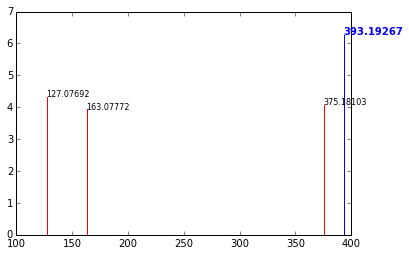

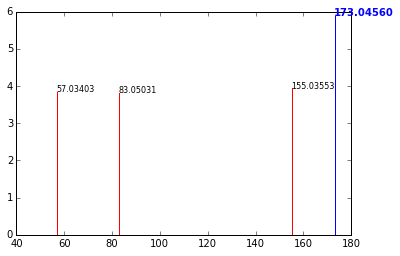

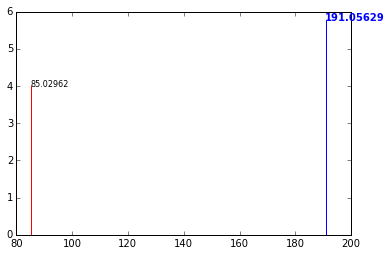

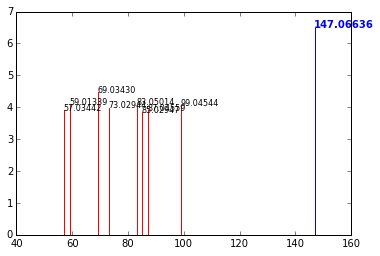

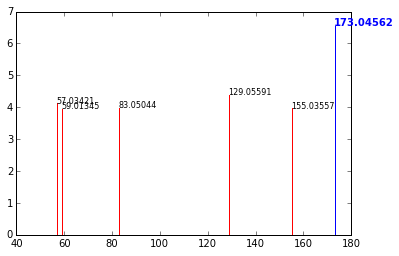

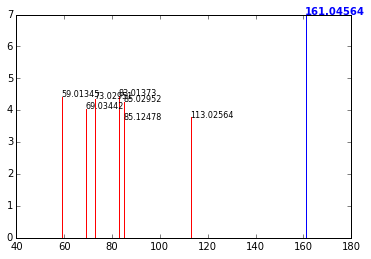

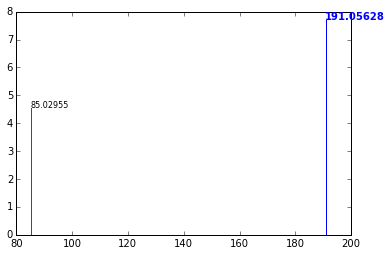

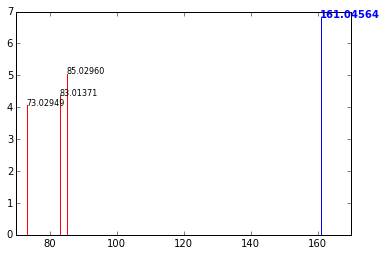

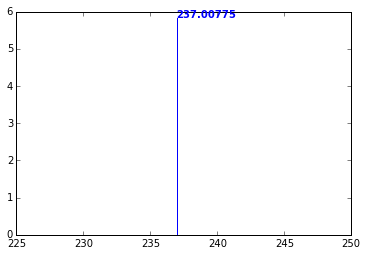

Topic 48

Parent peaks

     peakID	mz		rt		int		prob
1    678  	303.16068	211.569		4.106e+05	0.827
2    8380 	203.01998	707.684		1.238e+06	0.242
3    3782 	259.10900	414.189		7.311e+05	0.228
4    1838 	317.13998	231.522		7.250e+05	0.198
5    5560 	147.06636	454.951		3.147e+06	0.183
6    11353	161.04564	670.471		9.697e+06	0.162
7    2507 	377.19741	211.569		2.920e+07	0.113
8    5509 	251.11392	469.467		2.219e+07	0.110
9    5562 	147.06636	419.048		1.301e+07	0.102

Fragments

1    fragment_95.0142 (0.048)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12006    1838            95.014166  213.525   6709.111328
 12337    2507            95.014208  218.451  11793.707031
 13781    5509            95.014185  465.735   8258.027344
 15587   11353            95.014215  662.183   9473.316406
2    fragment_97.02986 (0.033)
 peakID  MSnParentPeakID  mz         rt       intensity   
 11689     678            97.029829  210.664  16996.042969
 11991    1838            97.029810  213.525  

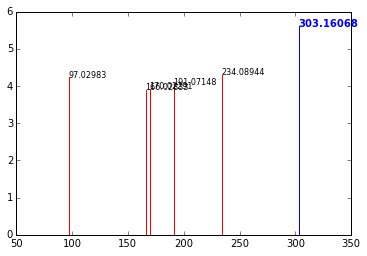

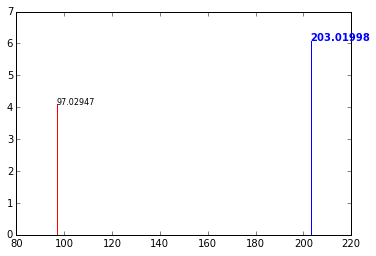

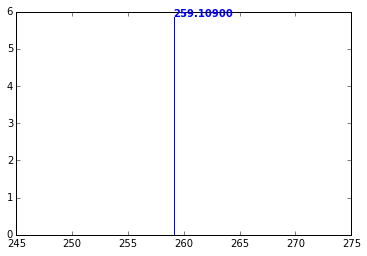

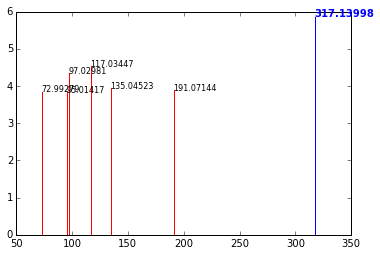

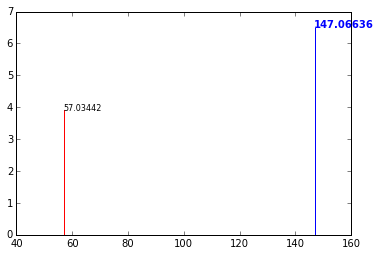

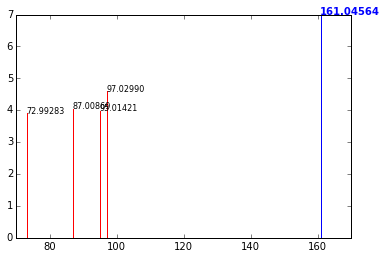

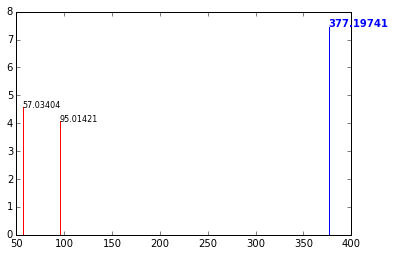

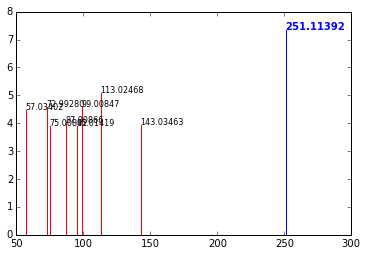

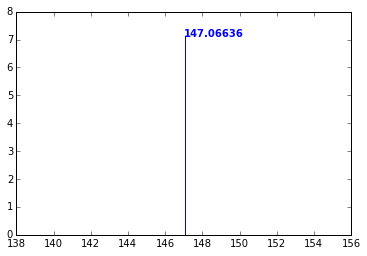

Topic 49

Parent peaks

     peakID	mz		rt		int		prob
1    8944 	179.05626	604.184		2.894e+06	0.946
2    3730 	381.19251	412.547		6.197e+05	0.917
3    8946 	179.05625	642.474		1.929e+06	0.834
4    7895 	193.03549	663.257		2.012e+06	0.567
5    8941 	179.05625	696.204		5.582e+06	0.543
6    8940 	179.05624	558.105		3.078e+07	0.523
7    6972 	267.07244	600.919		5.726e+06	0.512
8    6870 	253.09317	589.155		2.992e+06	0.355
9    7888 	405.10190	662.528		6.904e+05	0.263

Fragments

1    fragment_59.01349 (0.074)
 peakID  MSnParentPeakID  mz         rt       intensity    
 14482   6870             59.013527  588.119   24312.765625
 14966   7895             59.013472  665.222    5795.593262
 15348   8940             59.013599  562.250  175866.671875
 15369   8941             59.013472  670.126   17126.511719
 15389   8944             59.013472  601.605   15455.931641
 15401   8946             59.013521  638.576   12788.464844
2    fragment_89.02435 (0.065)
 peakID  MSnParentPeakID  mz         r

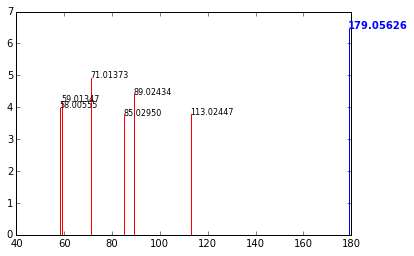

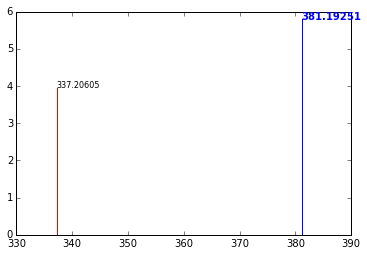

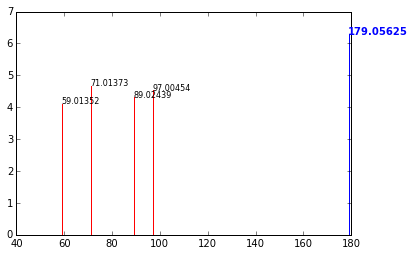

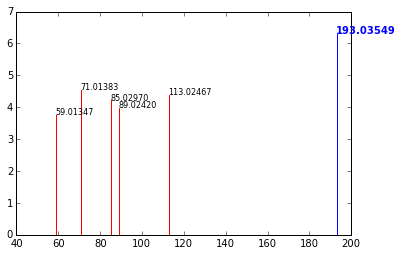

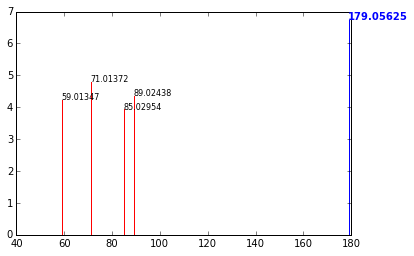

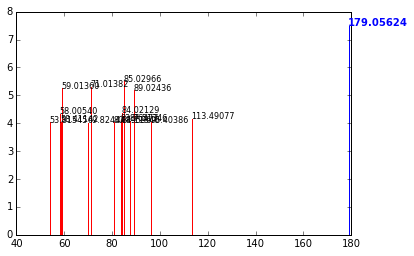

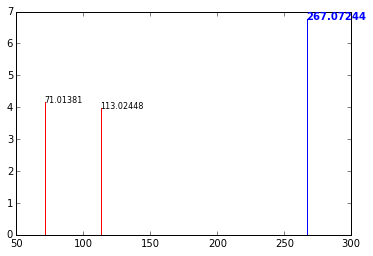

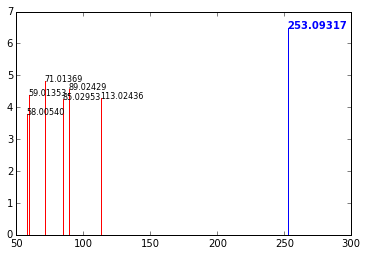

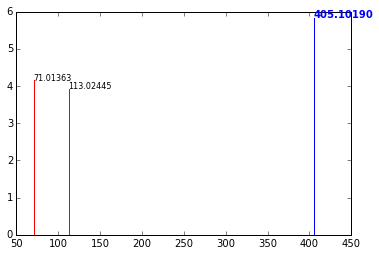

In [12]:
n_docs = 10
n_fragments = 20

topic_fragments = model.topic_word_
headers = list(docdf.columns.values)

ms2['bin_id'] = ms2['bin_id'].astype(str)

for i, topic_dist in enumerate(topic_fragments):
    
    print "Topic " + str(i)
    print "=========="
    print
        
    column_values = np.array(docdf.columns.values)    
    doc_dist = docdf.iloc[[i]].as_matrix().flatten()
    idx = np.argsort(doc_dist)[::-1] # argsort in descending order
    topic_d = np.array(column_values)[idx]
    topic_p = np.array(doc_dist)[idx]
    top_n_docs = topic_d[1:n_docs]
    top_n_docs_p = topic_p[1:n_docs]
        
    print "Parent peaks"
    print
    print '     %s\t%s\t\t%s\t\t%s\t\t%s' % ('peakID', 'mz', 'rt', 'int', 'prob')
    parent_ids = []
    parent_masses = []
    parent_intensities = []
    count = 1
    for t in zip(top_n_docs, top_n_docs_p):

        # split mz_rt_peakid string into tokens
        tokens = t[0].split('_')
        peakid = int(tokens[2])
        ms1_row = ms1.loc[[peakid]]
        mz = ms1_row[['mz']]
        mz = np.asscalar(mz.values)
        rt = ms1_row[['rt']]
        rt = np.asscalar(rt.values)
        intensity = ms1_row[['intensity']]
        intensity = np.asscalar(intensity.values)
        prob = t[1]
        
        print '%-5d%-5d\t%.5f\t%.3f\t\t%.3e\t%.3f' % (count, peakid, mz, rt, intensity, prob)
        parent_ids.append(peakid)
        parent_masses.append(mz)
        parent_intensities.append(intensity)

        count += 1

    column_values = np.array(data.columns.values)
    idx = np.argsort(topic_dist)[::-1] # argsort in descending order
    topic_w = np.array(column_values)[idx]
    topic_p = np.array(topic_dist)[idx]    
    fragments = []
    fragments_p = []
    others = []
    others_p = []
    for w, p in zip(topic_w, topic_p):
        if len(fragments) > n_fragments:
            break
        if w.startswith('fragment'):
            fragments.append(w)
            fragments_p.append(p)
        else:
            others.append(w)
            others_p.append(p)

    print
    print "Fragments"
    print
    parent_fragments = {}
    count = 1
    for t in zip(fragments, fragments_p):
        
        fragment = t[0]
        tokens = fragment.split('_')
        bin_id = tokens[1]
        bin_prob = t[1]
        ms2_rows = ms2.loc[ms2['bin_id']==bin_id]
        ms2_rows = ms2_rows.loc[ms2_rows['MSnParentPeakID'].isin(parent_ids)]

        print '%-5d%s (%.3f)' % (count, t[0], t[1])
        print ms2_rows[['peakID', 'MSnParentPeakID', 'mz', 'rt', 'intensity']].to_string(index=False, justify='left')
        
        count += 1

        peakids = ms2_rows[['peakID']]
        mzs = ms2_rows[['mz']]
        intensities = ms2_rows[['intensity']]
        parentids = ms2_rows[['MSnParentPeakID']]
        
        # convert from pandas dataframes to list
        peakids = peakids.values.ravel().tolist()
        mzs = mzs.values.ravel().tolist()
        intensities = intensities.values.ravel().tolist()
        parentids = parentids.values.ravel().tolist()
        
        for n in range(len(parentids)):
            parentid = parentids[n]
            mz = mzs[n]
            intensity = intensities[n]
            peakid = peakids[n]
            item = (peakid, parentid, mz, intensity)
            if parentid in parent_fragments:
                existing_list = parent_fragments[parentid]
                existing_list.append(item)
            else:
                new_list = [item]
                parent_fragments[parentid] = new_list

    print
    print "Others"
    print "\n".join(' - %-15s\t%.3f' % t for t in zip(others, others_p))
    print

    # plot the n_docs parent peaks in this topic
    parent_fontspec = {
        'size':'10', 
        'color':'blue', 
        'weight':'bold'
    }
    fragment_fontspec = {
        'size':'8', 
        'color':'black', 
        'weight':'normal'
    }
    num_peaks = len(parent_ids)
    for i in range(num_peaks):
        
        plt.figure()
        
        # plot the parent peak
        mass = parent_masses[i]
        intensity = np.log10(parent_intensities[i])
        plt.plot((mass, mass), (0, intensity), 'b')
        x = mass
        y = intensity
        parent_id = parent_ids[i]
        label = "%.5f" % mass
        plt.text(x, y, label, **parent_fontspec)   
        
        # plot the n_fragments fragment peaks in this topic that also occur in the parent peaks above
        if parent_id in parent_fragments:
            fragments_list = parent_fragments[parent_id]
            num_peaks = len(fragments_list)
            for j in range(num_peaks):
                item = fragments_list[j]
                peakid = item[0]
                parentid = item[1]
                mass = item[2]
                intensity = np.log10(item[3])
                plt.plot((mass, mass), (0, intensity), 'r')
                x = mass
                y = intensity
                label = "%.5f" % mass
                plt.text(x, y, label, **fragment_fontspec)        
    
        plt.show()

5. No. of Topics
-------------------

Compute the held-out perplexity on the testing set and plot as the no. of topics is increased ..